In [128]:
import os
os.chdir('/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis')

import pandas as pd
from Utils import saveUtils
from Utils import validationGAN
from Utils import tuUtils
import matplotlib.pyplot as plt

In [129]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### functions

In [ ]:
def plotNum(df_test, df_samples, path):    
    plt.rcParams['font.size'] = '16'

    fig, axs = plt.subplots(1, 3, figsize=(25, 10)) 


    axs[0].hist(df_test['IncRespondent2000'].loc[(df_test['IncRespondent2000'] < 2000) &(df_test['IncRespondent2000'] > -1)], bins=50 ,color='dodgerblue', alpha = 0.4, edgecolor='black', density=True, label='Test set')
    axs[0].hist(df_samples['IncRespondent2000'], bins=50 ,color='darkorange', alpha = 0.4, edgecolor='black', density=True, label='Sampled')
    axs[0].set_title('IncRespondent2000', fontsize=16)
    axs[0].set_xlabel('Income in .000 DKK', fontsize=16)
    axs[0].set_ylabel('', fontsize=12)
    #axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=0, fontsize=12)
    #axs[0,2].set_yticklabels(axs[0,2].get_yticklabels(),  fontsize=12) 
    axs[0].grid(True)
    axs[0].legend()


    axs[1].hist(df_test['IncFamily2000'].loc[(df_test['IncFamily2000'] < 4000) &(df_test['IncFamily2000'] > -1)], bins=50 ,color='dodgerblue', alpha = 0.4, edgecolor='black', density=True, label='Test set')
    axs[1].hist(df_samples['IncFamily2000'], bins=50 ,color='darkorange', alpha = 0.4, edgecolor='black', density=True, label ='Sampled')
    #axs[0,3].hist(df['Gender'].sort_values(), color='dodgerblue', alpha = 0.7, edgecolor='black', rwidth=1)
    axs[1].set_title('IncFamily2000', fontsize=16)
    axs[1].set_xlabel('Income in .000 DKK', fontsize=16)
    #axs[1].set_ylabel('Count', fontsize=12)
    #axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=0, fontsize=12)
    #axs[1,1].set_yticklabels(axs[0,3].get_yticklabels(),  fontsize=12) 
    axs[1].grid(True)
    axs[1].legend()

    axs[2].hist(df_test['RespAgeCorrect'], bins=50 ,color='dodgerblue', alpha = 0.4, edgecolor='black', density=True, label='Test set')
    axs[2].hist(df_samples['RespAgeCorrect'], bins=50 ,color='darkorange', alpha = 0.4, edgecolor='black', density=True,label ='Sampled')
    #axs[2,1].bar(df['Education'].value_counts() ,color='dodgerblue', alpha = 0.6, edgecolor='black')
    axs[2].set_title('RespAgeCorrect', fontsize=16)
    axs[2].set_xlabel('Age', fontsize=16)
    #axs[2].set_ylabel('Count', fontsize=12)
    #axs[2].set_xticklabels(axs[2].get_xticklabels(), rotation=0, fontsize=12)
    #axs[1,1].set_yticklabels(axs[1,1].get_yticklabels(),  fontsize=12) 
    axs[2].grid(True)
    axs[2].legend()

    # Adjust layout to prevent overlapping
    plt.tight_layout()

    # Show the plot
    plt.show()

    fig.savefig(path)

In [ ]:
def plotjoint2(test_df, sampled_df, path):

    #plt.rcParams['font.size'] = '16'

    fig, axs = plt.subplots(2, 2, figsize=(10, 10), dpi=200, facecolor='w', edgecolor='k') 

    categorical = ['RespPrimOcc', 'ResphasDrivlic', 'Sector']
    df, stat = validationGAN.evaluate2(test_df, sampled_df, categorical, test_df)
    Y_test = df['count_real']
    Y_pred = df['count_sampled']

    min_Y = min([min(Y_test),min(Y_pred)])
    max_Y = max([max(Y_test),max(Y_pred)])
    w = max_Y - min_Y
    max_Y += w * 0.05

    N=1


    for var in categorical:
        N *= test_df[var].nunique() 


    text = ['N = ' + str(N),
        'SRMSE = {:.3f}'.format(stat['srmse']),
		        'Corr = {:.3f}'.format(stat['corr']),
		        '$R^2$ = {:.3f}'.format(stat['r2'])]
    text = '\n'.join(text)
    #plt.text(w * 0.08, w * 0.8, text)
    #plt.plot(Y_test, Y_pred, '.', alpha=0.5, ms=10, color='crimson', markeredgewidth=0)
    #plt.plot([min_Y, max_Y], [min_Y, max_Y], ls='--', color='gray', linewidth=1.0)
    #plt.axis([min_Y, max_Y, min_Y, max_Y])

    axs[0,0].plot(Y_test, Y_pred, '.', alpha=0.5, ms=10, color='crimson', markeredgewidth=0)
    axs[0,0].plot([min_Y, max_Y], [min_Y, max_Y], ls='--', color='gray', linewidth=1.0)
    axs[0,0].text(w * 0.08, w * 0.7, text)
    axs[0,0].set_title('RespPrimOcc, ResphasDrivlic and Sector', fontsize=12)
    axs[0,0].set_xlabel('Test', fontsize=14)
    axs[0,0].set_ylabel('Sampled', fontsize=14)
    axs[0,0].axis([min_Y, max_Y, min_Y, max_Y])
    #axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=0, fontsize=12)
    #axs[0,2].set_yticklabels(axs[0,2].get_yticklabels(),  fontsize=12) 

    categorical = ['MunicipalityDest', 'ResphasDrivlic', 'PrimModeDay']
    df, stat = validationGAN.evaluate2(test_df, sampled_df, categorical, test_df)
    Y_test = df['count_real']
    Y_pred = df['count_sampled']

    min_Y = min([min(Y_test),min(Y_pred)])
    max_Y = max([max(Y_test),max(Y_pred)])
    w = max_Y - min_Y
    max_Y += w * 0.05



    N=1


    for var in categorical:
        N *= test_df[var].nunique() 


    text = ['N = ' + str(N),
        'SRMSE = {:.3f}'.format(stat['srmse']),
		        'Corr = {:.3f}'.format(stat['corr']),
		        '$R^2$ = {:.3f}'.format(stat['r2'])]
    text = '\n'.join(text)
    axs[0,1].plot(Y_test, Y_pred, '.', alpha=0.5, ms=10, color='crimson', markeredgewidth=0)
    axs[0,1].plot([min_Y, max_Y], [min_Y, max_Y], ls='--', color='gray', linewidth=1.0)
    axs[0,1].text(w * 0.08, w * 0.7, text)
    axs[0,1].set_title('MunicipalityDest, ResphasDrivlic and PrimModeDay',fontsize=12)
    axs[0,1].set_xlabel('Test', fontsize=14)
    axs[0,1].set_ylabel('Sampled', fontsize=14)
    axs[0,1].axis([min_Y, max_Y, min_Y, max_Y])


    categorical = ['PosInFamily','RespPrimOcc', 'Sector']
    df, stat = validationGAN.evaluate2(test_df, sampled_df, categorical, test_df)
    Y_test = df['count_real']
    Y_pred = df['count_sampled']

    min_Y = min([min(Y_test),min(Y_pred)])
    max_Y = max([max(Y_test),max(Y_pred)])
    w = max_Y - min_Y
    max_Y += w * 0.05



    N=1


    for var in categorical:
        N *= test_df[var].nunique() 


    text = ['N = ' + str(N),
        'SRMSE = {:.3f}'.format(stat['srmse']),
		        'Corr = {:.3f}'.format(stat['corr']),
		        '$R^2$ = {:.3f}'.format(stat['r2'])]
    text = '\n'.join(text)

    axs[1,0].plot(Y_test, Y_pred, '.', alpha=0.5, ms=10, color='crimson', markeredgewidth=0)
    axs[1,0].plot([min_Y, max_Y], [min_Y, max_Y], ls='--', color='gray', linewidth=1.0)
    axs[1,0].text(w * 0.08, w * 0.7, text)
    axs[1,0].set_title('PosInFamily, RespPrimOcc and Sector', fontsize=12)
    axs[1,0].set_xlabel('Test', fontsize=14)
    axs[1,0].set_ylabel('Sampled', fontsize=14)
    axs[1,0].axis([min_Y, max_Y, min_Y, max_Y])

    categorical = ['RespPrimOcc', 'Sector', 'Education']
    df, stat = validationGAN.evaluate2(test_df, sampled_df, categorical, test_df)
    Y_test = df['count_real']
    Y_pred = df['count_sampled']

    min_Y = min([min(Y_test),min(Y_pred)])
    max_Y = max([max(Y_test),max(Y_pred)])
    w = max_Y - min_Y
    max_Y += w * 0.05

    N=1


    for var in categorical:
        N *= test_df[var].nunique() 


    text = ['N = ' + str(N),
        'SRMSE = {:.3f}'.format(stat['srmse']),
		        'Corr = {:.3f}'.format(stat['corr']),
		        '$R^2$ = {:.3f}'.format(stat['r2'])]
    text = '\n'.join(text)

    axs[1,1].plot(Y_test, Y_pred, '.', alpha=0.5, ms=10, color='crimson', markeredgewidth=0)
    axs[1,1].plot([min_Y, max_Y], [min_Y, max_Y], ls='--', color='gray', linewidth=1.0)
    axs[1,1].text(w * 0.08, w * 0.7, text)
    axs[1,1].set_title('RespPrimOcc, Sector and Education', fontsize=12)
    axs[1,1].set_xlabel('Test', fontsize=14)
    axs[1,1].set_ylabel('Sampled', fontsize=14)
    axs[1,1].axis([min_Y, max_Y, min_Y, max_Y])



    # Adjust layout to prevent overlapping
    plt.tight_layout()

    # Show the plot
    plt.show()

    fig.savefig(path)

In [ ]:
def plotjoint(test_df, sampled_df, path):

    plt.rcParams['font.size'] = '16'

    fig, axs = plt.subplots(2, 2, figsize=(10, 10), dpi=200, facecolor='w', edgecolor='k') 

    categorical = ['MunicipalityOrigin', 'ResphasDrivlic', 'PopSocio']
    df, stat = validationGAN.evaluate2(test_df, sampled_df, categorical, test_df)
    Y_test = df['count_real']
    Y_pred = df['count_sampled']

    min_Y = min([min(Y_test),min(Y_pred)])
    max_Y = max([max(Y_test),max(Y_pred)])
    w = max_Y - min_Y
    max_Y += w * 0.05

    N=1


    for var in categorical:
        N *= test_df[var].nunique() 


    text = ['N = ' + str(N),
        'SRMSE = {:.3f}'.format(stat['srmse']),
		        'Corr = {:.3f}'.format(stat['corr']),
		        '$R^2$ = {:.3f}'.format(stat['r2'])]
    text = '\n'.join(text)
    #plt.text(w * 0.08, w * 0.8, text)
    #plt.plot(Y_test, Y_pred, '.', alpha=0.5, ms=10, color='crimson', markeredgewidth=0)
    #plt.plot([min_Y, max_Y], [min_Y, max_Y], ls='--', color='gray', linewidth=1.0)
    #plt.axis([min_Y, max_Y, min_Y, max_Y])

    axs[0,0].plot(Y_test, Y_pred, '.', alpha=0.5, ms=10, color='crimson', markeredgewidth=0)
    axs[0,0].plot([min_Y, max_Y], [min_Y, max_Y], ls='--', color='gray', linewidth=1.0)
    axs[0,0].text(w * 0.08, w * 0.7, text)
    axs[0,0].set_title('MunicipalityOrigin, ResphasDrivlic and PopSocio', fontsize=10)
    axs[0,0].set_xlabel('Test', fontsize=14)
    axs[0,0].set_ylabel('Sampled', fontsize=14)
    axs[0,0].axis([min_Y, max_Y, min_Y, max_Y])
    #axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=0, fontsize=12)
    #axs[0,2].set_yticklabels(axs[0,2].get_yticklabels(),  fontsize=12) 

    categorical = ['MunicipalityOrigin', 'ResphasDrivlic', 'PopSocio', 'Gender']
    df, stat = validationGAN.evaluate2(test_df, sampled_df, categorical, test_df)
    Y_test = df['count_real']
    Y_pred = df['count_sampled']

    min_Y = min([min(Y_test),min(Y_pred)])
    max_Y = max([max(Y_test),max(Y_pred)])
    w = max_Y - min_Y
    max_Y += w * 0.05



    N=1


    for var in categorical:
        N *= test_df[var].nunique() 


    text = ['N = ' + str(N),
        'SRMSE = {:.3f}'.format(stat['srmse']),
		        'Corr = {:.3f}'.format(stat['corr']),
		        '$R^2$ = {:.3f}'.format(stat['r2'])]
    text = '\n'.join(text)
    axs[0,1].plot(Y_test, Y_pred, '.', alpha=0.5, ms=10, color='crimson', markeredgewidth=0)
    axs[0,1].plot([min_Y, max_Y], [min_Y, max_Y], ls='--', color='gray', linewidth=1.0)
    axs[0,1].text(w * 0.08, w * 0.7, text)
    axs[0,1].set_title('MunicipalityOrigin, ResphasDrivlic, PopSocio and Gender',fontsize=10)
    axs[0,1].set_xlabel('Test', fontsize=14)
    axs[0,1].set_ylabel('Sampled', fontsize=14)
    axs[0,1].axis([min_Y, max_Y, min_Y, max_Y])


    categorical = ['Gender','RespPrimOcc', 'WorkHoursPw']
    df, stat = validationGAN.evaluate2(test_df, sampled_df, categorical, test_df)
    Y_test = df['count_real']
    Y_pred = df['count_sampled']

    min_Y = min([min(Y_test),min(Y_pred)])
    max_Y = max([max(Y_test),max(Y_pred)])
    w = max_Y - min_Y
    max_Y += w * 0.05



    N=1


    for var in categorical:
        N *= test_df[var].nunique() 


    text = ['N = ' + str(N),
        'SRMSE = {:.3f}'.format(stat['srmse']),
		        'Corr = {:.3f}'.format(stat['corr']),
		        '$R^2$ = {:.3f}'.format(stat['r2'])]
    text = '\n'.join(text)

    axs[1,0].plot(Y_test, Y_pred, '.', alpha=0.5, ms=10, color='crimson', markeredgewidth=0)
    axs[1,0].plot([min_Y, max_Y], [min_Y, max_Y], ls='--', color='gray', linewidth=1.0)
    axs[1,0].text(w * 0.08, w * 0.7, text)
    axs[1,0].set_title('Gender, RespPrimOcc and Sector', fontsize=10)
    axs[1,0].set_xlabel('Test', fontsize=14)
    axs[1,0].set_ylabel('Sampled', fontsize=14)
    axs[1,0].axis([min_Y, max_Y, min_Y, max_Y])

    categorical = ['RespAgeCorrect', 'Gender', 'RespHasBicycle']
    df, stat = validationGAN.evaluate2(test_df, sampled_df, categorical, test_df)
    Y_test = df['count_real']
    Y_pred = df['count_sampled']

    min_Y = min([min(Y_test),min(Y_pred)])
    max_Y = max([max(Y_test),max(Y_pred)])
    w = max_Y - min_Y
    max_Y += w * 0.05

    N=1


    for var in categorical:
        N *= test_df[var].nunique() 


    text = ['N = ' + str(N),
        'SRMSE = {:.3f}'.format(stat['srmse']),
		        'Corr = {:.3f}'.format(stat['corr']),
		        '$R^2$ = {:.3f}'.format(stat['r2'])]
    text = '\n'.join(text)

    axs[1,1].plot(Y_test, Y_pred, '.', alpha=0.5, ms=10, color='crimson', markeredgewidth=0)
    axs[1,1].plot([min_Y, max_Y], [min_Y, max_Y], ls='--', color='gray', linewidth=1.0)
    axs[1,1].text(w * 0.08, w * 0.7, text)
    axs[1,1].set_title('RespAgeCorrect, Gender and RespHasBicycle', fontsize=10)
    axs[1,1].set_xlabel('Test', fontsize=14)
    axs[1,1].set_ylabel('Sampled', fontsize=14)
    axs[1,1].axis([min_Y, max_Y, min_Y, max_Y])



    # Adjust layout to prevent overlapping
    plt.tight_layout()

    # Show the plot
    plt.show()

    fig.savefig(path)


In [130]:
df_dtypes = {
    'CarModelYear': 'category',
    'Education': 'category',
    'FamNumAdults': 'float64',
    'FamNumPers': 'float64',
    'FuelType': 'category',
    'Gender': 'category',
    'Handicap': 'category',
    'HomeAdrZone': 'category',
    'HousehCarOwnership': 'category',
    'HousehNumAdults': 'float64',
    'HousehNumPers': 'float64',
    'HousehNumcars': 'float64',
    'HwDayspW': 'category',
    'IncFamily2000': 'float64',
    'IncRespondent2000': 'float64',
    'KidsBetween0and4': 'float64',
    'KidsBetween4and15': 'float64',
    'MunicipalityDest': 'category',
    'MunicipalityOrigin': 'category',
    'PopSocio': 'category',
    'PrimOccZone': 'category',
    'RespAgeCorrect': 'float64',
    'RespHasBicycle': 'category',
    'RespHasRejsekort': 'category',
    'RespIsmemCarshare': 'category',
    'RespPrimOcc': 'category',
    'ResphasDrivlic': 'category',
    'Sector': 'category',
    'WorkHourType': 'category',
    'WorkHoursPw': 'float64',
    'Year': 'category',
    'HomeParkPoss': 'category',
    'HousehAccomodation': 'category',
    'HousehAccOwnorRent': 'category',
    'PosInFamily': 'category',
    'PrimModeDay': 'category',
    'ModeChainTypeDay': 'category',
    'RespHasSeasonticket': 'category'
}

os.chdir('/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Data')

train = pd.read_csv('train_newCat.csv', sep=',', dtype=df_dtypes)
test = pd.read_csv('test_newCat.csv', sep=',', dtype=df_dtypes)
train.drop(train.columns[train.columns.str.contains('unnamed', case=False)], axis=1, inplace=True)
test.drop(test.columns[test.columns.str.contains('unnamed', case=False)], axis=1, inplace=True)

#numerical = ['FamNumAdults', 'FamNumPers', 'HousehNumAdults', 'HousehNumcars', 
 #       'HousehNumPers', 'RespAgeCorrect', 'IncFamily2000', 'IncRespondent2000']

### WGAN

In [132]:
numerical = ['FamNumAdults', 'FamNumPers', 'HousehNumAdults', 'HousehNumcars', 
        'HousehNumPers', 'RespAgeCorrect', 'IncFamily2000', 'IncRespondent2000']

#numerical = ['RespAgeCorrect', 'IncFamily2000', 'IncRespondent2000']
WGAN_samples_v1_newCat_allnum = pd.read_csv('WGAN/V1/WGAN_samples_v1_newCat.csv', sep=',', dtype=df_dtypes)
WGAN_samples_v1_newCat_allnum.drop(WGAN_samples_v1_newCat_allnum.columns[WGAN_samples_v1_newCat_allnum.columns.str.contains('unnamed', case=False)], axis=1, inplace=True)
len(WGAN_samples_v1_newCat_allnum)

41724

In [133]:
stats = validationGAN.validateModel(test, WGAN_samples_v1_newCat_allnum, numerical)

HousehCarOwnership
IncFamily2000
FamNumAdults
FamNumPers


/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:157: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['count'] = 1
/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_df['count'] = 1
/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:157: SettingWithCopyWarning: 
A value is tr

HousehNumAdults
HousehNumPers
IncRespondent2000
WorkHoursPw


/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_df['count'] = 1
/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:157: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['count'] = 1
/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:161: SettingWithCopyWarning: 
A value is tr

HousehNumcars
Year
Gender
RespAgeCorrect
Education
Handicap


/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_df['count'] = 1
/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:157: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['count'] = 1
/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:161: SettingWithCopyWarning: 
A value is tr

PopSocio
RespPrimOcc
KidsBetween0and15
KidsBetween0and4
CarModelYear
MunicipalityOrigin


/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:157: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['count'] = 1
/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_df['count'] = 1
/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:157: SettingWithCopyWarning: 
A value is tr

MunicipalityDest
HomeAdrZone
PrimOccZone
WorkHourType
RespHasBicycle


/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:157: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['count'] = 1
/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_df['count'] = 1
/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:157: SettingWithCopyWarning: 
A value is tr

ResphasDrivlic
RespHasRejsekort
RespIsmemCarshare
Sector
HwDayspW
FuelType


/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:157: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['count'] = 1
/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_df['count'] = 1
/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:157: SettingWithCopyWarning: 
A value is tr

HomeParkPoss
RespHasSeasonticket
HousehAccomodation
HousehAccOwnorRent
PosInFamily
PrimModeDay
ModeChainTypeDay


/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_df['count'] = 1
/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:157: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['count'] = 1
/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:161: SettingWithCopyWarning: 
A value is tr

In [136]:
print(stats.loc[~stats.index.isin(['IncRespondent2000','IncFamily2000'])].to_latex())

\begin{tabular}{lrrrrr}
\toprule
 & mae & rmse & r2 & srmse & corr \\
col &  &  &  &  &  \\
\midrule
HousehCarOwnership & 0.001814 & 0.003017 & 0.999621 & 0.039219 & 0.999890 \\
FamNumAdults & 0.040336 & 0.048628 & 0.952635 & 0.194514 & 0.976186 \\
FamNumPers & 0.048973 & 0.061385 & 0.657473 & 0.368308 & 0.825720 \\
HousehNumAdults & 0.033206 & 0.034963 & 0.975961 & 0.139852 & 0.991342 \\
HousehNumPers & 0.044571 & 0.059758 & 0.677128 & 0.358547 & 0.858893 \\
WorkHoursPw & 0.001532 & 0.013903 & 0.551816 & 11.456001 & 0.763855 \\
HousehNumcars & 0.054942 & 0.060763 & 0.892449 & 0.303815 & 0.945750 \\
Year & 0.005951 & 0.007281 & 0.936832 & 0.094652 & 0.988074 \\
Gender & 0.016489 & 0.016489 & -0.900972 & 0.032979 & -1.000000 \\
RespAgeCorrect & 0.021585 & 0.025259 & -2.920427 & 0.479912 & -0.771583 \\
Education & 0.010551 & 0.014010 & 0.985118 & 0.112077 & 0.997535 \\
Handicap & 0.003883 & 0.003883 & 0.999919 & 0.007765 & 1.000000 \\
PopSocio & 0.019030 & 0.022848 & 0.977780 & 0.091393 

In [ ]:
stats.loc[~stats.index.isin(['HomeAdrZone', 'PrimOccZone','IncRespondent2000','IncFamily2000', 'RespAgeCorrect'])].mean()

mae      0.014217
rmse     0.017949
r2       0.871745
srmse    0.515794
corr     0.909522
dtype: float64

In [ ]:
stats

mae      rmse         r2      srmse      corr
col                                                                    
HousehCarOwnership   0.001814  0.003017   0.999621   0.039219  0.999890
IncFamily2000        0.012970  0.015723  -2.938893   0.298744 -0.987441
FamNumAdults         0.040336  0.048628   0.952635   0.194514  0.976186
FamNumPers           0.048973  0.061385   0.657473   0.368308  0.825720
HousehNumAdults      0.033206  0.034963   0.975961   0.139852  0.991342
HousehNumPers        0.044571  0.059758   0.677128   0.358547  0.858893
IncRespondent2000    0.018952  0.026296  -0.341944   0.499625 -0.142466
WorkHoursPw          0.001532  0.013903   0.551816  11.456001  0.763855
HousehNumcars        0.054942  0.060763   0.892449   0.303815  0.945750
Year                 0.005951  0.007281   0.936832   0.094652  0.988074
Gender               0.016489  0.016489  -0.900972   0.032979 -1.000000
RespAgeCorrect       0.021585  0.025259  -2.920427   0.479912 -0.771583
Education            0.010551  0.014010   0.985118   0.112077  0.997535
Handicap             0.003883  0.003883   0.999919   0.007765  1.000000
PopSocio             0.019030  0.022848   0.977780   0.091393  0.990153
RespPrimOcc          0.008326  0.014079   0.980907   0.239351  0.990598
KidsBetween0and15    0.007028  0.011200   0.997377   0.089597  0.999662
KidsBetween0and4     0.008976  0.011461   0.999109   0.045846  0.999900
CarModelYear         0.003749  0.007020   0.904328   0.519448  0.976491
MunicipalityOrigin   0.003754  0.005671   0.712066   0.555726  0.908485
MunicipalityDest     0.002599  0.007566   0.941361   0.749017  0.996837
HomeAdrZone          0.000261  0.001443 -95.258059   9.125475  0.284171
PrimOccZone          0.000227  0.003055   0.534736  14.634294  0.995948
WorkHourType         0.017065  0.024417   0.980875   0.146499  0.997586
RespHasBicycle       0.020180  0.020180   0.988591   0.040360  1.000000
ResphasDrivlic       0.009647  0.009820   0.998782   0.039279  0.999686
RespHasRejsekort     0.009112  0.011442   0.979953   0.114418  0.996285
RespIsmemCarshare    0.001126  0.001126   0.999992   0.002253  1.000000
Sector               0.005255  0.011423   0.966994   0.422641  0.999254
HwDayspW             0.010156  0.015451   0.993217   0.123605  0.997114
FuelType             0.001904  0.002553   0.999832   0.017869  0.999921
HomeParkPoss         0.007061  0.010693   0.967707   0.203163  0.998335
RespHasSeasonticket  0.014404  0.014404   0.998335   0.028808  1.000000
HousehAccomodation   0.012047  0.013368   0.993039   0.080211  0.999309
HousehAccOwnorRent   0.018087  0.019186   0.993036   0.057557  0.996581
PosInFamily          0.016993  0.019924   0.674435   0.079694  0.821435
PrimModeDay          0.004490  0.007210   0.996075   0.173043  0.999798
ModeChainTypeDay     0.005911  0.007208   0.995813   0.093704  0.999547

Aggregated variables: 
MunicipalityOrigin
ResphasDrivlic
PopSocio
Number of combinations: 1584
corr = 0.844890
MAE = 0.000537
RMSE = 0.001222
SRMSE = 1.396067
r2 = 0.589747


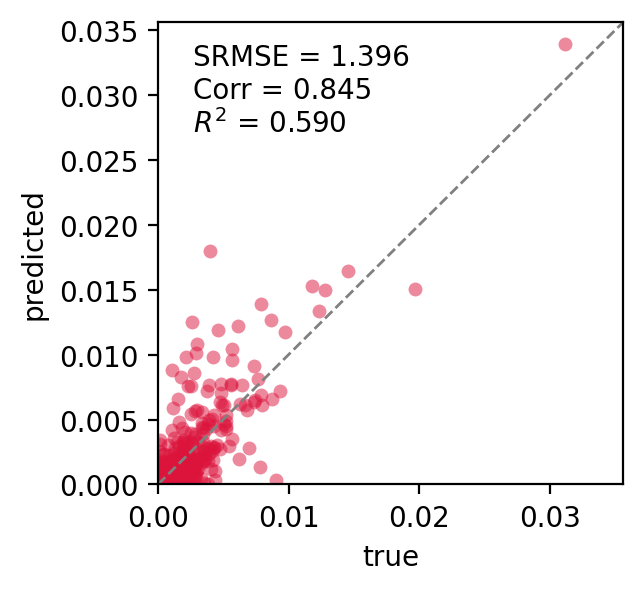

Aggregated variables: 
MunicipalityOrigin
ResphasDrivlic
PopSocio
Gender
Number of combinations: 3168
corr = 0.820501
MAE = 0.000316
RMSE = 0.000697
SRMSE = 1.446934
r2 = 0.510419


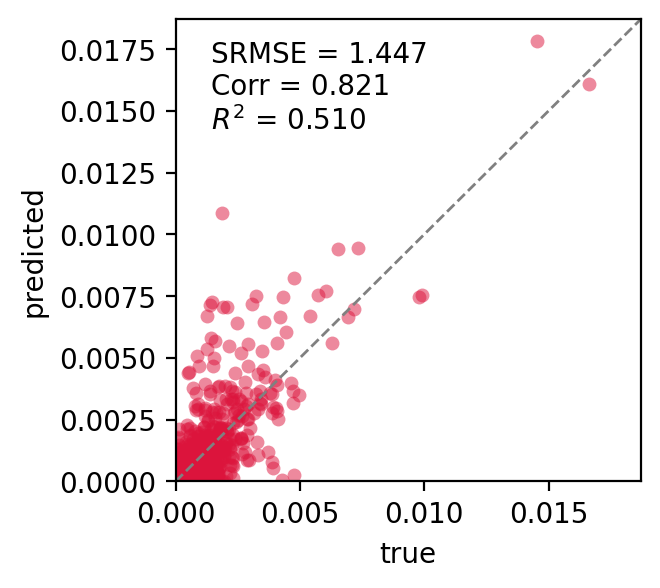

Aggregated variables: 
RespPrimOcc
Gender
Sector
Number of combinations: 1332
corr = 0.983452
MAE = 0.000594
RMSE = 0.001678
SRMSE = 0.855711
r2 = 0.958219


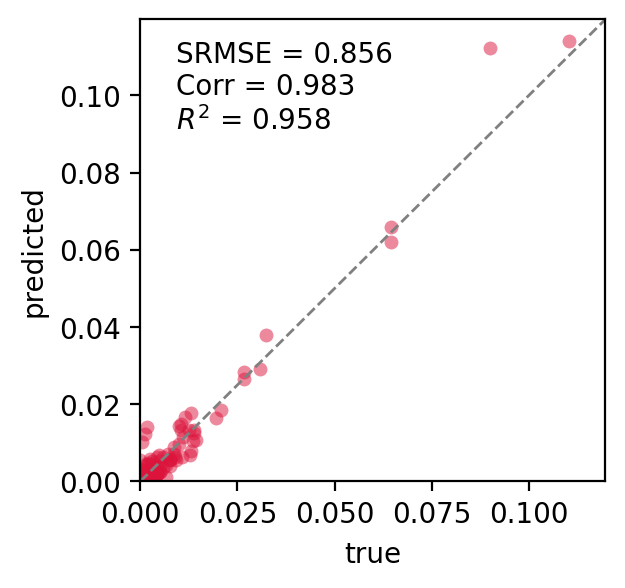

Aggregated variables: 
MunicipalityOrigin
MunicipalityDest
Number of combinations: 9900
corr = 0.823749
MAE = 0.000225
RMSE = 0.000927
SRMSE = 3.996322
r2 = 0.480150


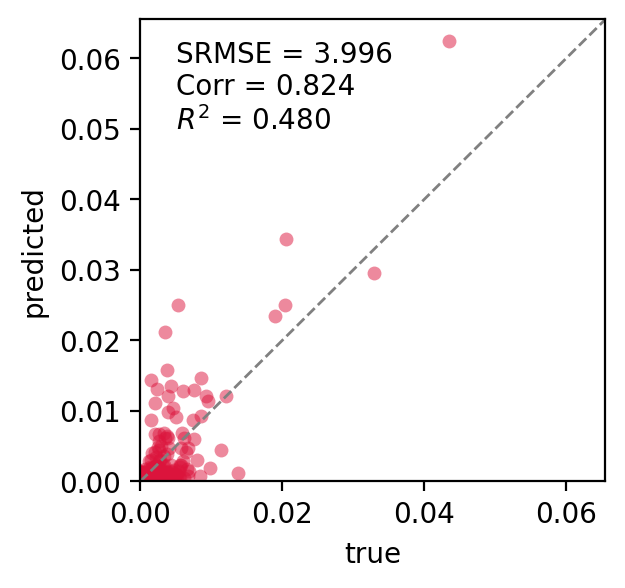

Aggregated variables: 
MunicipalityOrigin
MunicipalityDest
RespPrimOcc
Gender
Number of combinations: 356400
corr = 0.736035
MAE = 0.000092
RMSE = 0.000283
SRMSE = 3.578894
r2 = 0.199943


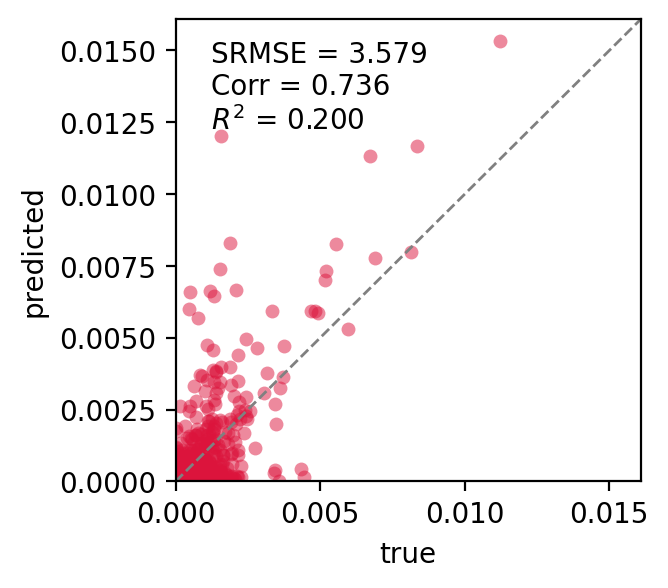

Aggregated variables: 
HomeAdrZone
Number of combinations: 6865
corr = 0.284171
MAE = 0.000261
RMSE = 0.001443
SRMSE = 9.125475
r2 = -95.258059


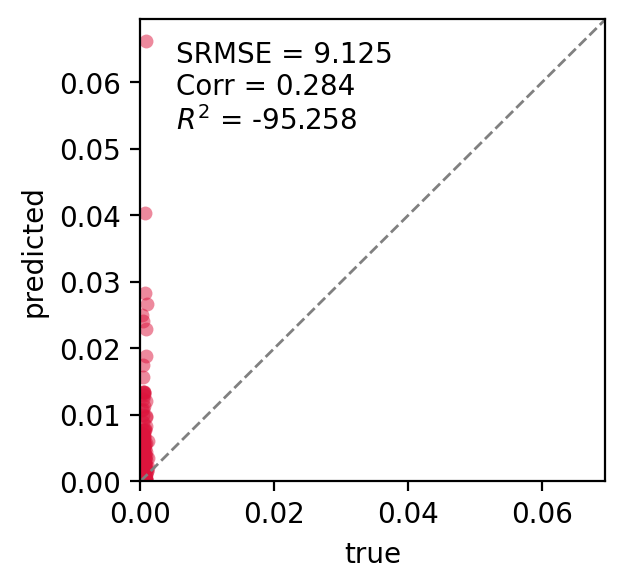

In [ ]:
validationGAN.validate_Gan_Cat(WGAN_samples_v1_newCat_allnum, test, train)

Aggregated variables: 
IncRespondent2000
Gender
RespAgeCorrect
PopSocio
Number of combinations: 818136
corr = 0.573990
MAE = 0.000405
RMSE = 0.001255
SRMSE = 2.644512
r2 = 0.329455


/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['count'] = 1
/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_df['count'] = 1


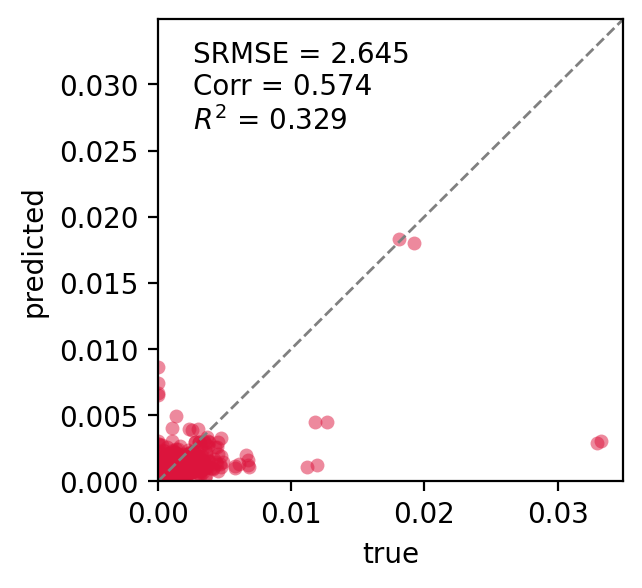

/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['count'] = 1
/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_df['count'] = 1


Aggregated variables: 
MunicipalityOrigin
Gender
RespAgeCorrect
PopSocio
Number of combinations: 78408
corr = 0.556072
MAE = 0.000118
RMSE = 0.000219
SRMSE = 1.780836
r2 = -0.104011


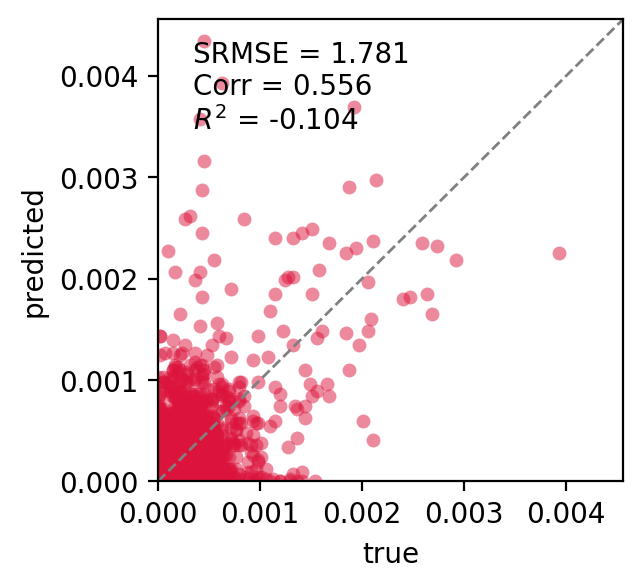

In [ ]:
validationGAN.validate_Gan_Cat_numbin(WGAN_samples_v1_newCat_allnum, test, train, numerical)

In [137]:
WGAN_samples_v1_fewCatAllnum = pd.read_csv('WGAN_samples_fewCol_allNum_p1.csv', sep=',', dtype=df_dtypes)
WGAN_samples_v1_fewCatAllnum =WGAN_samples_v1_fewCatAllnum.sample(41724)
len(WGAN_samples_v1_fewCatAllnum)

41724

In [138]:
testfew = test[WGAN_samples_v1_fewCatAllnum.columns]

In [139]:
stats = validationGAN.validateModel(testfew, WGAN_samples_v1_fewCatAllnum, numerical)


CarModelYear
Education
FuelType
Gender
Handicap


/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:157: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['count'] = 1
/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_df['count'] = 1
/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:157: SettingWithCopyWarning: 
A value is tr

HomeAdrZone
HousehCarOwnership
HwDayspW
KidsBetween0and4
KidsBetween0and15


/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:157: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['count'] = 1
/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_df['count'] = 1
/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:157: SettingWithCopyWarning: 
A value is tr

MunicipalityDest
MunicipalityOrigin
PopSocio
PrimOccZone
RespHasBicycle


/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:157: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['count'] = 1
/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_df['count'] = 1
/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:157: SettingWithCopyWarning: 
A value is tr

RespHasRejsekort
RespIsmemCarshare
RespPrimOcc
ResphasDrivlic
Sector


/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:157: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['count'] = 1
/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_df['count'] = 1
/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:157: SettingWithCopyWarning: 
A value is tr

WorkHourType
Year
IncFamily2000
IncRespondent2000
WorkHoursPw
FamNumAdults


/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_df['count'] = 1
/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:157: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['count'] = 1
/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:161: SettingWithCopyWarning: 
A value is tr

FamNumPers
HousehNumAdults
HousehNumcars
HousehNumPers
RespAgeCorrect


/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:157: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['count'] = 1
/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_df['count'] = 1


In [140]:
stats.loc[~stats.index.isin(['HomeAdrZone', 'PrimOccZone','IncRespondent2000','IncFamily2000', 'RespAgeCorrect'])].mean()

mae      0.017012
rmse     0.022036
r2       0.812616
srmse    0.642231
corr     0.956398
dtype: float64

In [141]:
print(stats.loc[~stats.index.isin(['IncRespondent2000','IncFamily2000'])].to_latex())

\begin{tabular}{lrrrrr}
\toprule
 & mae & rmse & r2 & srmse & corr \\
col &  &  &  &  &  \\
\midrule
CarModelYear & 0.005123 & 0.011096 & 0.760959 & 0.821082 & 0.963337 \\
Education & 0.014866 & 0.019844 & 0.970143 & 0.158749 & 0.988656 \\
FuelType & 0.008142 & 0.013114 & 0.995557 & 0.091795 & 0.997786 \\
Gender & 0.013254 & 0.013254 & -0.228144 & 0.026508 & 1.000000 \\
Handicap & 0.015435 & 0.015435 & 0.998726 & 0.030870 & 1.000000 \\
HomeAdrZone & 0.000270 & 0.002205 & -223.733660 & 13.943473 & 0.221587 \\
HousehCarOwnership & 0.001932 & 0.003294 & 0.999548 & 0.042820 & 0.999806 \\
HwDayspW & 0.009479 & 0.014547 & 0.993987 & 0.116372 & 0.997571 \\
KidsBetween0and4 & 0.004829 & 0.006355 & 0.999726 & 0.025420 & 0.999928 \\
KidsBetween0and15 & 0.005057 & 0.007014 & 0.998971 & 0.056116 & 0.999802 \\
MunicipalityDest & 0.003797 & 0.008856 & 0.919664 & 0.876704 & 0.990190 \\
MunicipalityOrigin & 0.005620 & 0.012301 & -0.354885 & 1.205496 & 0.858957 \\
PopSocio & 0.017017 & 0.020306 & 0.982

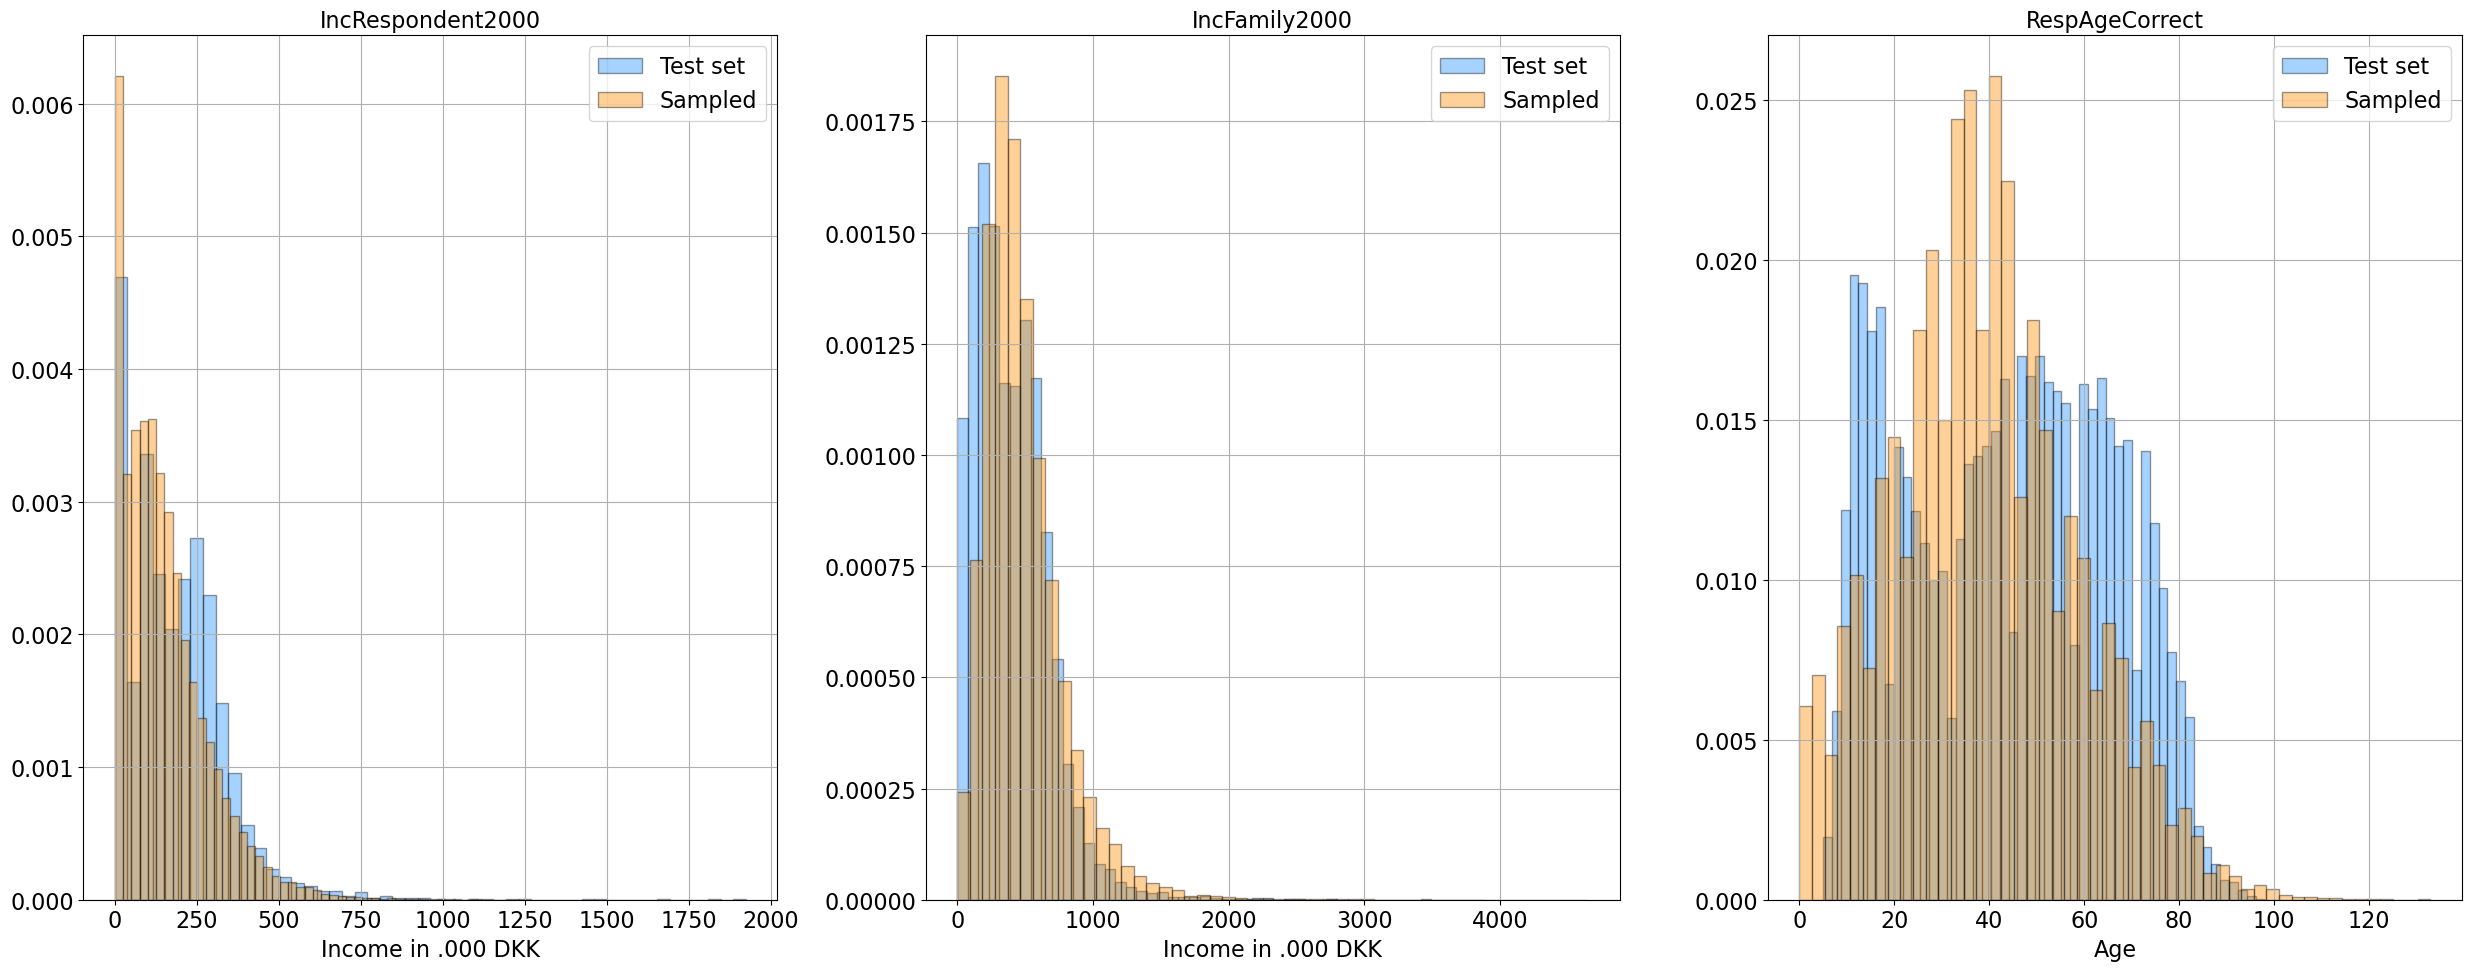

In [ ]:
plotNum(test, WGAN_samples_v1_fewCatAllnum, 'Results/num_WGAN1.png')

In [143]:
numerical = ['RespAgeCorrect', 'IncFamily2000', 'IncRespondent2000']
WGAN_samp = pd.read_csv('WGAN_samples_fewCol_incageNum_toVal.csv', sep=',', dtype=df_dtypes)
len(WGAN_samp)

41724

In [144]:
testfew = test[WGAN_samp.columns]
stats = validationGAN.validateModel(testfew, WGAN_samp, numerical)
stats.mean()

CarModelYear
Education
FamNumAdults
FamNumPers
FuelType


/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:157: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['count'] = 1
/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_df['count'] = 1
/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:157: SettingWithCopyWarning: 
A value is tr

Gender
Handicap
HomeAdrZone


/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:157: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['count'] = 1
/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_df['count'] = 1
/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:157: SettingWithCopyWarning: 
A value is tr

HousehCarOwnership
HousehNumAdults
HousehNumPers
HousehNumcars
HwDayspW
KidsBetween0and4


/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:157: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['count'] = 1
/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_df['count'] = 1
/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:157: SettingWithCopyWarning: 
A value is tr

KidsBetween0and15
MunicipalityDest
MunicipalityOrigin
PopSocio
PrimOccZone
RespHasBicycle


/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:157: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['count'] = 1
/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_df['count'] = 1
/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:157: SettingWithCopyWarning: 
A value is tr

RespHasRejsekort
RespIsmemCarshare
RespPrimOcc
ResphasDrivlic
Sector
WorkHourType


/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:157: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['count'] = 1
/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_df['count'] = 1
/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:157: SettingWithCopyWarning: 
A value is tr

WorkHoursPw
Year
IncFamily2000
IncRespondent2000


/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:157: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['count'] = 1
/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_df['count'] = 1
/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:157: SettingWithCopyWarning: 
A value is tr

RespAgeCorrect


/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:157: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['count'] = 1
/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_df['count'] = 1


mae      0.007797
rmse     0.011206
r2      -1.607373
srmse    0.708197
corr     0.798094
dtype: float64

In [145]:
print(stats.loc[~stats.index.isin(['IncRespondent2000','IncFamily2000'])].to_latex())

\begin{tabular}{lrrrrr}
\toprule
 & mae & rmse & r2 & srmse & corr \\
col &  &  &  &  &  \\
\midrule
CarModelYear & 0.002533 & 0.005154 & 0.948415 & 0.381427 & 0.989994 \\
Education & 0.011187 & 0.016368 & 0.979686 & 0.130943 & 0.995317 \\
FamNumAdults & 0.004373 & 0.006338 & 0.998930 & 0.057045 & 0.999479 \\
FamNumPers & 0.003326 & 0.007069 & 0.995825 & 0.091895 & 0.998480 \\
FuelType & 0.010032 & 0.014981 & 0.994201 & 0.104867 & 0.997543 \\
Gender & 0.015507 & 0.015507 & -0.681154 & 0.031013 & 1.000000 \\
Handicap & 0.002804 & 0.002804 & 0.999958 & 0.005608 & 1.000000 \\
HomeAdrZone & 0.000250 & 0.001223 & -68.142297 & 7.734083 & 0.307330 \\
HousehCarOwnership & 0.005405 & 0.011525 & 0.994471 & 0.149821 & 0.998039 \\
HousehNumAdults & 0.005626 & 0.010434 & 0.996690 & 0.114779 & 0.998992 \\
HousehNumPers & 0.004161 & 0.008912 & 0.992538 & 0.142592 & 0.997384 \\
HousehNumcars & 0.004105 & 0.008612 & 0.996541 & 0.120572 & 0.998335 \\
HwDayspW & 0.006873 & 0.008393 & 0.997999 & 0.067140 

In [72]:
stats.loc[~stats.index.isin(['HomeAdrZone', 'PrimOccZone','IncRespondent2000','IncFamily2000', 'RespAgeCorrect'])].mean()

mae      0.006302
rmse     0.008942
r2       0.913097
srmse    0.134718
corr     0.993180
dtype: float64

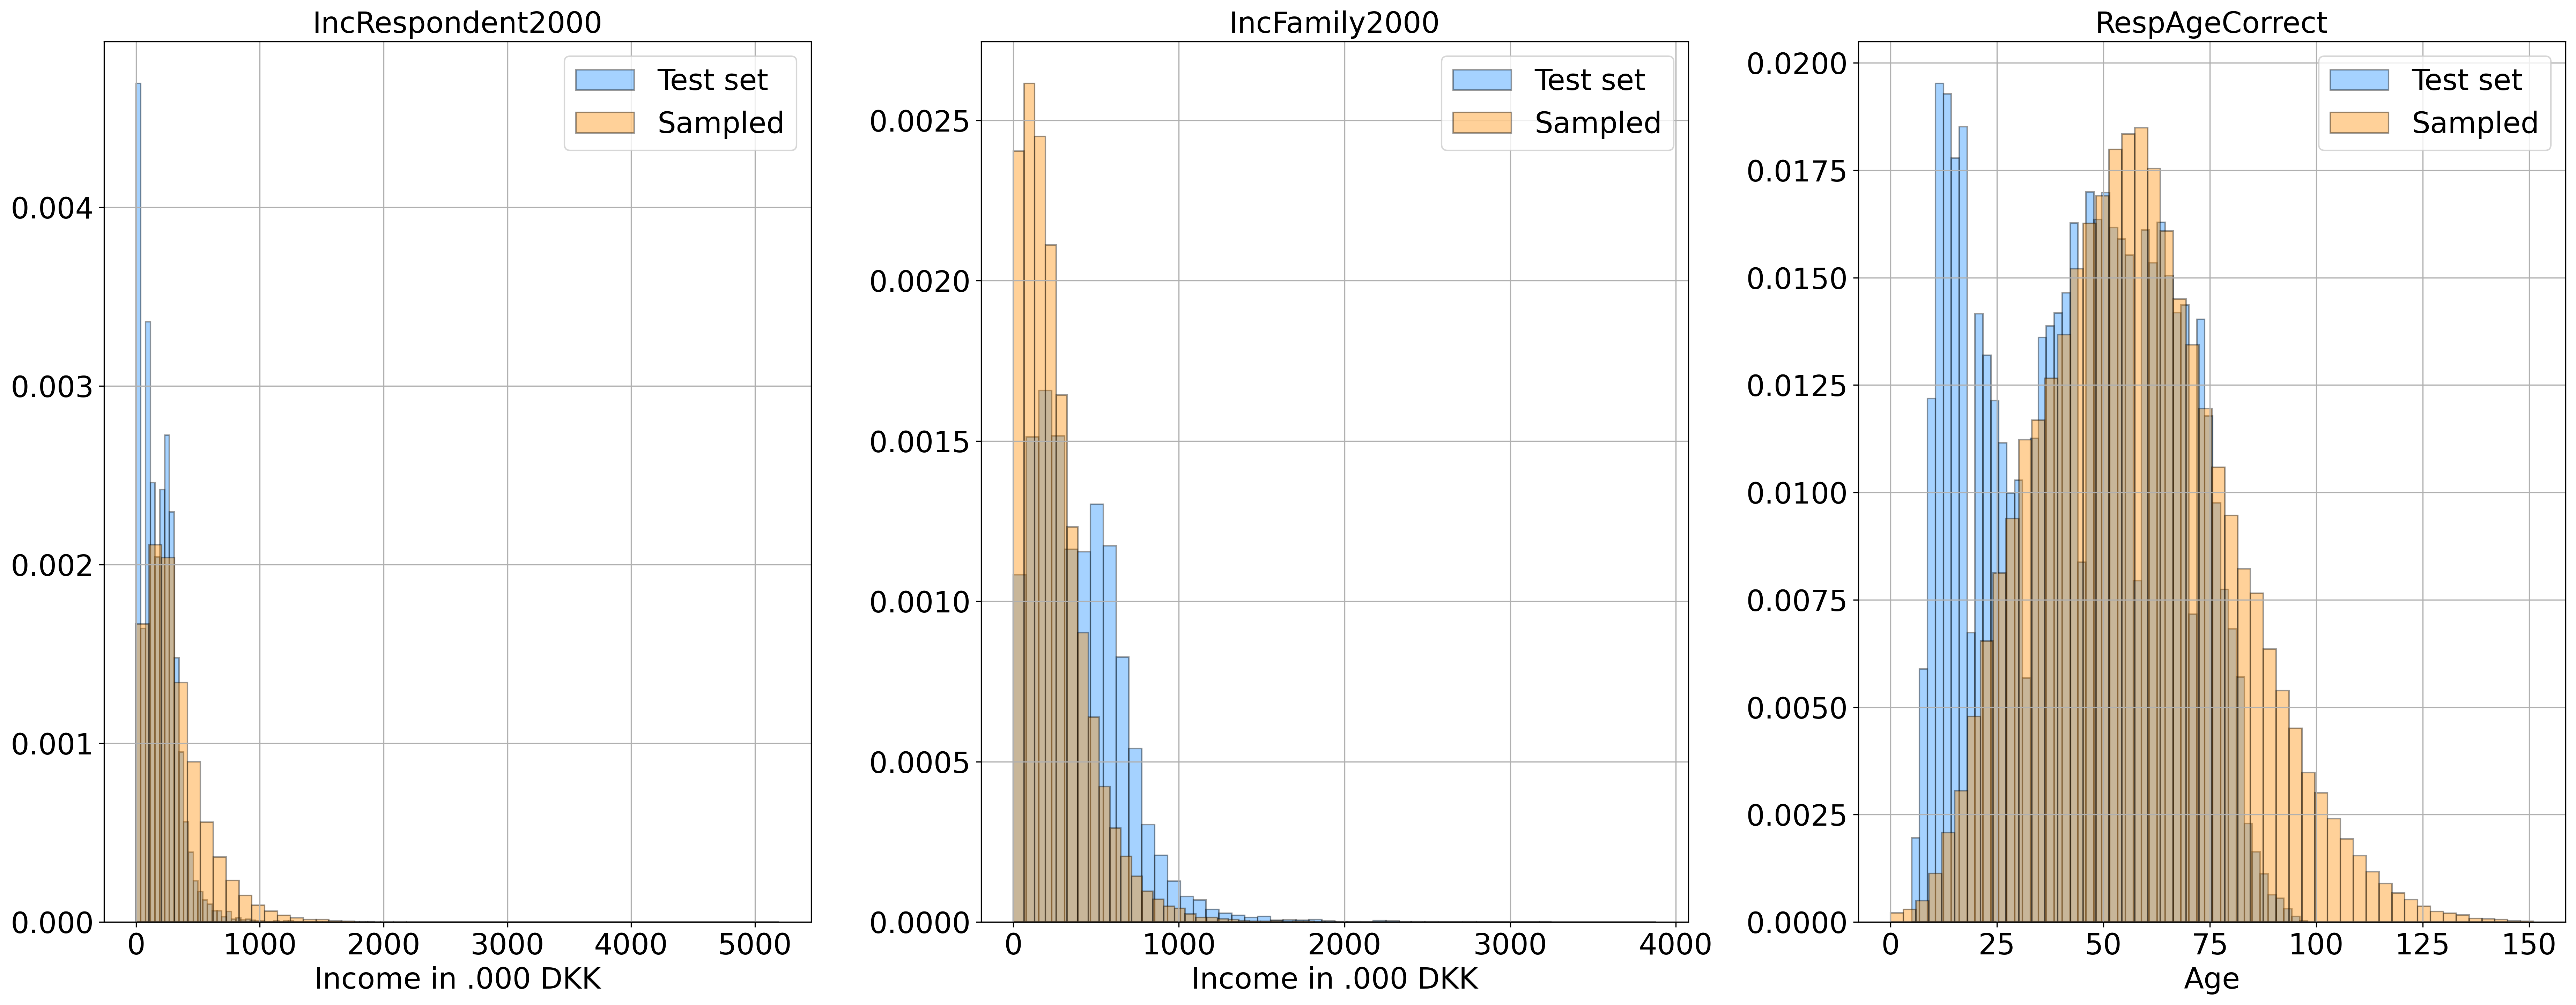

In [77]:
plotNum(test, WGAN_samp, 'Results/num_WGAN2.png')

Aggregated variables: 
MunicipalityOrigin
ResphasDrivlic
PopSocio
Number of combinations: 1584
corr = 0.884117
MAE = 0.000465
RMSE = 0.000988
SRMSE = 1.165247
r2 = 0.724978


/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_df['count'] = 1


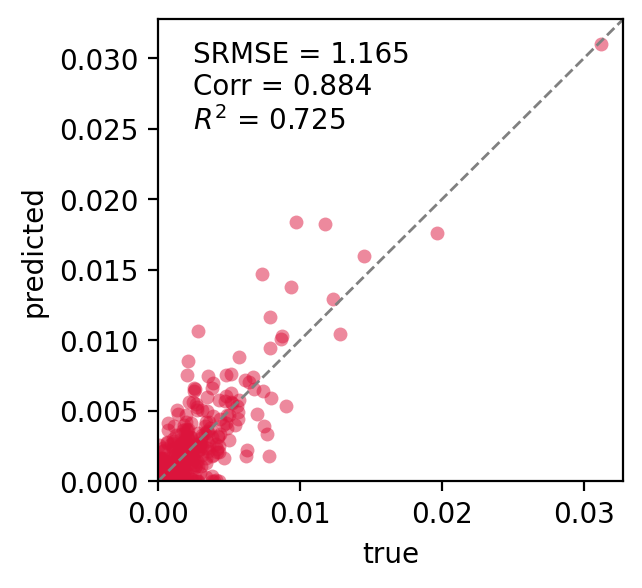

/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_df['count'] = 1


Aggregated variables: 
MunicipalityOrigin
ResphasDrivlic
PopSocio
Gender
Number of combinations: 3168
corr = 0.859833
MAE = 0.000282
RMSE = 0.000577
SRMSE = 1.234727
r2 = 0.656955


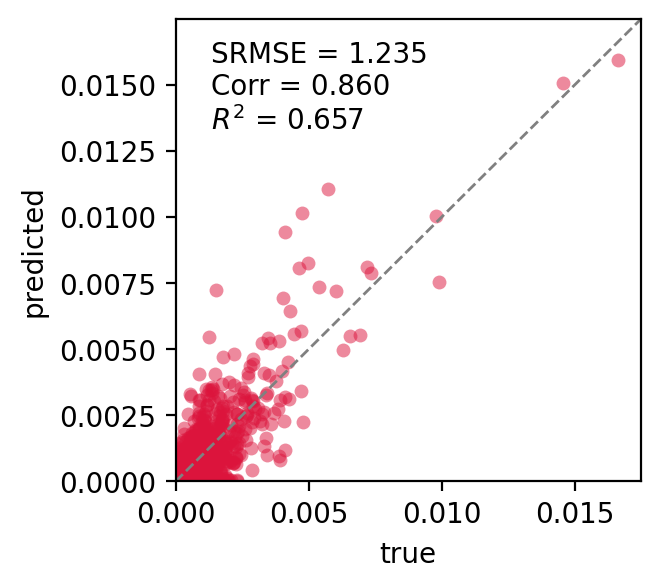

/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_df['count'] = 1


Aggregated variables: 
RespPrimOcc
Gender
Sector
Number of combinations: 1332
corr = 0.988374
MAE = 0.000489
RMSE = 0.001229
SRMSE = 0.660981
r2 = 0.976439


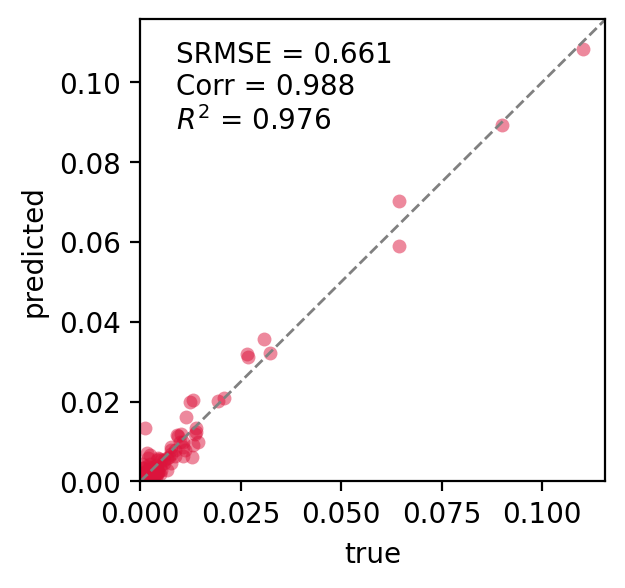

/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_df['count'] = 1


Aggregated variables: 
MunicipalityOrigin
MunicipalityDest
Number of combinations: 9900
corr = 0.880967
MAE = 0.000187
RMSE = 0.000734
SRMSE = 3.292927
r2 = 0.661249


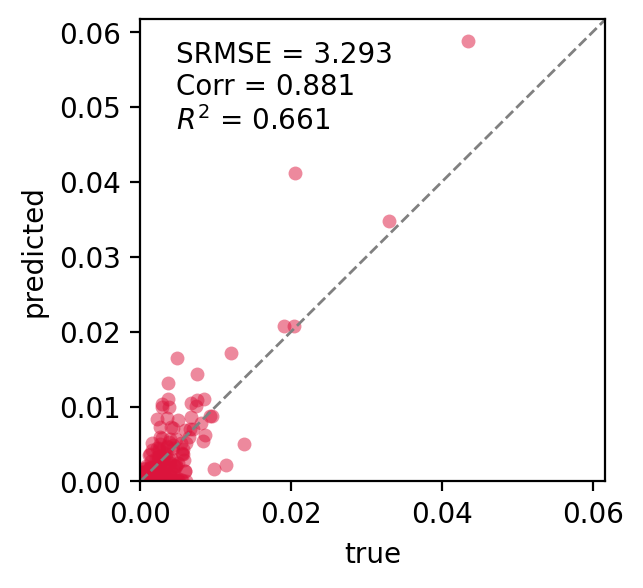

/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_df['count'] = 1


Aggregated variables: 
MunicipalityOrigin
MunicipalityDest
RespPrimOcc
Gender
Number of combinations: 356400
corr = 0.809657
MAE = 0.000081
RMSE = 0.000232
SRMSE = 3.018064
r2 = 0.446060


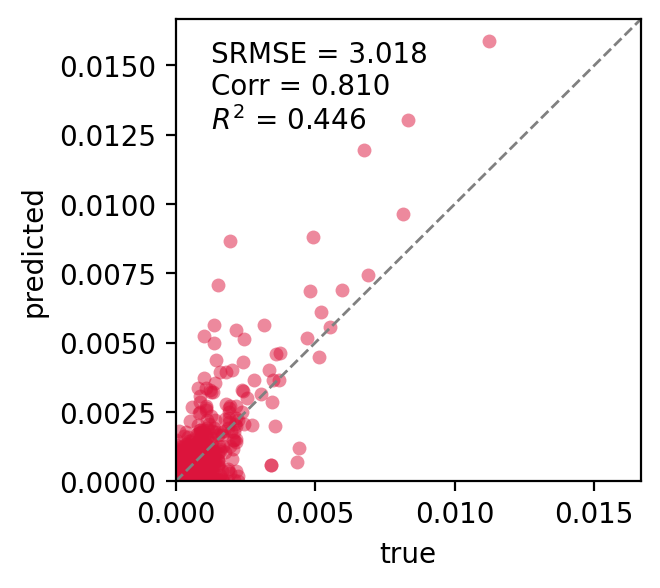

/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_df['count'] = 1


Aggregated variables: 
HomeAdrZone
Number of combinations: 6865
corr = 0.307330
MAE = 0.000250
RMSE = 0.001223
SRMSE = 7.734083
r2 = -68.142297


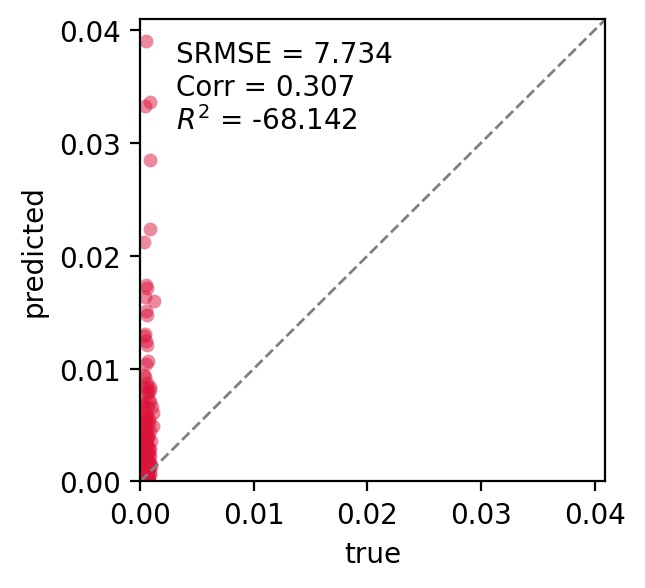

In [ ]:
validationGAN.validate_Gan_Cat(WGAN_samp, testfew, train)

Aggregated variables: 
IncRespondent2000
Gender
RespAgeCorrect
PopSocio
Number of combinations: 818136
corr = 0.243212
MAE = 0.000572
RMSE = 0.001950
SRMSE = 4.189392
r2 = 0.021577


/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['count'] = 1
/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_df['count'] = 1


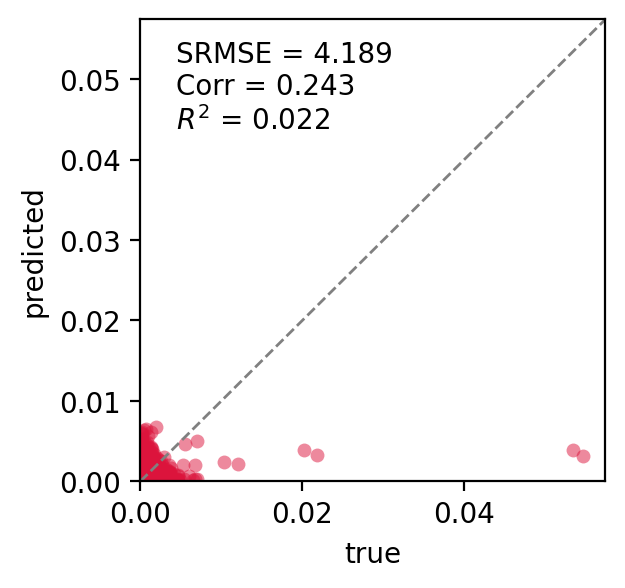

/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['count'] = 1
/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_df['count'] = 1


Aggregated variables: 
MunicipalityOrigin
Gender
RespAgeCorrect
PopSocio
Number of combinations: 78408
corr = 0.376364
MAE = 0.000133
RMSE = 0.000258
SRMSE = 2.214232
r2 = -0.297655


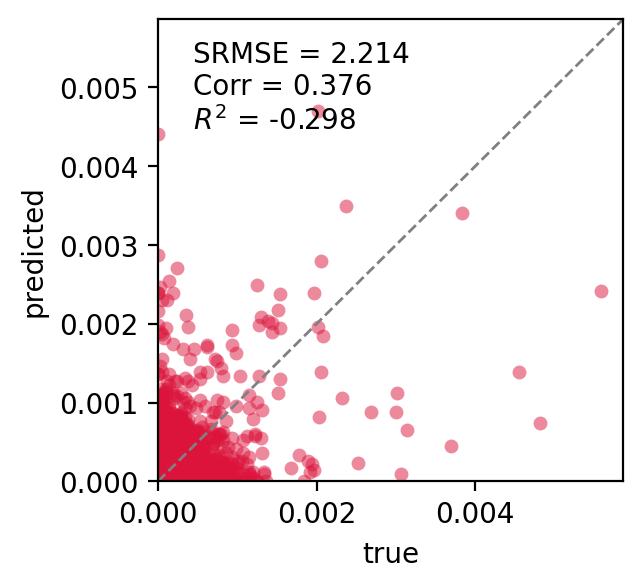

In [ ]:
validationGAN.validate_Gan_Cat_numbin(WGAN_samp, testfew, train, numerical)

### DATGAN

In [146]:
datGan_5 = pd.read_csv('DatGan_synthetic_5.csv', sep=',', dtype=df_dtypes)
test5 = test[datGan_5.columns]

In [147]:
stats = validationGAN.validateModel(test5, datGan_5, numerical)
stats.mean()

HousehCarOwnership
IncFamily2000
FamNumAdults
FamNumPers
HousehNumAdults
HousehNumPers
IncRespondent2000
WorkHoursPw


/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:157: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['count'] = 1
/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_df['count'] = 1
/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:157: SettingWithCopyWarning: 
A value is tr

HousehNumcars
Year
Gender
RespAgeCorrect
Education
Handicap
PopSocio


/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:157: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['count'] = 1
/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_df['count'] = 1
/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:157: SettingWithCopyWarning: 
A value is tr

RespPrimOcc
KidsBetween0and15
KidsBetween0and4
CarModelYear
MunicipalityOrigin
MunicipalityDest
HomeAdrZone


/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_df['count'] = 1
/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:157: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['count'] = 1
/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:161: SettingWithCopyWarning: 
A value is tr

PrimOccZone
WorkHourType
RespHasBicycle
ResphasDrivlic
RespHasRejsekort
RespIsmemCarshare
Sector


/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_df['count'] = 1
/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:157: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['count'] = 1
/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:161: SettingWithCopyWarning: 
A value is tr

HwDayspW
FuelType
HomeParkPoss
RespHasSeasonticket
HousehAccomodation
HousehAccOwnorRent


/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_df['count'] = 1
/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:157: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['count'] = 1
/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:161: SettingWithCopyWarning: 
A value is tr

PosInFamily
PrimModeDay
ModeChainTypeDay


mae      0.049015
rmse     0.064021
r2      -8.538953
srmse    3.928320
corr     0.723845
dtype: float64

In [148]:
print(stats.loc[~stats.index.isin(['IncRespondent2000','IncFamily2000'])].to_latex())

\begin{tabular}{lrrrrr}
\toprule
 & mae & rmse & r2 & srmse & corr \\
col &  &  &  &  &  \\
\midrule
HousehCarOwnership & 0.002859 & 0.006728 & 0.998006 & 0.094193 & 0.999010 \\
FamNumAdults & 0.006932 & 0.014820 & 0.993708 & 0.148198 & 0.997756 \\
FamNumPers & 0.004049 & 0.008465 & 0.994013 & 0.110040 & 0.997003 \\
HousehNumAdults & 0.004465 & 0.009895 & 0.997024 & 0.108848 & 0.998903 \\
HousehNumPers & 0.003085 & 0.006579 & 0.995934 & 0.105261 & 0.997987 \\
WorkHoursPw & 0.000051 & 0.003015 & -0.000149 & 118.260866 & -0.030353 \\
HousehNumcars & 0.005867 & 0.013024 & 0.991220 & 0.208381 & 0.995714 \\
Year & 0.001698 & 0.002261 & 0.993907 & 0.029396 & 0.996952 \\
Gender & 0.211034 & 0.211034 & -310.370032 & 0.422069 & -1.000000 \\
RespAgeCorrect & 0.058634 & 0.072807 & -12.893884 & 1.164912 & -0.552160 \\
Education & 0.056561 & 0.090805 & 0.374782 & 0.726441 & 0.740943 \\
Handicap & 0.046517 & 0.046517 & 0.988433 & 0.093034 & 1.000000 \\
PopSocio & 0.131777 & 0.159995 & -0.089568 & 0.

In [ ]:
stats.loc[~stats.index.isin(['HomeAdrZone', 'PrimOccZone','IncRespondent2000','IncFamily2000', 'RespAgeCorrect'])].mean()

mae      0.049092
rmse     0.064010
r2      -8.944289
srmse    4.110480
corr     0.842238
dtype: float64

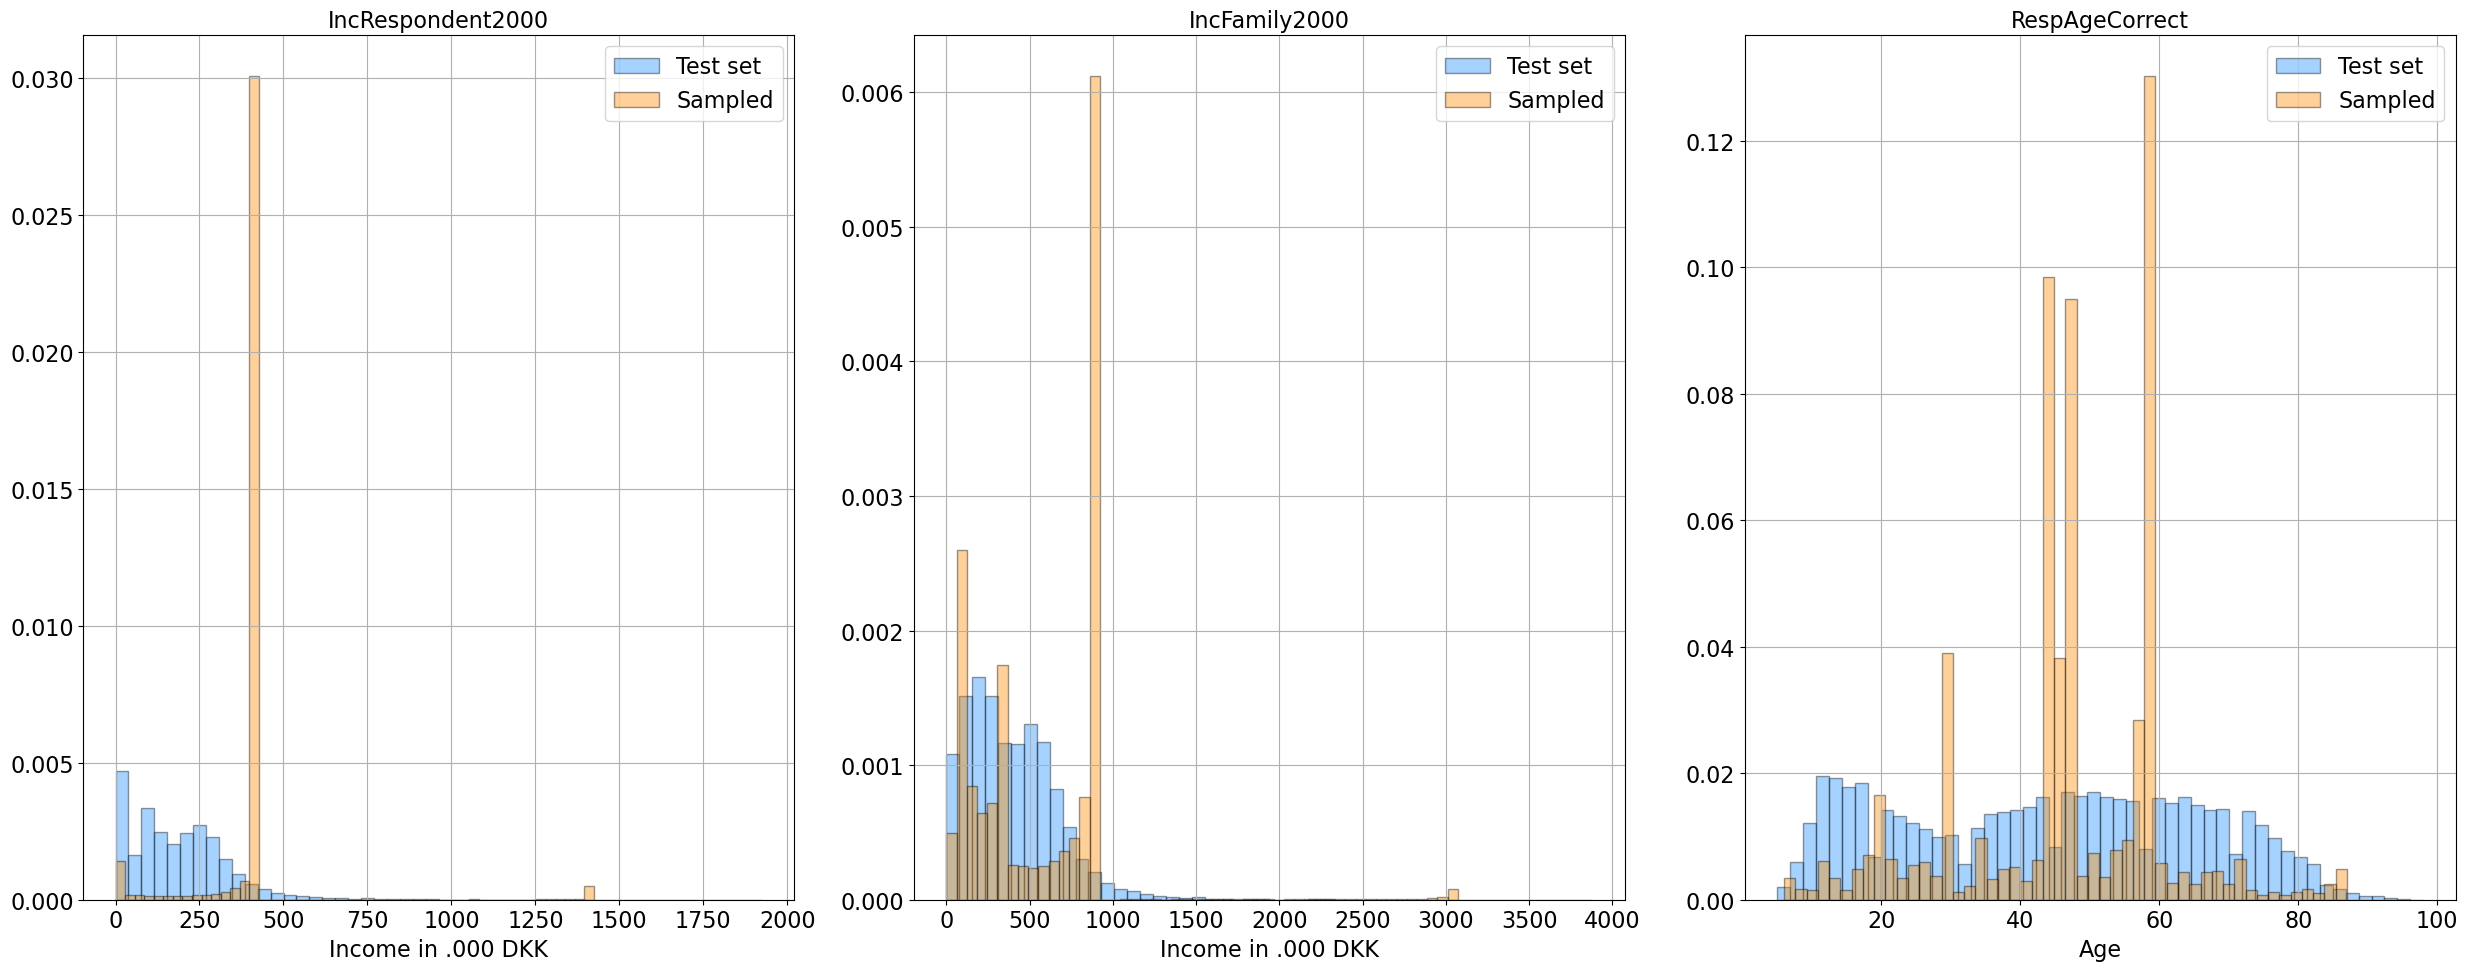

In [149]:
plotNum(test, datGan_5, 'Results/num_datgan5.png')

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
validationGAN.validate_Gan_Cat(datGan_5, test5, train)

In [ ]:
validationGAN.validate_Gan_Cat_numbin(datGan_5, test5, train, numerical)

In [150]:
numerical = ['IncFamily2000', 'IncRespondent2000']
datGan_5v2 = pd.read_csv('DatGan_synthetic_5v2.csv', sep=',', dtype=df_dtypes)
test5 = test[datGan_5v2.columns]

In [151]:
stats = validationGAN.validateModel(test5, datGan_5v2, numerical)
stats.mean()

HousehCarOwnership
IncFamily2000
FamNumAdults
FamNumPers
HousehNumAdults
HousehNumPers


/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:157: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['count'] = 1
/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_df['count'] = 1
/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:157: SettingWithCopyWarning: 
A value is tr

IncRespondent2000
WorkHoursPw
HousehNumcars
Year
Gender
RespAgeCorrect
Education


/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:157: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['count'] = 1
/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_df['count'] = 1
/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:157: SettingWithCopyWarning: 
A value is tr

Handicap
PopSocio
RespPrimOcc
KidsBetween0and15
KidsBetween0and4
CarModelYear
MunicipalityOrigin


/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:157: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['count'] = 1
/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_df['count'] = 1
/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:157: SettingWithCopyWarning: 
A value is tr

MunicipalityDest
HomeAdrZone
PrimOccZone
WorkHourType
RespHasBicycle
ResphasDrivlic


/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_df['count'] = 1
/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:157: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['count'] = 1
/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:161: SettingWithCopyWarning: 
A value is tr

RespHasRejsekort
RespIsmemCarshare
Sector
HwDayspW
FuelType
HomeParkPoss
RespHasSeasonticket


/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:157: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['count'] = 1
/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_df['count'] = 1
/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:157: SettingWithCopyWarning: 
A value is tr

HousehAccomodation
HousehAccOwnorRent
PosInFamily
PrimModeDay
ModeChainTypeDay


mae      0.014827
rmse     0.022418
r2       0.599509
srmse    0.418897
corr     0.889279
dtype: float64

In [ ]:
stats.loc[~stats.index.isin(['HomeAdrZone', 'PrimOccZone','IncRespondent2000','IncFamily2000', 'RespAgeCorrect'])].mean()

mae      0.012651
rmse     0.020296
r2       0.928102
srmse    0.299640
corr     0.984818
dtype: float64

In [152]:
print(stats.loc[~stats.index.isin(['IncRespondent2000','IncFamily2000'])].to_latex())

\begin{tabular}{lrrrrr}
\toprule
 & mae & rmse & r2 & srmse & corr \\
col &  &  &  &  &  \\
\midrule
HousehCarOwnership & 0.007087 & 0.016515 & 0.987984 & 0.231211 & 0.994032 \\
FamNumAdults & 0.013459 & 0.027965 & 0.977594 & 0.279651 & 0.992197 \\
FamNumPers & 0.009154 & 0.018700 & 0.970781 & 0.243095 & 0.985474 \\
HousehNumAdults & 0.009974 & 0.022114 & 0.985136 & 0.243251 & 0.995209 \\
HousehNumPers & 0.006294 & 0.014501 & 0.980245 & 0.232014 & 0.990380 \\
WorkHoursPw & 0.004009 & 0.021558 & 0.882833 & 1.875555 & 0.944665 \\
HousehNumcars & 0.008375 & 0.018903 & 0.981503 & 0.302453 & 0.990818 \\
Year & 0.001721 & 0.002174 & 0.994371 & 0.028256 & 0.997671 \\
Gender & 0.010018 & 0.010018 & 0.298339 & 0.020036 & 1.000000 \\
RespAgeCorrect & 0.000553 & 0.000765 & 0.982735 & 0.075708 & 0.991374 \\
Education & 0.004504 & 0.007074 & 0.996206 & 0.056589 & 0.998146 \\
Handicap & 0.001980 & 0.001980 & 0.999979 & 0.003960 & 1.000000 \\
PopSocio & 0.013073 & 0.016030 & 0.989063 & 0.064118 & 0.9

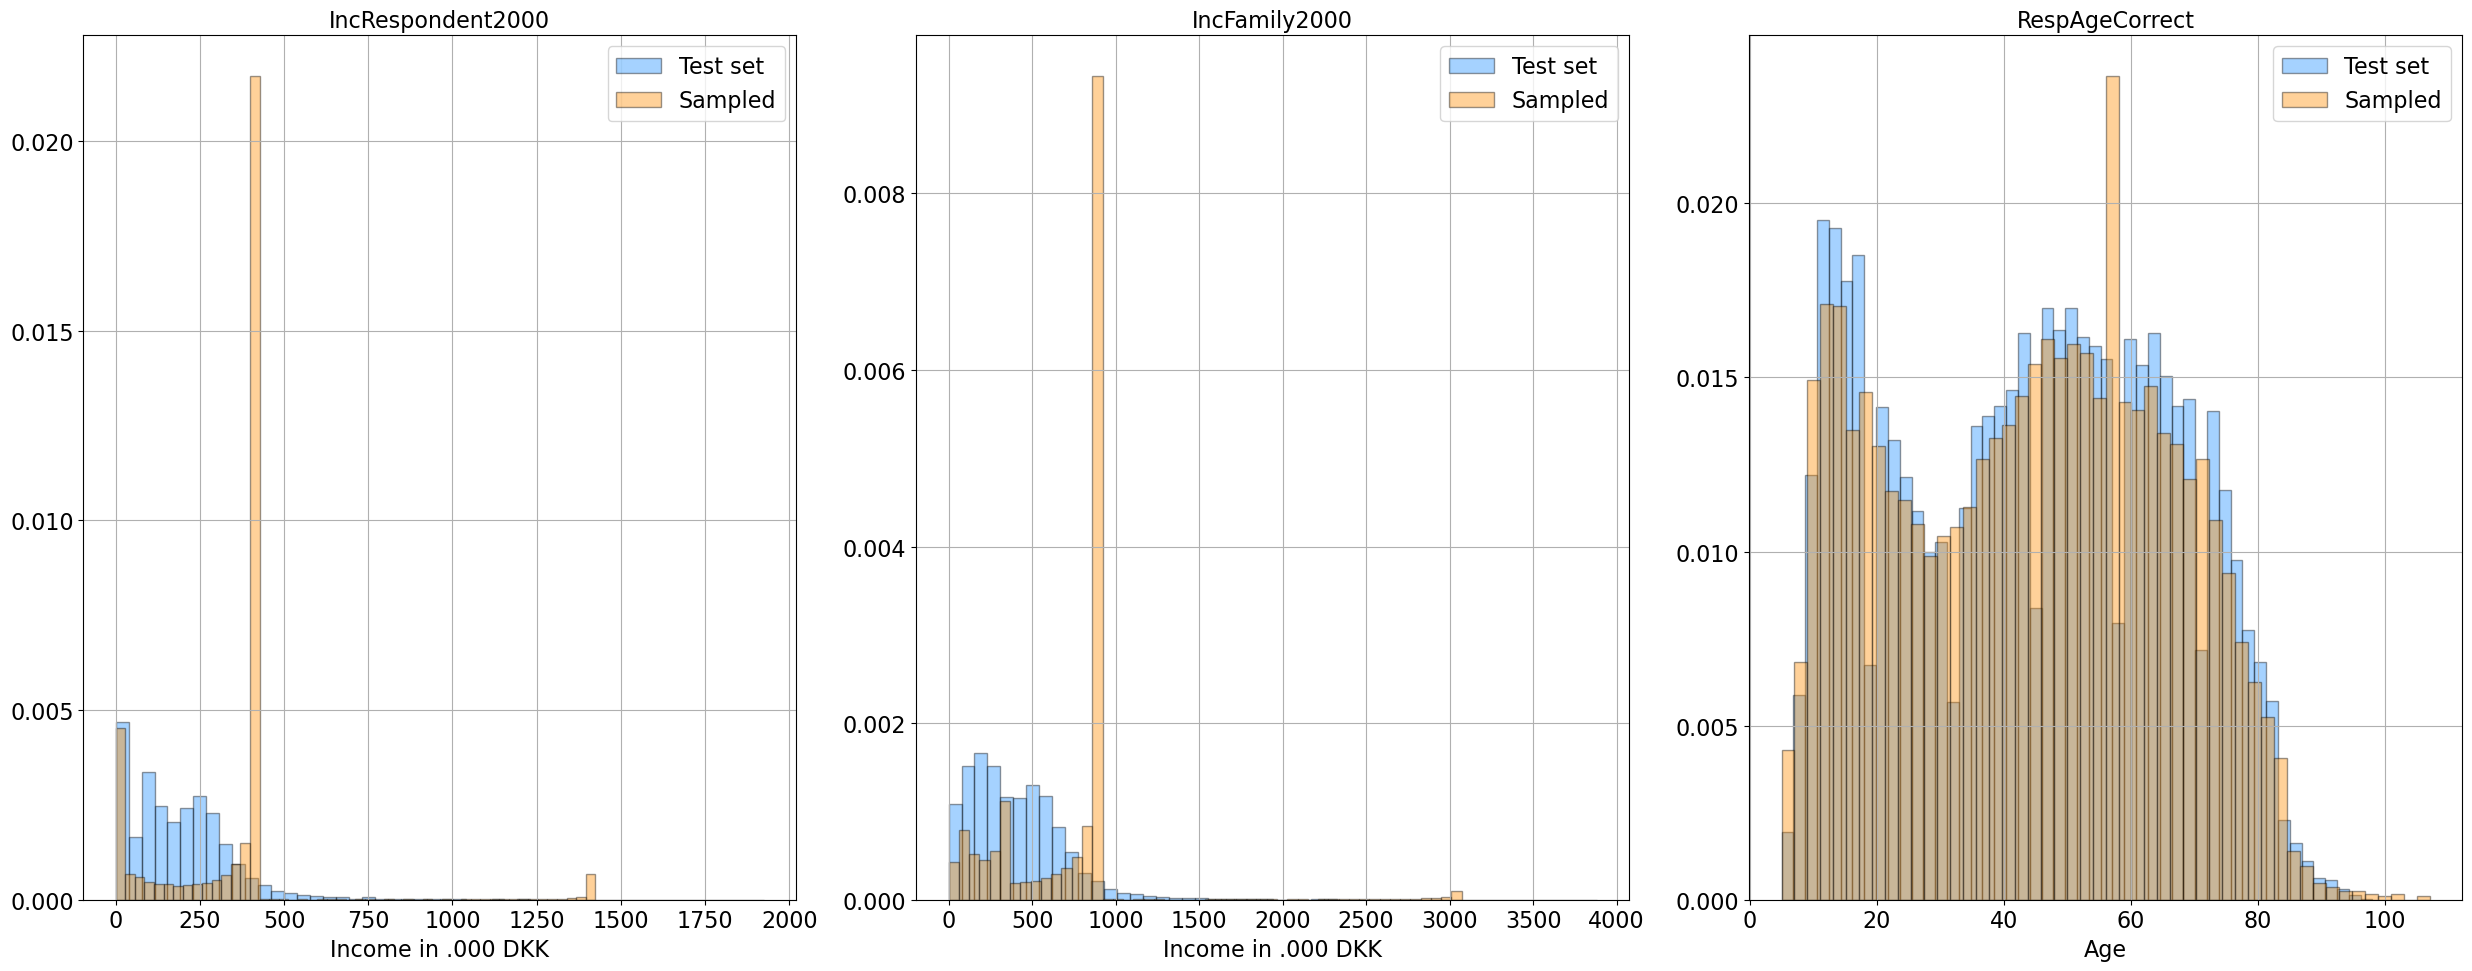

In [ ]:
plotNum(test, datGan_5v2, 'Results/num_datgan52.png')

In [ ]:
validationGAN.validate_Gan_Cat(datGan_5v2, test5, train)

In [ ]:
validationGAN.validate_Gan_Cat_numbin(datGan_5v2, test5, train, numerical)

In [153]:
datGan_6 = pd.read_csv('DatGan_synthetic_6.csv', sep=',', dtype=df_dtypes)
test6 = test[datGan_6.columns]

In [154]:
stats = validationGAN.validateModel(test6, datGan_6, numerical)
stats.mean()

HousehCarOwnership
IncFamily2000
FamNumAdults
FamNumPers
HousehNumAdults


/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:157: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['count'] = 1
/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_df['count'] = 1
/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:157: SettingWithCopyWarning: 
A value is tr

HousehNumPers
IncRespondent2000
WorkHoursPw
HousehNumcars


/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:157: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['count'] = 1
/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_df['count'] = 1
/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:157: SettingWithCopyWarning: 
A value is tr

Year
Gender
RespAgeCorrect
Education
Handicap
PopSocio


/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_df['count'] = 1
/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:157: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['count'] = 1
/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:161: SettingWithCopyWarning: 
A value is tr

RespPrimOcc
KidsBetween0and15
KidsBetween0and4
CarModelYear
MunicipalityOrigin
MunicipalityDest
HomeAdrZone


/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:157: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['count'] = 1
/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_df['count'] = 1
/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:157: SettingWithCopyWarning: 
A value is tr

PrimOccZone
WorkHourType
RespHasBicycle
ResphasDrivlic
RespHasRejsekort


/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:157: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['count'] = 1
/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_df['count'] = 1
/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:157: SettingWithCopyWarning: 
A value is tr

RespIsmemCarshare
Sector
HwDayspW
FuelType
HomeParkPoss
RespHasSeasonticket
HousehAccomodation
HousehAccOwnorRent
PosInFamily
PrimModeDay
ModeChainTypeDay


/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_df['count'] = 1
/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:157: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['count'] = 1
/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:161: SettingWithCopyWarning: 
A value is tr

mae      0.033827
rmse     0.053361
r2       0.254687
srmse    3.871064
corr     0.790607
dtype: float64

In [155]:
print(stats.loc[~stats.index.isin(['IncRespondent2000','IncFamily2000'])].to_latex())

\begin{tabular}{lrrrrr}
\toprule
 & mae & rmse & r2 & srmse & corr \\
col &  &  &  &  &  \\
\midrule
HousehCarOwnership & 0.049618 & 0.113448 & 0.433010 & 1.588273 & 0.694035 \\
FamNumAdults & 0.067148 & 0.115684 & 0.643573 & 1.041156 & 0.943503 \\
FamNumPers & 0.038823 & 0.062341 & 0.675254 & 0.810434 & 0.832462 \\
HousehNumAdults & 0.051828 & 0.099372 & 0.699839 & 1.093092 & 0.951555 \\
HousehNumPers & 0.034019 & 0.059600 & 0.666277 & 0.953607 & 0.831518 \\
WorkHoursPw & 0.000054 & 0.003095 & -0.000163 & 115.212758 & -0.021143 \\
HousehNumcars & 0.045759 & 0.107066 & 0.465337 & 1.498928 & 0.731957 \\
Year & 0.001794 & 0.002677 & 0.991460 & 0.034803 & 0.995904 \\
Gender & 0.003066 & 0.003066 & 0.934256 & 0.006133 & 1.000000 \\
RespAgeCorrect & 0.005286 & 0.007134 & -0.698848 & 0.670607 & 0.443019 \\
Education & 0.001876 & 0.002406 & 0.999561 & 0.019250 & 0.999790 \\
Handicap & 0.001592 & 0.001592 & 0.999986 & 0.003184 & 1.000000 \\
PopSocio & 0.008027 & 0.009750 & 0.995954 & 0.039000 

In [ ]:
stats.loc[~stats.index.isin(['HomeAdrZone', 'PrimOccZone','IncRespondent2000','IncFamily2000', 'RespAgeCorrect'])].mean()

mae      0.033033
rmse     0.054033
r2       0.681732
srmse    4.116816
corr     0.874929
dtype: float64

In [ ]:
stats

mae      rmse        r2       srmse      corr
col                                                                    
HousehCarOwnership   0.049618  0.113448  0.433010    1.588273  0.694035
IncFamily2000        0.103166  0.133492 -9.538778    2.135865 -0.730519
FamNumAdults         0.067148  0.115684  0.643573    1.041156  0.943503
FamNumPers           0.038823  0.062341  0.675254    0.810434  0.832462
HousehNumAdults      0.051828  0.099372  0.699839    1.093092  0.951555
HousehNumPers        0.034019  0.059600  0.666277    0.953607  0.831518
IncRespondent2000    0.086721  0.102918 -4.212994    1.646692 -0.376084
WorkHoursPw          0.000054  0.003095 -0.000163  115.212758 -0.021143
HousehNumcars        0.045759  0.107066  0.465337    1.498928  0.731957
Year                 0.001794  0.002677  0.991460    0.034803  0.995904
Gender               0.003066  0.003066  0.934256    0.006133  1.000000
RespAgeCorrect       0.005286  0.007134 -0.698848    0.670607  0.443019
Education            0.001876  0.002406  0.999561    0.019250  0.999790
Handicap             0.001592  0.001592  0.999986    0.003184  1.000000
PopSocio             0.008027  0.009750  0.995954    0.039000  0.998745
RespPrimOcc          0.001604  0.002637  0.999304    0.047470  0.999756
KidsBetween0and15    0.064545  0.098270  0.798083    0.786156  0.909115
KidsBetween0and4     0.003433  0.004524  0.999861    0.018096  0.999964
CarModelYear         0.005621  0.014350  0.600152    1.061935  0.799404
MunicipalityOrigin   0.002827  0.004498  0.818689    0.445314  0.924307
MunicipalityDest     0.005249  0.024191  0.395088    2.419102  0.669168
HomeAdrZone          0.000063  0.000081  0.697349    0.554466  0.835440
PrimOccZone          0.000083  0.001014  0.934192    6.237876  0.998543
WorkHourType         0.101633  0.142625  0.347441    0.855749  0.589683
RespHasBicycle       0.001819  0.001819  0.999907    0.003637  1.000000
ResphasDrivlic       0.003698  0.004525  0.999741    0.018099  0.999952
RespHasRejsekort     0.001362  0.001761  0.999525    0.017612  0.999764
RespIsmemCarshare    0.004564  0.004564  0.999871    0.009129  1.000000
Sector               0.001380  0.002691  0.998168    0.099584  0.999509
HwDayspW             0.076491  0.135440  0.478762    1.083522  0.900299
FuelType             0.089668  0.150879  0.411819    1.056151  0.685167
HomeParkPoss         0.020999  0.044758  0.434179    0.850407  0.672485
RespHasSeasonticket  0.001891  0.001891  0.999971    0.003782  1.000000
HousehAccomodation   0.118510  0.166145 -0.075218    0.996868  0.938474
HousehAccOwnorRent   0.192369  0.212278  0.147475    0.636833  0.963289
PosInFamily          0.004207  0.004971  0.979729    0.019886  0.990426
PrimModeDay          0.026067  0.071171  0.617603    1.708116  0.964333
ModeChainTypeDay     0.058558  0.108990  0.042675    1.416871  0.909240

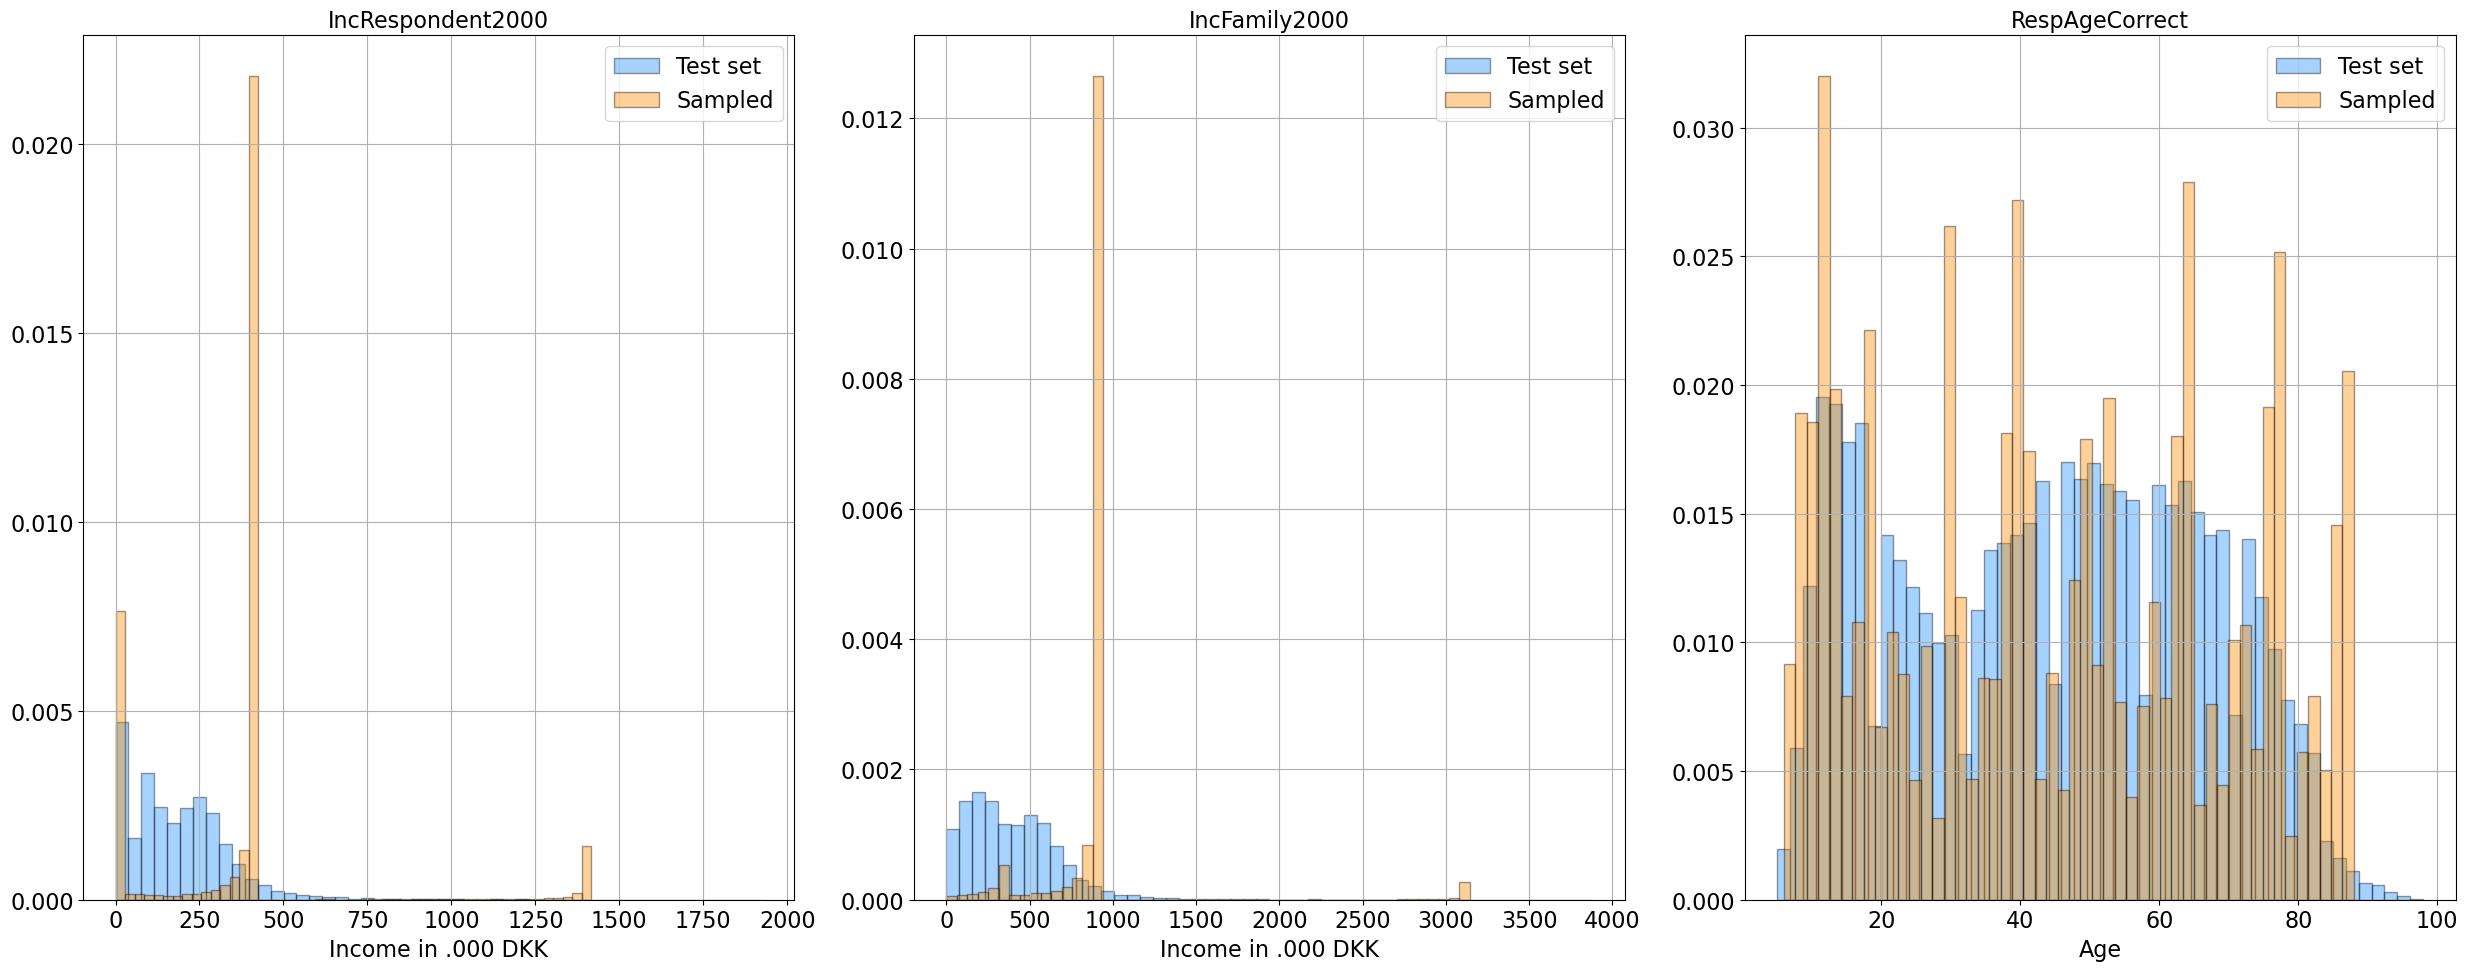

In [ ]:
plotNum(test, datGan_6, 'Results/num_datgan6.png')

Aggregated variables: 
MunicipalityOrigin
ResphasDrivlic
PopSocio
Number of combinations: 1584
corr = 0.889440
MAE = 0.000393
RMSE = 0.000821
SRMSE = 1.158593
r2 = 0.780318


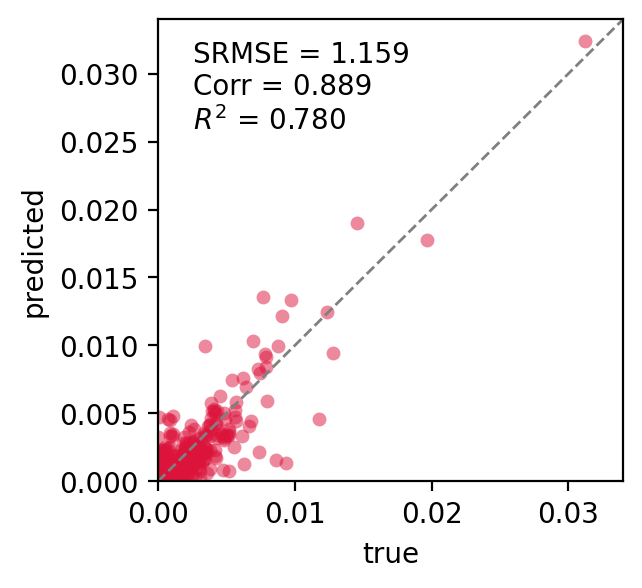

Aggregated variables: 
MunicipalityOrigin
ResphasDrivlic
PopSocio
Gender
Number of combinations: 3168
corr = 0.880759
MAE = 0.000224
RMSE = 0.000442
SRMSE = 1.155424
r2 = 0.763481


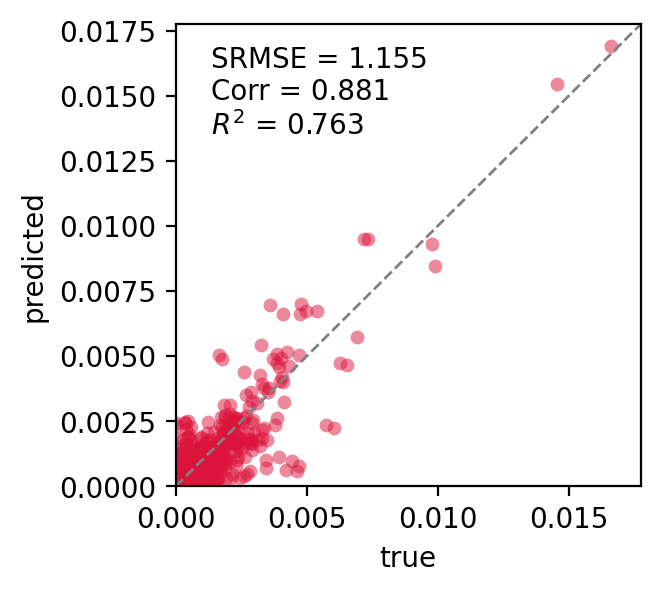

Aggregated variables: 
RespPrimOcc
Gender
Sector
Number of combinations: 1332
corr = 0.809292
MAE = 0.000862
RMSE = 0.003753
SRMSE = 3.317865
r2 = 0.646168


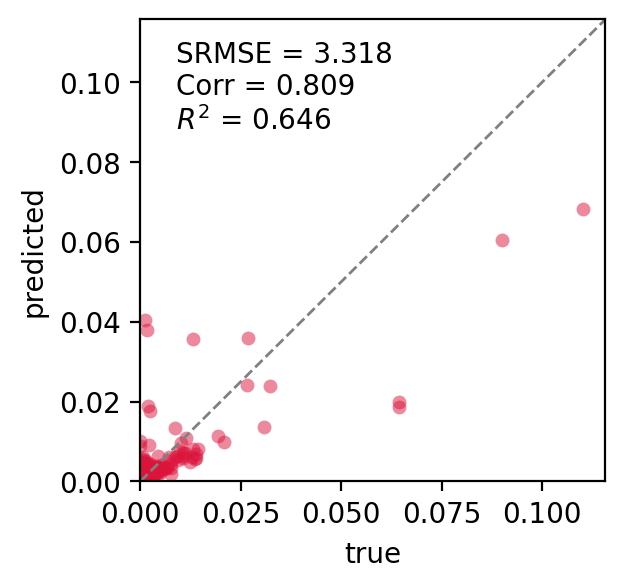

Aggregated variables: 
MunicipalityOrigin
MunicipalityDest
Number of combinations: 9900
corr = 0.786061
MAE = 0.000213
RMSE = 0.000695
SRMSE = 3.990025
r2 = 0.614317


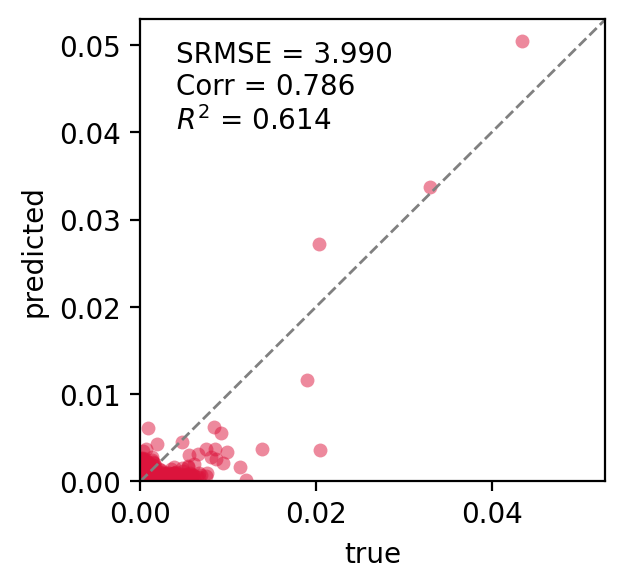

Aggregated variables: 
MunicipalityOrigin
MunicipalityDest
RespPrimOcc
Gender
Number of combinations: 356400
corr = 0.658211
MAE = 0.000065
RMSE = 0.000181
SRMSE = 4.075417
r2 = 0.432372


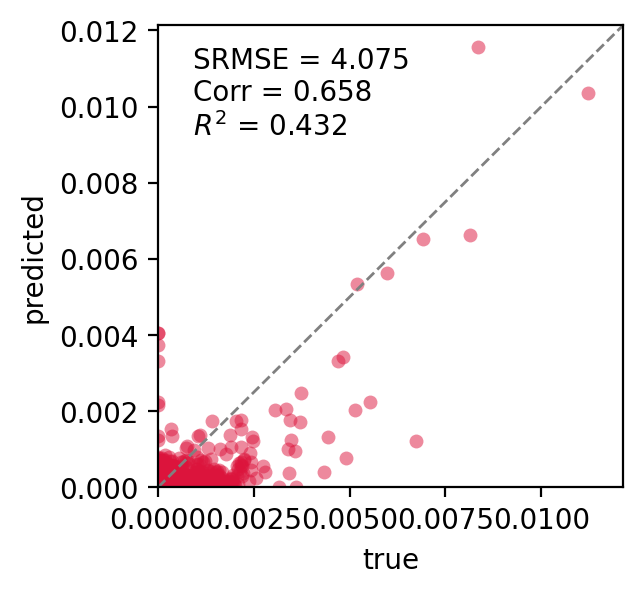

Aggregated variables: 
HomeAdrZone
Number of combinations: 6865
corr = 0.835440
MAE = 0.000063
RMSE = 0.000081
SRMSE = 0.554466
r2 = 0.697349


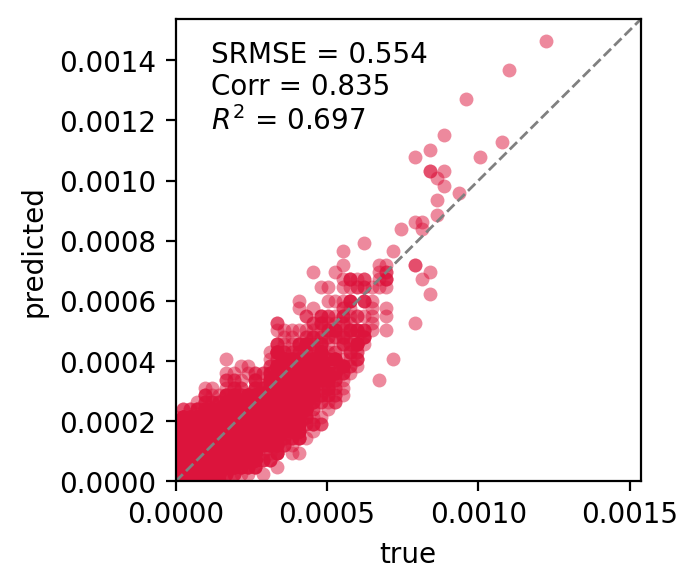

In [ ]:
validationGAN.validate_Gan_Cat(datGan_6, test6, train)

Aggregated variables: 
IncRespondent2000
Gender
RespAgeCorrect
PopSocio
Number of combinations: 818136
corr = 0.076686
MAE = 0.000252
RMSE = 0.000530
SRMSE = 3.743794
r2 = -0.193256


/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['count'] = 1
/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_df['count'] = 1


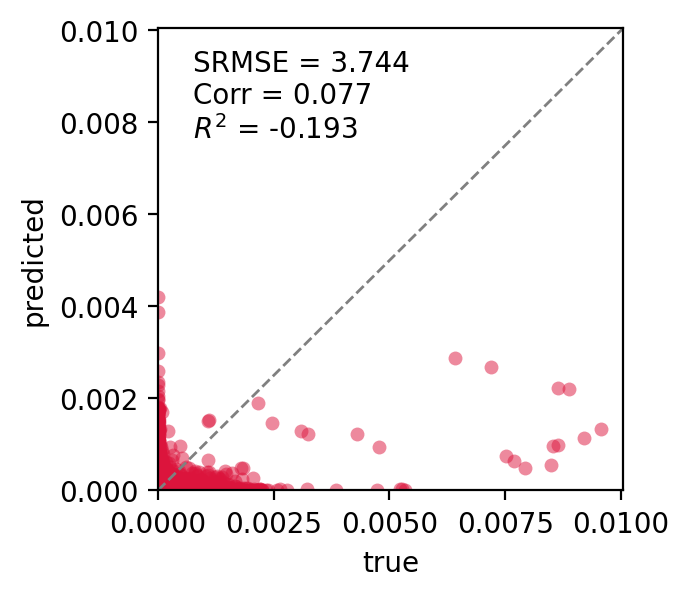

In [ ]:
validationGAN.validate_Gan_Cat_numbin(datGan_6, test6, train, numerical)

In [156]:
datGan_8 = pd.read_csv('DatGan_synthetic_8.csv', sep=',', dtype=df_dtypes)
test8 = test[datGan_8.columns]

In [157]:
stats = validationGAN.validateModel(test8, datGan_8, numerical)
stats.mean()

HousehCarOwnership
IncFamily2000
FamNumAdults
FamNumPers
HousehNumAdults
HousehNumPers
IncRespondent2000


/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:157: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['count'] = 1
/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_df['count'] = 1
/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:157: SettingWithCopyWarning: 
A value is tr

WorkHoursPw
HousehNumcars
Year
Gender
RespAgeCorrect


/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_df['count'] = 1
/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:157: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['count'] = 1
/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:161: SettingWithCopyWarning: 
A value is tr

Education
Handicap
PopSocio
RespPrimOcc
KidsBetween0and15
KidsBetween0and4


/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_df['count'] = 1
/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:157: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['count'] = 1
/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:161: SettingWithCopyWarning: 
A value is tr

CarModelYear
MunicipalityOrigin
MunicipalityDest
HomeAdrZone
PrimOccZone
WorkHourType


/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:157: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['count'] = 1
/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_df['count'] = 1
/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:157: SettingWithCopyWarning: 
A value is tr

RespHasBicycle
ResphasDrivlic
RespHasRejsekort


/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_df['count'] = 1
/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:157: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['count'] = 1
/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:161: SettingWithCopyWarning: 
A value is tr

RespIsmemCarshare
Sector
HwDayspW
FuelType
HomeParkPoss
RespHasSeasonticket


/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_df['count'] = 1
/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:157: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['count'] = 1
/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:161: SettingWithCopyWarning: 
A value is tr

HousehAccomodation
HousehAccOwnorRent
PosInFamily
PrimModeDay
ModeChainTypeDay


/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:157: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['count'] = 1
/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_df['count'] = 1


mae      0.032640
rmse     0.044005
r2      -0.798945
srmse    4.306654
corr     0.819551
dtype: float64

In [158]:
print(stats.loc[~stats.index.isin(['IncRespondent2000','IncFamily2000'])].to_latex())

\begin{tabular}{lrrrrr}
\toprule
 & mae & rmse & r2 & srmse & corr \\
col &  &  &  &  &  \\
\midrule
HousehCarOwnership & 0.002810 & 0.005838 & 0.998499 & 0.081727 & 0.999273 \\
FamNumAdults & 0.002620 & 0.004792 & 0.999342 & 0.047923 & 0.999776 \\
FamNumPers & 0.001705 & 0.002663 & 0.999408 & 0.034614 & 0.999733 \\
HousehNumAdults & 0.001798 & 0.003374 & 0.999654 & 0.037109 & 0.999838 \\
HousehNumPers & 0.001340 & 0.002252 & 0.999524 & 0.036024 & 0.999776 \\
WorkHoursPw & 0.000057 & 0.003189 & -0.000191 & 111.840292 & -0.014414 \\
HousehNumcars & 0.002043 & 0.004604 & 0.998903 & 0.073671 & 0.999506 \\
Year & 0.001182 & 0.001360 & 0.997797 & 0.017676 & 0.998907 \\
Gender & 0.006542 & 0.006542 & 0.700759 & 0.013084 & 1.000000 \\
RespAgeCorrect & 0.013351 & 0.030883 & -30.835646 & 2.903005 & 0.071223 \\
Education & 0.052978 & 0.080765 & 0.505395 & 0.646121 & 0.788513 \\
Handicap & 0.002191 & 0.002191 & 0.999974 & 0.004382 & 1.000000 \\
PopSocio & 0.127869 & 0.153844 & -0.007391 & 0.61537

In [ ]:
stats.loc[~stats.index.isin(['HomeAdrZone', 'PrimOccZone','IncRespondent2000','IncFamily2000', 'RespAgeCorrect'])].mean()

mae      0.032088
rmse     0.042672
r2       0.598950
srmse    3.738449
corr     0.938084
dtype: float64

In [ ]:
stats

mae      rmse         r2       srmse      corr
col                                                                     
HousehCarOwnership   0.002810  0.005838   0.998499    0.081727  0.999273
IncFamily2000        0.044022  0.054213  -3.221016    1.030049 -0.984885
FamNumAdults         0.002620  0.004792   0.999342    0.047923  0.999776
FamNumPers           0.001705  0.002663   0.999408    0.034614  0.999733
HousehNumAdults      0.001798  0.003374   0.999654    0.037109  0.999838
HousehNumPers        0.001340  0.002252   0.999524    0.036024  0.999776
IncRespondent2000    0.123777  0.172768 -15.640340    2.245988 -0.735968
WorkHoursPw          0.000057  0.003189  -0.000191  111.840292 -0.014414
HousehNumcars        0.002043  0.004604   0.998903    0.073671  0.999506
Year                 0.001182  0.001360   0.997797    0.017676  0.998907
Gender               0.006542  0.006542   0.700759    0.013084  1.000000
RespAgeCorrect       0.013351  0.030883 -30.835646    2.903005  0.071223
Education            0.052978  0.080765   0.505395    0.646121  0.788513
Handicap             0.002191  0.002191   0.999974    0.004382  1.000000
PopSocio             0.127869  0.153844  -0.007391    0.615374  0.868249
RespPrimOcc          0.030285  0.066029   0.563462    1.188515  0.923352
KidsBetween0and15    0.001561  0.002231   0.999887    0.020081  0.999951
KidsBetween0and4     0.000712  0.000861   0.999995    0.003444  0.999998
CarModelYear         0.000581  0.001290   0.996767    0.095495  0.998577
MunicipalityOrigin   0.000504  0.000790   0.994409    0.078198  0.998476
MunicipalityDest     0.003808  0.012740   0.832235    1.273967  0.987302
HomeAdrZone          0.000062  0.000081   0.698678    0.553328  0.836585
PrimOccZone          0.000178  0.006094  -1.126967   33.551671  0.999212
WorkHourType         0.097542  0.136622   0.401214    0.819733  0.636986
RespHasBicycle       0.165633  0.165633   0.231434    0.331265  1.000000
ResphasDrivlic       0.107920  0.130069   0.786373    0.520274  0.990063
RespHasRejsekort     0.031737  0.053420   0.563027    0.534196  0.991331
RespIsmemCarshare    0.075805  0.075805   0.964509    0.151609  1.000000
Sector               0.009178  0.021420   0.883932    0.792558  0.965194
HwDayspW             0.065016  0.118709   0.599587    0.949673  0.909853
FuelType             0.002354  0.003966   0.999594    0.027764  0.999799
HomeParkPoss         0.001248  0.001667   0.999215    0.031667  0.999718
RespHasSeasonticket  0.106384  0.106384   0.909156    0.212768  1.000000
HousehAccomodation   0.000609  0.000690   0.999981    0.004138  0.999991
HousehAccOwnorRent   0.007908  0.009411   0.998324    0.028233  0.999627
PosInFamily          0.084105  0.088011  -5.352939    0.352042  0.996373
PrimModeDay          0.022687  0.061096   0.718212    1.466295  0.973348
ModeChainTypeDay     0.040202  0.079915   0.485319    1.038890  0.947658

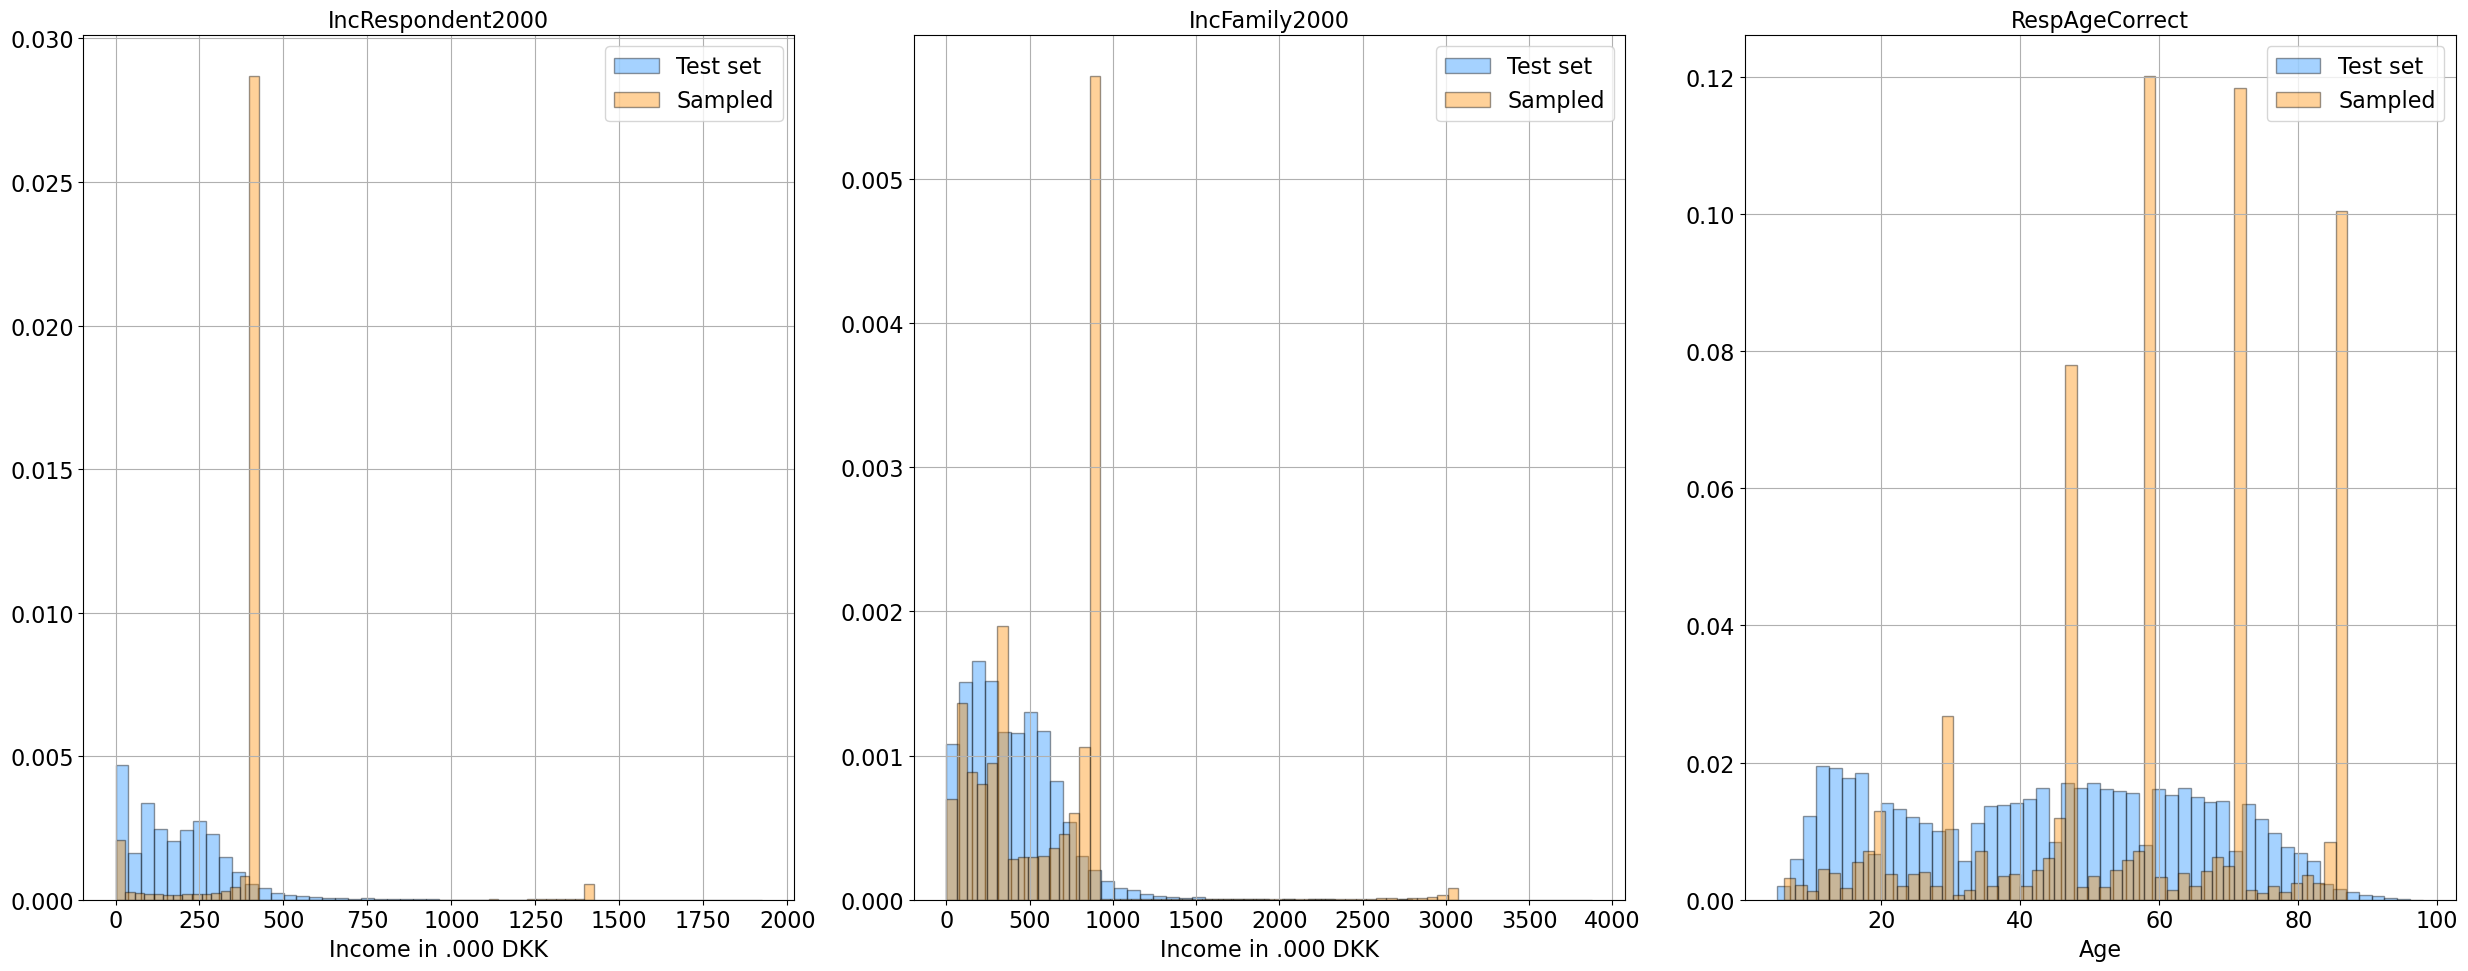

In [ ]:
plotNum(test, datGan_8, 'Results/num_datgan8.png')

Aggregated variables: 
MunicipalityOrigin
ResphasDrivlic
PopSocio
Number of combinations: 1584
corr = 0.902020
MAE = 0.000489
RMSE = 0.001409
SRMSE = 1.777206
r2 = 0.409632


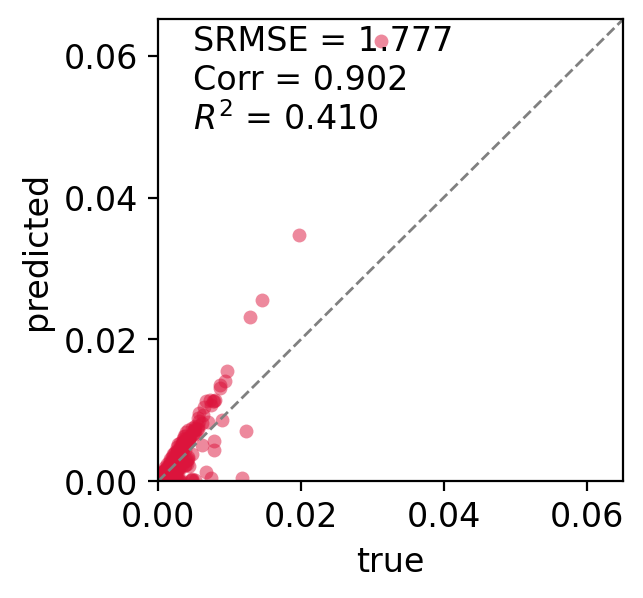

Aggregated variables: 
MunicipalityOrigin
ResphasDrivlic
PopSocio
Gender
Number of combinations: 3168
corr = 0.896161
MAE = 0.000277
RMSE = 0.000754
SRMSE = 1.702967
r2 = 0.389037


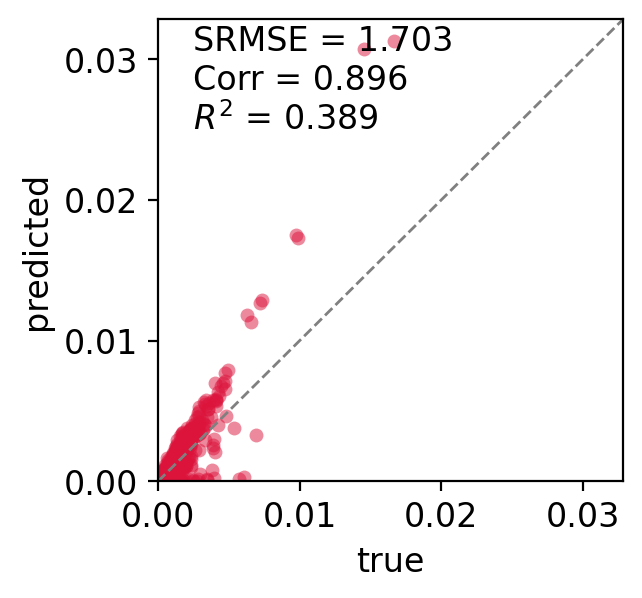

Aggregated variables: 
RespPrimOcc
Gender
Sector
Number of combinations: 1332
corr = 0.478853
MAE = 0.000987
RMSE = 0.005802
SRMSE = 4.995389
r2 = 0.175785


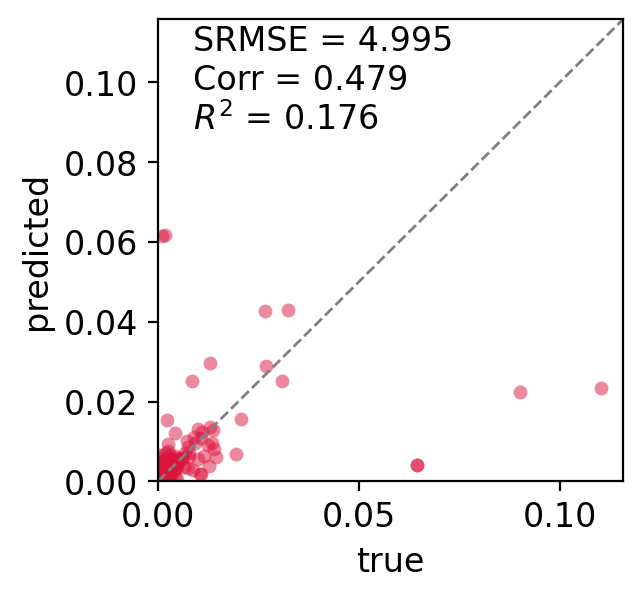

Aggregated variables: 
MunicipalityOrigin
MunicipalityDest
Number of combinations: 9900
corr = 0.518249
MAE = 0.000171
RMSE = 0.000912
SRMSE = 6.227249
r2 = 0.212631


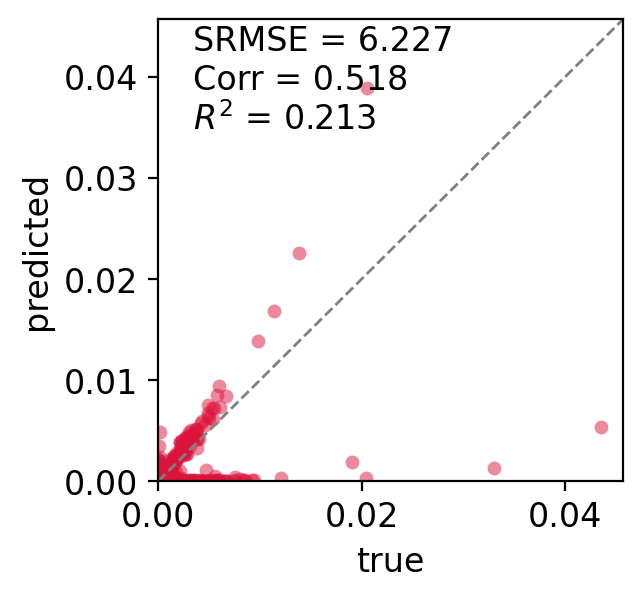

Aggregated variables: 
MunicipalityOrigin
MunicipalityDest
RespPrimOcc
Gender
Number of combinations: 356400
corr = 0.177260
MAE = 0.000086
RMSE = 0.000294
SRMSE = 5.481935
r2 = -0.250426


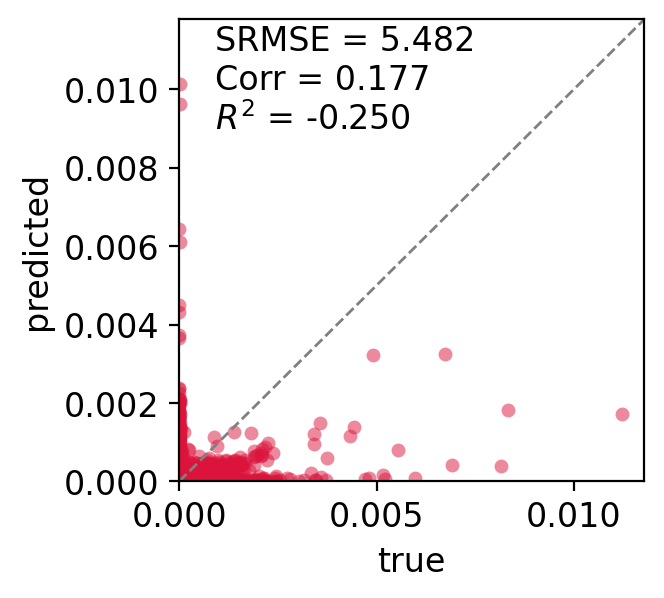

Aggregated variables: 
HomeAdrZone
Number of combinations: 6865
corr = 0.836585
MAE = 0.000062
RMSE = 0.000081
SRMSE = 0.553328
r2 = 0.698678


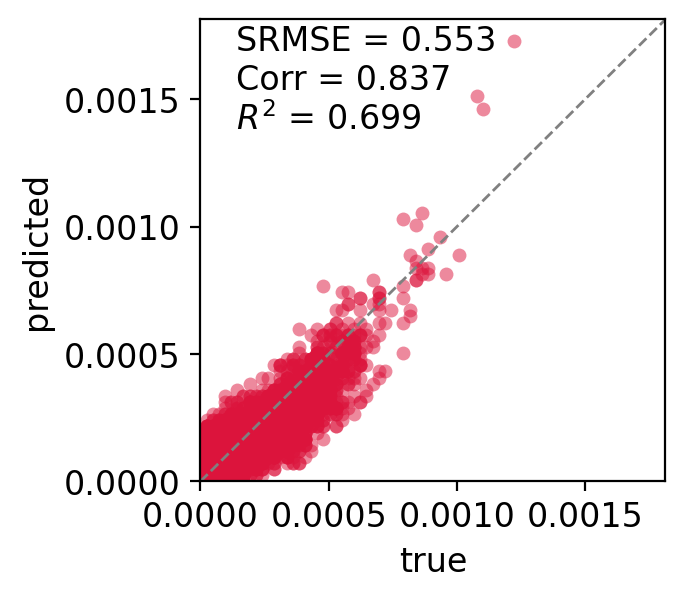

In [ ]:
validationGAN.validate_Gan_Cat(datGan_8, test8, train)

In [ ]:
validationGAN.validate_Gan_Cat_numbin(datGan_6, test6, train, numerical)

In [159]:
datGan_8v2 = pd.read_csv('DatGan_synthetic_8v2.csv', sep=',', dtype=df_dtypes)
test8v2 = test[datGan_8v2.columns]

In [160]:
stats = validationGAN.validateModel(test8v2, datGan_8v2, numerical)
stats.mean()

HousehCarOwnership
IncFamily2000
FamNumAdults
FamNumPers
HousehNumAdults
HousehNumPers
IncRespondent2000


/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:157: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['count'] = 1
/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_df['count'] = 1
/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:157: SettingWithCopyWarning: 
A value is tr

WorkHoursPw
HousehNumcars
Year
Gender
RespAgeCorrect
Education
Handicap


/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_df['count'] = 1
/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:157: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['count'] = 1
/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:161: SettingWithCopyWarning: 
A value is tr

PopSocio
RespPrimOcc
KidsBetween0and15
KidsBetween0and4
CarModelYear
MunicipalityOrigin
MunicipalityDest


/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_df['count'] = 1
/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:157: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['count'] = 1
/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:161: SettingWithCopyWarning: 
A value is tr

HomeAdrZone
PrimOccZone
WorkHourType
RespHasBicycle
ResphasDrivlic


/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:157: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['count'] = 1
/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_df['count'] = 1
/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:157: SettingWithCopyWarning: 
A value is tr

RespHasRejsekort
RespIsmemCarshare
Sector
HwDayspW
FuelType
HomeParkPoss
RespHasSeasonticket


/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:157: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['count'] = 1
/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_df['count'] = 1
/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:157: SettingWithCopyWarning: 
A value is tr

HousehAccomodation
HousehAccOwnorRent
PosInFamily
PrimModeDay
ModeChainTypeDay


/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:157: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['count'] = 1
/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_df['count'] = 1


mae      0.019701
rmse     0.026897
r2       0.419103
srmse    0.678278
corr     0.898352
dtype: float64

In [161]:
print(stats.loc[~stats.index.isin(['IncRespondent2000','IncFamily2000'])].to_latex())

\begin{tabular}{lrrrrr}
\toprule
 & mae & rmse & r2 & srmse & corr \\
col &  &  &  &  &  \\
\midrule
HousehCarOwnership & 0.003667 & 0.008458 & 0.996849 & 0.118411 & 0.998635 \\
FamNumAdults & 0.001086 & 0.001662 & 0.999921 & 0.016624 & 0.999980 \\
FamNumPers & 0.001145 & 0.001511 & 0.999809 & 0.019639 & 0.999905 \\
HousehNumAdults & 0.001165 & 0.002109 & 0.999865 & 0.023200 & 0.999968 \\
HousehNumPers & 0.000957 & 0.001619 & 0.999754 & 0.025908 & 0.999886 \\
WorkHoursPw & 0.003824 & 0.021337 & 0.882669 & 1.899026 & 0.942805 \\
HousehNumcars & 0.001277 & 0.002426 & 0.999695 & 0.038821 & 0.999848 \\
Year & 0.001931 & 0.002339 & 0.993483 & 0.030402 & 0.997314 \\
Gender & 0.001652 & 0.001652 & 0.980914 & 0.003304 & 1.000000 \\
RespAgeCorrect & 0.000745 & 0.001052 & 0.967324 & 0.104154 & 0.984267 \\
Education & 0.007446 & 0.011689 & 0.989639 & 0.093515 & 0.994811 \\
Handicap & 0.003366 & 0.003366 & 0.999939 & 0.006731 & 1.000000 \\
PopSocio & 0.023656 & 0.028742 & 0.964837 & 0.114969 & 0.9

In [ ]:
stats.loc[~stats.index.isin(['HomeAdrZone', 'PrimOccZone','IncRespondent2000','IncFamily2000', 'RespAgeCorrect'])].mean()

mae      0.018072
rmse     0.024088
r2       0.945835
srmse    0.228279
corr     0.991984
dtype: float64

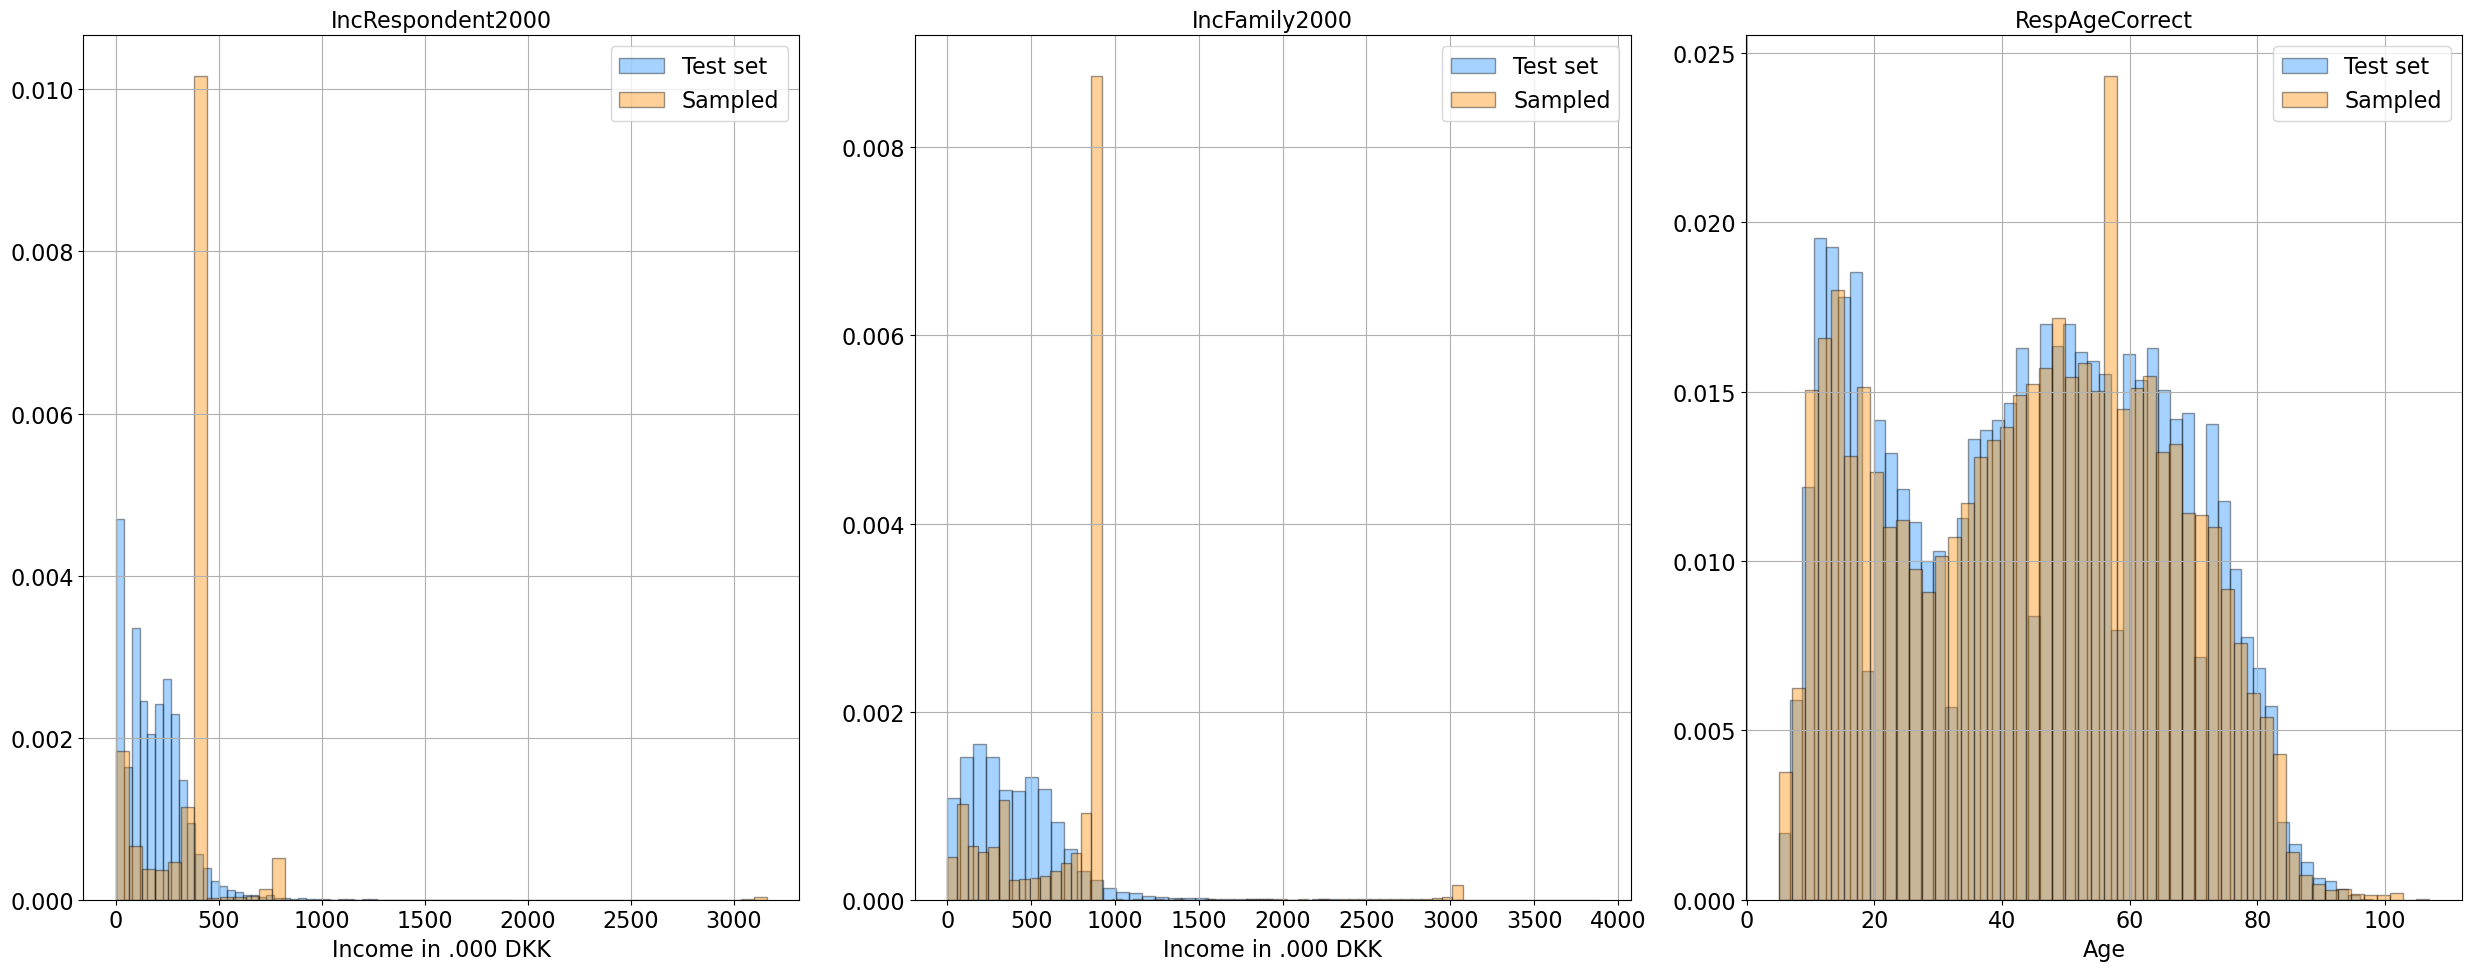

In [162]:
plotNum(test, datGan_8v2, 'Results/num_datgan82.png')

Aggregated variables: 
MunicipalityOrigin
ResphasDrivlic
PopSocio
Number of combinations: 1584
corr = 0.922047
MAE = 0.000358
RMSE = 0.000797
SRMSE = 1.053050
r2 = 0.803981


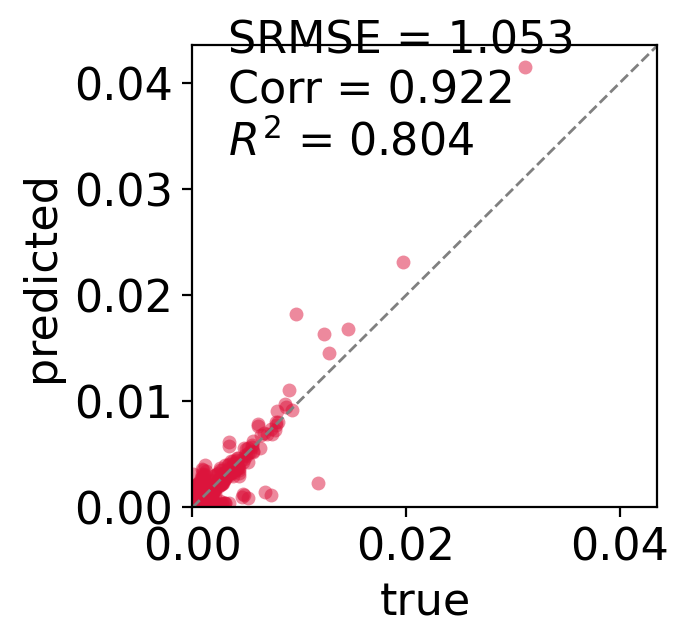

Aggregated variables: 
MunicipalityOrigin
ResphasDrivlic
PopSocio
Gender
Number of combinations: 3168
corr = 0.912938
MAE = 0.000210
RMSE = 0.000436
SRMSE = 1.053652
r2 = 0.783942


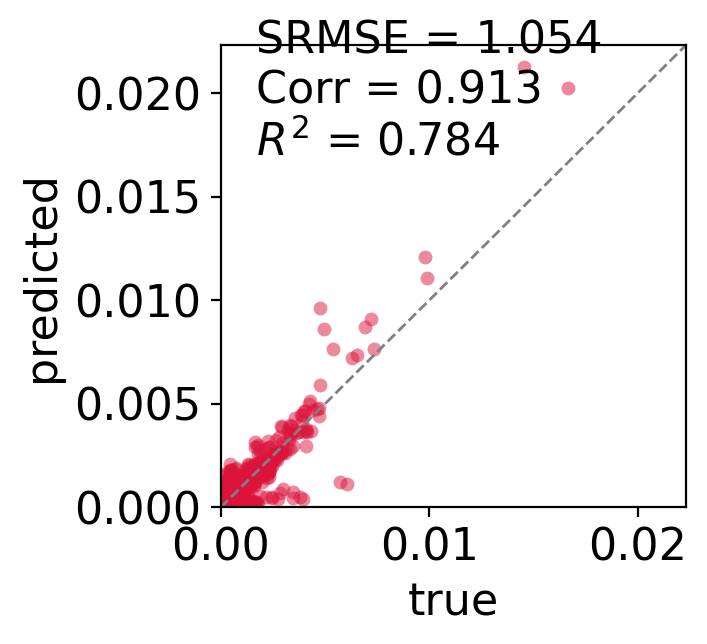

Aggregated variables: 
RespPrimOcc
Gender
Sector
Number of combinations: 1332
corr = 0.659280
MAE = 0.000960
RMSE = 0.004671
SRMSE = 4.269175
r2 = 0.434001


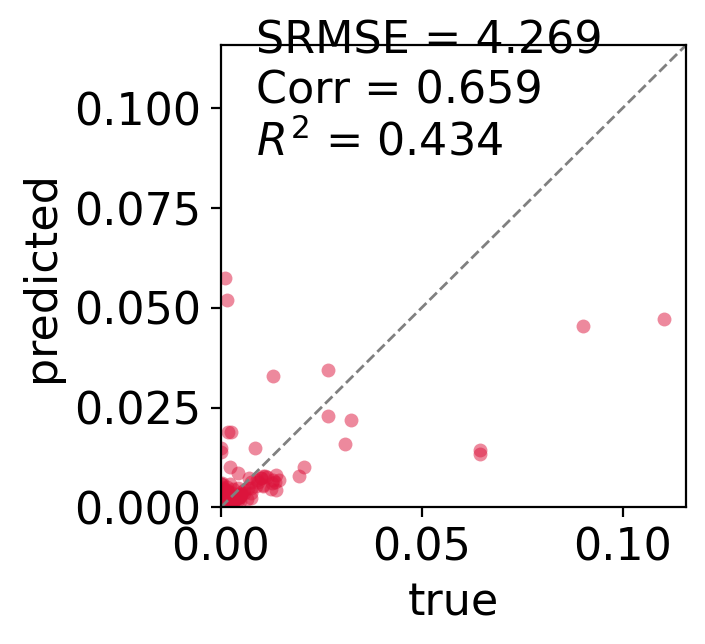

Aggregated variables: 
MunicipalityOrigin
MunicipalityDest
Number of combinations: 9900
corr = 0.556564
MAE = 0.000160
RMSE = 0.000822
SRMSE = 6.078704
r2 = 0.308840


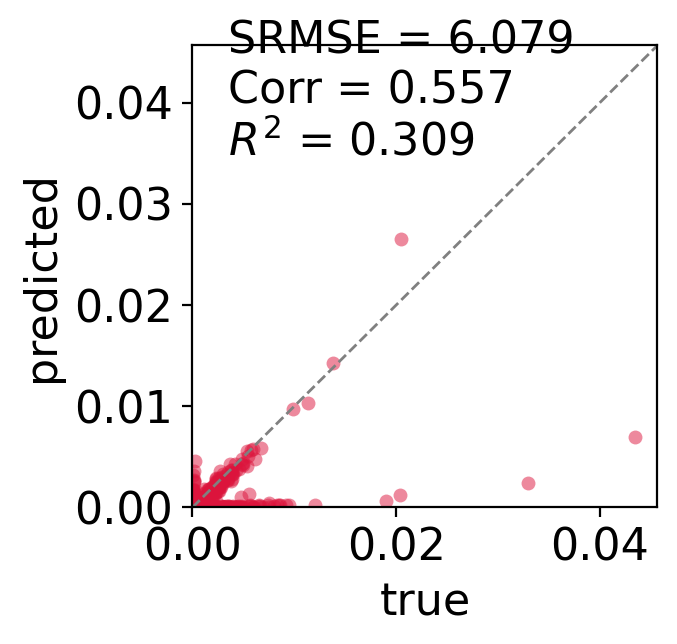

Aggregated variables: 
MunicipalityOrigin
MunicipalityDest
RespPrimOcc
Gender
Number of combinations: 356400
corr = 0.391680
MAE = 0.000064
RMSE = 0.000213
SRMSE = 5.189031
r2 = 0.152376


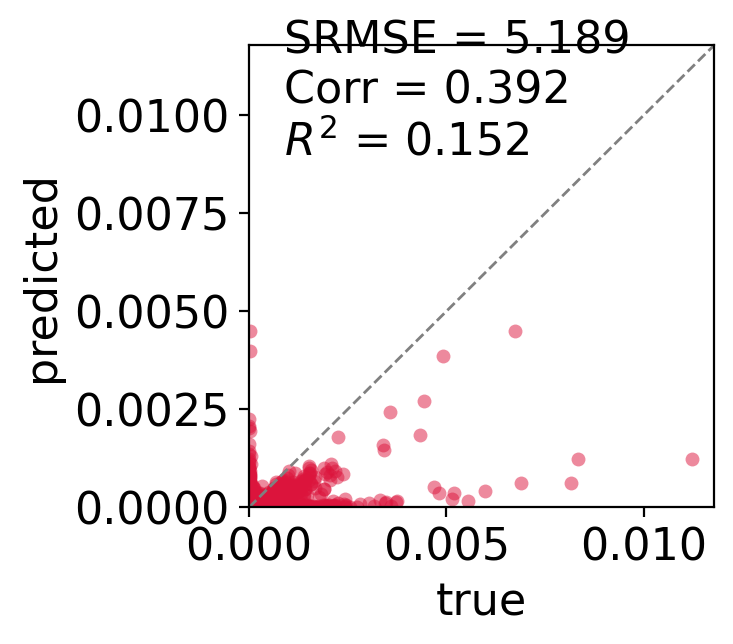

Aggregated variables: 
HomeAdrZone
Number of combinations: 6865
corr = 0.826660
MAE = 0.000064
RMSE = 0.000083
SRMSE = 0.567849
r2 = 0.683298


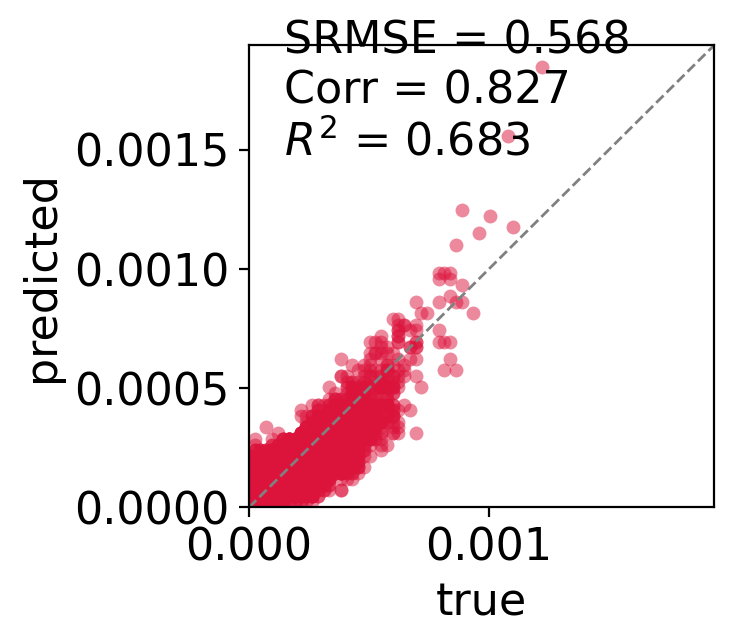

In [163]:
validationGAN.validate_Gan_Cat(datGan_8v2, test8v2, train)

In [ ]:
validationGAN.validate_Gan_Cat_numbin(datGan_8v2, test8v2, train, numerical)

In [76]:
def plotNum(df_test, df_samples, path):    
    plt.rcParams['font.size'] = '20'

    fig, axs = plt.subplots(1, 3, figsize=(25, 10), dpi=300, facecolor='w', edgecolor='k') 


    axs[0].hist(df_test['IncRespondent2000'].loc[(df_test['IncRespondent2000'] < 2000) &(df_test['IncRespondent2000'] > -1)], bins=50 ,color='dodgerblue', alpha = 0.4, edgecolor='black', density=True, label='Test set')
    axs[0].hist(df_samples['IncRespondent2000'], bins=50 ,color='darkorange', alpha = 0.4, edgecolor='black', density=True, label='Sampled')
    axs[0].set_title('IncRespondent2000', fontsize=20)
    axs[0].set_xlabel('Income in .000 DKK', fontsize=20)
    axs[0].set_ylabel('', fontsize=12)
    #axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=0, fontsize=12)
    #axs[0,2].set_yticklabels(axs[0,2].get_yticklabels(),  fontsize=12) 
    axs[0].grid(True)
    axs[0].legend()


    axs[1].hist(df_test['IncFamily2000'].loc[(df_test['IncFamily2000'] < 4000) &(df_test['IncFamily2000'] > -1)], bins=50 ,color='dodgerblue', alpha = 0.4, edgecolor='black', density=True, label='Test set')
    axs[1].hist(df_samples['IncFamily2000'], bins=50 ,color='darkorange', alpha = 0.4, edgecolor='black', density=True, label ='Sampled')
    #axs[0,3].hist(df['Gender'].sort_values(), color='dodgerblue', alpha = 0.7, edgecolor='black', rwidth=1)
    axs[1].set_title('IncFamily2000', fontsize=20)
    axs[1].set_xlabel('Income in .000 DKK', fontsize=20)
    #axs[1].set_ylabel('Count', fontsize=12)
    #axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=0, fontsize=12)
    #axs[1,1].set_yticklabels(axs[0,3].get_yticklabels(),  fontsize=12) 
    axs[1].grid(True)
    axs[1].legend()

    axs[2].hist(df_test['RespAgeCorrect'], bins=50 ,color='dodgerblue', alpha = 0.4, edgecolor='black', density=True, label='Test set')
    axs[2].hist(df_samples['RespAgeCorrect'], bins=50 ,color='darkorange', alpha = 0.4, edgecolor='black', density=True,label ='Sampled')
    #axs[2,1].bar(df['Education'].value_counts() ,color='dodgerblue', alpha = 0.6, edgecolor='black')
    axs[2].set_title('RespAgeCorrect', fontsize=20)
    axs[2].set_xlabel('Age', fontsize=20)
    #axs[2].set_ylabel('Count', fontsize=12)
    #axs[2].set_xticklabels(axs[2].get_xticklabels(), rotation=0, fontsize=12)
    #axs[1,1].set_yticklabels(axs[1,1].get_yticklabels(),  fontsize=12) 
    axs[2].grid(True)
    axs[2].legend()

    # Adjust layout to prevent overlapping
    plt.tight_layout()

    # Show the plot
    plt.show()

    fig.savefig(path)

In [ ]:
df = plotjoint(datGan_8v2, test8v2, 'Results/joint_datgan.png')

In [ ]:
plotjoint(test, WGAN_samp, 'Results/joint_Wgan.png')

In [166]:
cidatganHome = pd.read_csv('ciDatGan_synthetic_8v2_HomeAdrZone_Testset 1.csv', dtype=df_dtypes)

In [167]:
numerical = ['IncRespondent2000','IncFamily2000']

In [168]:
test = test[cidatganHome.columns]

In [169]:
cidatganHome.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41718 entries, 0 to 41717
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   HousehCarOwnership   41718 non-null  category
 1   IncFamily2000        41718 non-null  float64 
 2   FamNumAdults         41718 non-null  float64 
 3   FamNumPers           41718 non-null  float64 
 4   HousehNumAdults      41718 non-null  float64 
 5   HousehNumPers        41718 non-null  float64 
 6   IncRespondent2000    41718 non-null  float64 
 7   WorkHoursPw          41718 non-null  float64 
 8   HousehNumcars        41718 non-null  float64 
 9   Year                 41718 non-null  category
 10  Gender               41718 non-null  category
 11  RespAgeCorrect       41718 non-null  float64 
 12  Education            41718 non-null  category
 13  Handicap             41718 non-null  category
 14  PopSocio             41718 non-null  category
 15  RespPrimOcc        

In [170]:
stats = validationGAN.validateModel(test, cidatganHome, numerical)

HousehCarOwnership
IncFamily2000
FamNumAdults
FamNumPers
HousehNumAdults
HousehNumPers


/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:157: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['count'] = 1
/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_df['count'] = 1
/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:157: SettingWithCopyWarning: 
A value is tr

IncRespondent2000
WorkHoursPw
HousehNumcars
Year
Gender
RespAgeCorrect
Education


/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:157: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['count'] = 1
/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_df['count'] = 1
/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:157: SettingWithCopyWarning: 
A value is tr

Handicap
PopSocio
RespPrimOcc
KidsBetween0and15
KidsBetween0and4
CarModelYear


/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:157: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['count'] = 1
/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_df['count'] = 1
/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:157: SettingWithCopyWarning: 
A value is tr

MunicipalityOrigin
MunicipalityDest
HomeAdrZone
PrimOccZone
WorkHourType
RespHasBicycle


/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_df['count'] = 1
/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:157: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['count'] = 1
/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:161: SettingWithCopyWarning: 
A value is tr

ResphasDrivlic
RespHasRejsekort
RespIsmemCarshare
Sector
HwDayspW
FuelType


/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_df['count'] = 1
/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:157: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['count'] = 1
/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:161: SettingWithCopyWarning: 
A value is tr

HomeParkPoss
RespHasSeasonticket
HousehAccomodation
HousehAccOwnorRent
PosInFamily
PrimModeDay
ModeChainTypeDay


/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_df['count'] = 1
/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:157: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['count'] = 1
/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:161: SettingWithCopyWarning: 
A value is tr

In [171]:
print(stats.loc[~stats.index.isin(['IncRespondent2000','IncFamily2000'])].to_latex())

\begin{tabular}{lrrrrr}
\toprule
 & mae & rmse & r2 & srmse & corr \\
col &  &  &  &  &  \\
\midrule
HousehCarOwnership & 0.003082 & 0.007191 & 0.997722 & 0.100671 & 0.998865 \\
FamNumAdults & 0.001870 & 0.003088 & 0.999727 & 0.030882 & 0.999910 \\
FamNumPers & 0.002012 & 0.003348 & 0.999063 & 0.043524 & 0.999589 \\
HousehNumAdults & 0.000989 & 0.001649 & 0.999917 & 0.018136 & 0.999970 \\
HousehNumPers & 0.001278 & 0.002544 & 0.999392 & 0.040702 & 0.999712 \\
WorkHoursPw & 0.004442 & 0.025040 & 0.838419 & 2.228536 & 0.917667 \\
HousehNumcars & 0.001193 & 0.002136 & 0.999764 & 0.034181 & 0.999931 \\
Year & 0.000854 & 0.001133 & 0.998471 & 0.014726 & 0.999331 \\
Gender & 0.002039 & 0.002039 & 0.970927 & 0.004078 & 1.000000 \\
RespAgeCorrect & 0.001067 & 0.001463 & 0.936793 & 0.144859 & 0.970090 \\
Education & 0.014260 & 0.021376 & 0.965353 & 0.171007 & 0.982580 \\
Handicap & 0.002172 & 0.002172 & 0.999975 & 0.004343 & 1.000000 \\
PopSocio & 0.037309 & 0.044960 & 0.913963 & 0.179839 & 0.9

In [33]:
stats.loc[~stats.index.isin(['HomeAdrZone', 'PrimOccZone','IncRespondent2000','IncFamily2000', 'RespAgeCorrect'])].mean()

mae      0.016497
rmse     0.022474
r2       0.942976
srmse    0.243141
corr     0.989986
dtype: float64

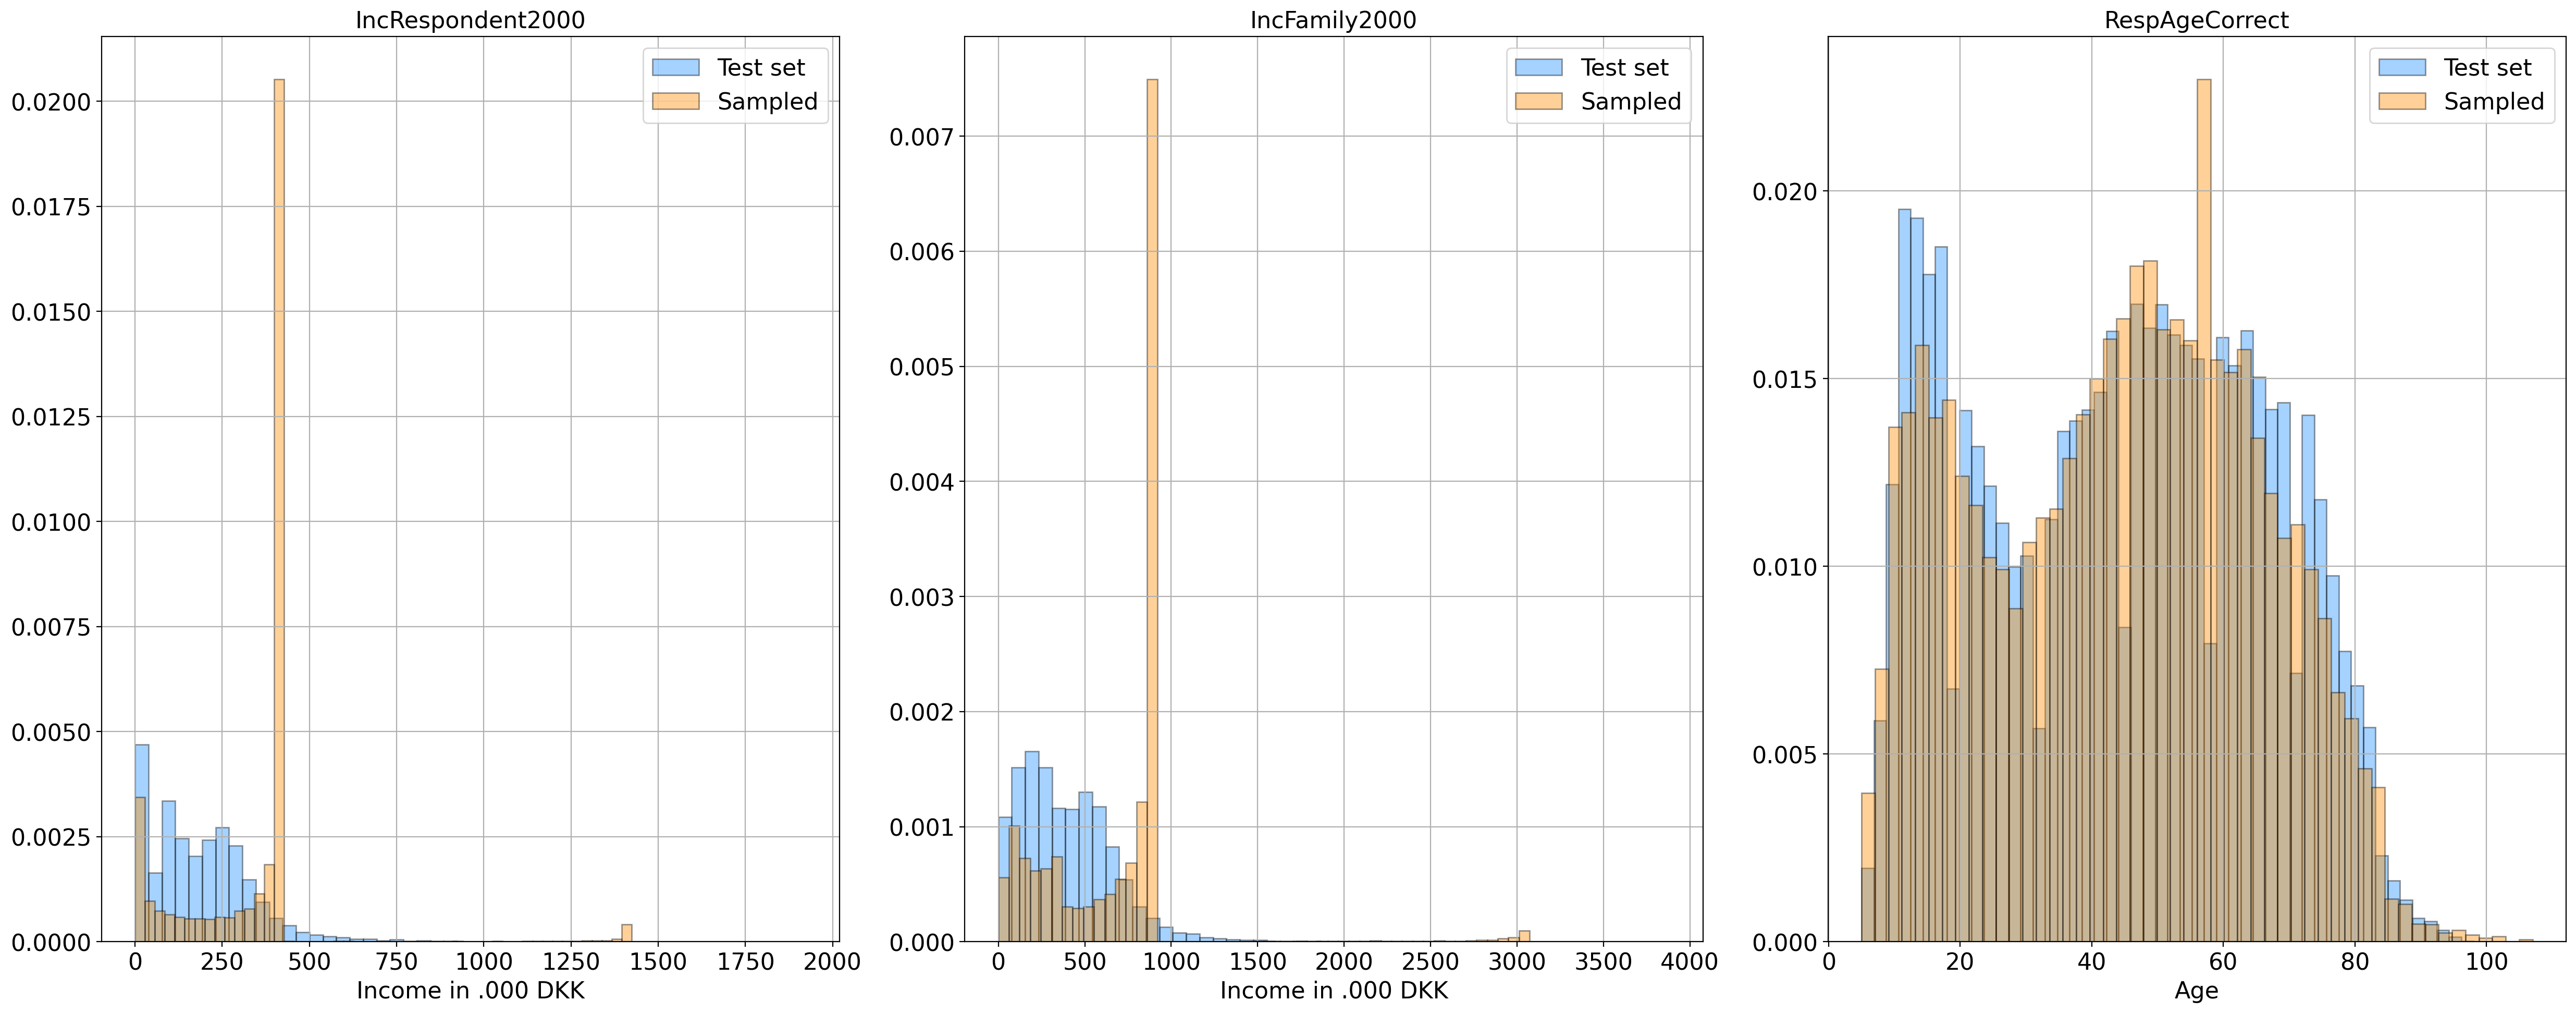

In [41]:
plotNum(test, cidatganHome, 'Results/num_cidatganHome.png')

In [ ]:
plotjoint(test, cidatganHome, 'Results/cidatgan_joint_home.png')

Aggregated variables: 
HomeAdrZone
Number of combinations: 6325


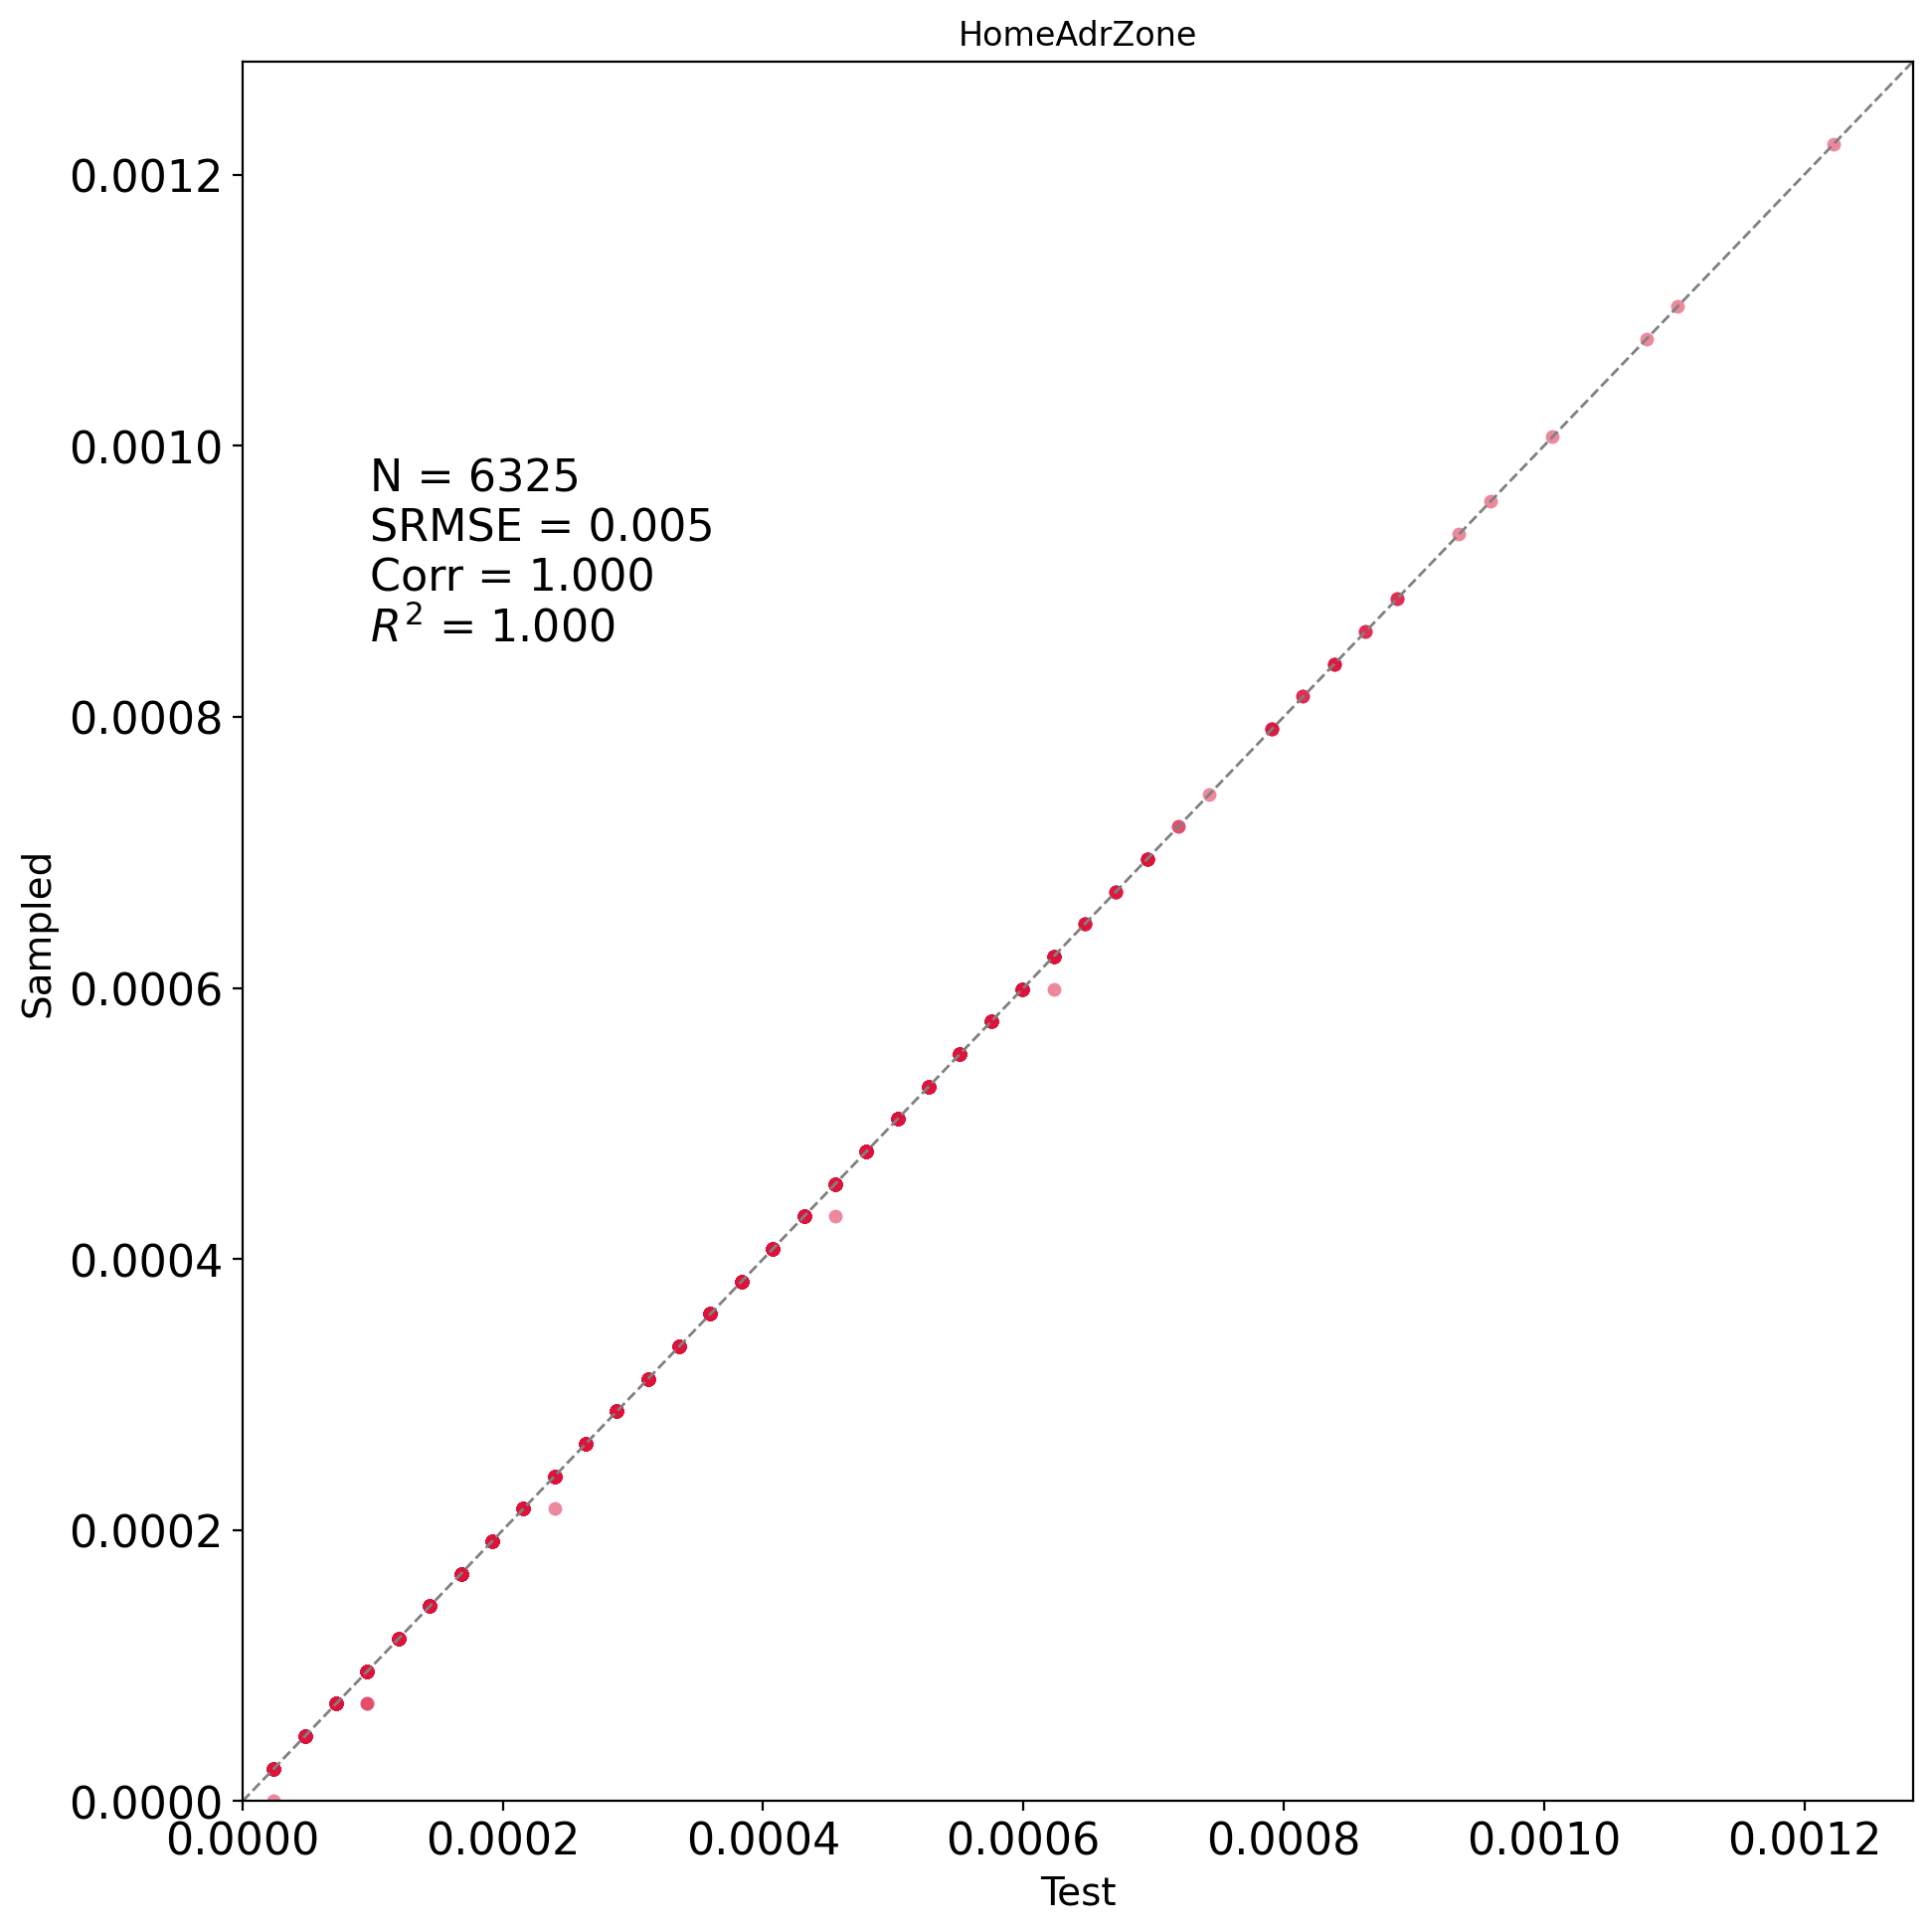

In [88]:
test_df = test.copy()
sampled_df = cidatganHome.copy()
fig, axs = plt.subplots(1, 1, figsize=(10, 10), dpi=200, facecolor='w', edgecolor='k') 

categorical = ['HomeAdrZone']
df, stat = validationGAN.evaluate2(test_df, sampled_df, categorical, test_df)
Y_test = df['count_real']
Y_pred = df['count_sampled']

min_Y = min([min(Y_test),min(Y_pred)])
max_Y = max([max(Y_test),max(Y_pred)])
w = max_Y - min_Y
max_Y += w * 0.05

N=1


for var in categorical:
    N *= test_df[var].nunique() 


text = ['N = ' + str(N),
    'SRMSE = {:.3f}'.format(stat['srmse']),
		    'Corr = {:.3f}'.format(stat['corr']),
		    '$R^2$ = {:.3f}'.format(stat['r2'])]
text = '\n'.join(text)

axs.plot(Y_test, Y_pred, '.', alpha=0.5, ms=10, color='crimson', markeredgewidth=0)
axs.plot([min_Y, max_Y], [min_Y, max_Y], ls='--', color='gray', linewidth=1.0)
axs.text(w * 0.08, w * 0.7, text)
axs.set_title('HomeAdrZone', fontsize=12)
axs.set_xlabel('Test', fontsize=14)
axs.set_ylabel('Sampled', fontsize=14)
axs.axis([min_Y, max_Y, min_Y, max_Y])

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

fig.savefig('Results/homeadr_cidatgan_test.png')




In [172]:
cidatganHome2 = pd.read_csv('ciDatGan_synthetic_9_PopMarg_Testset 1.csv', dtype=df_dtypes)

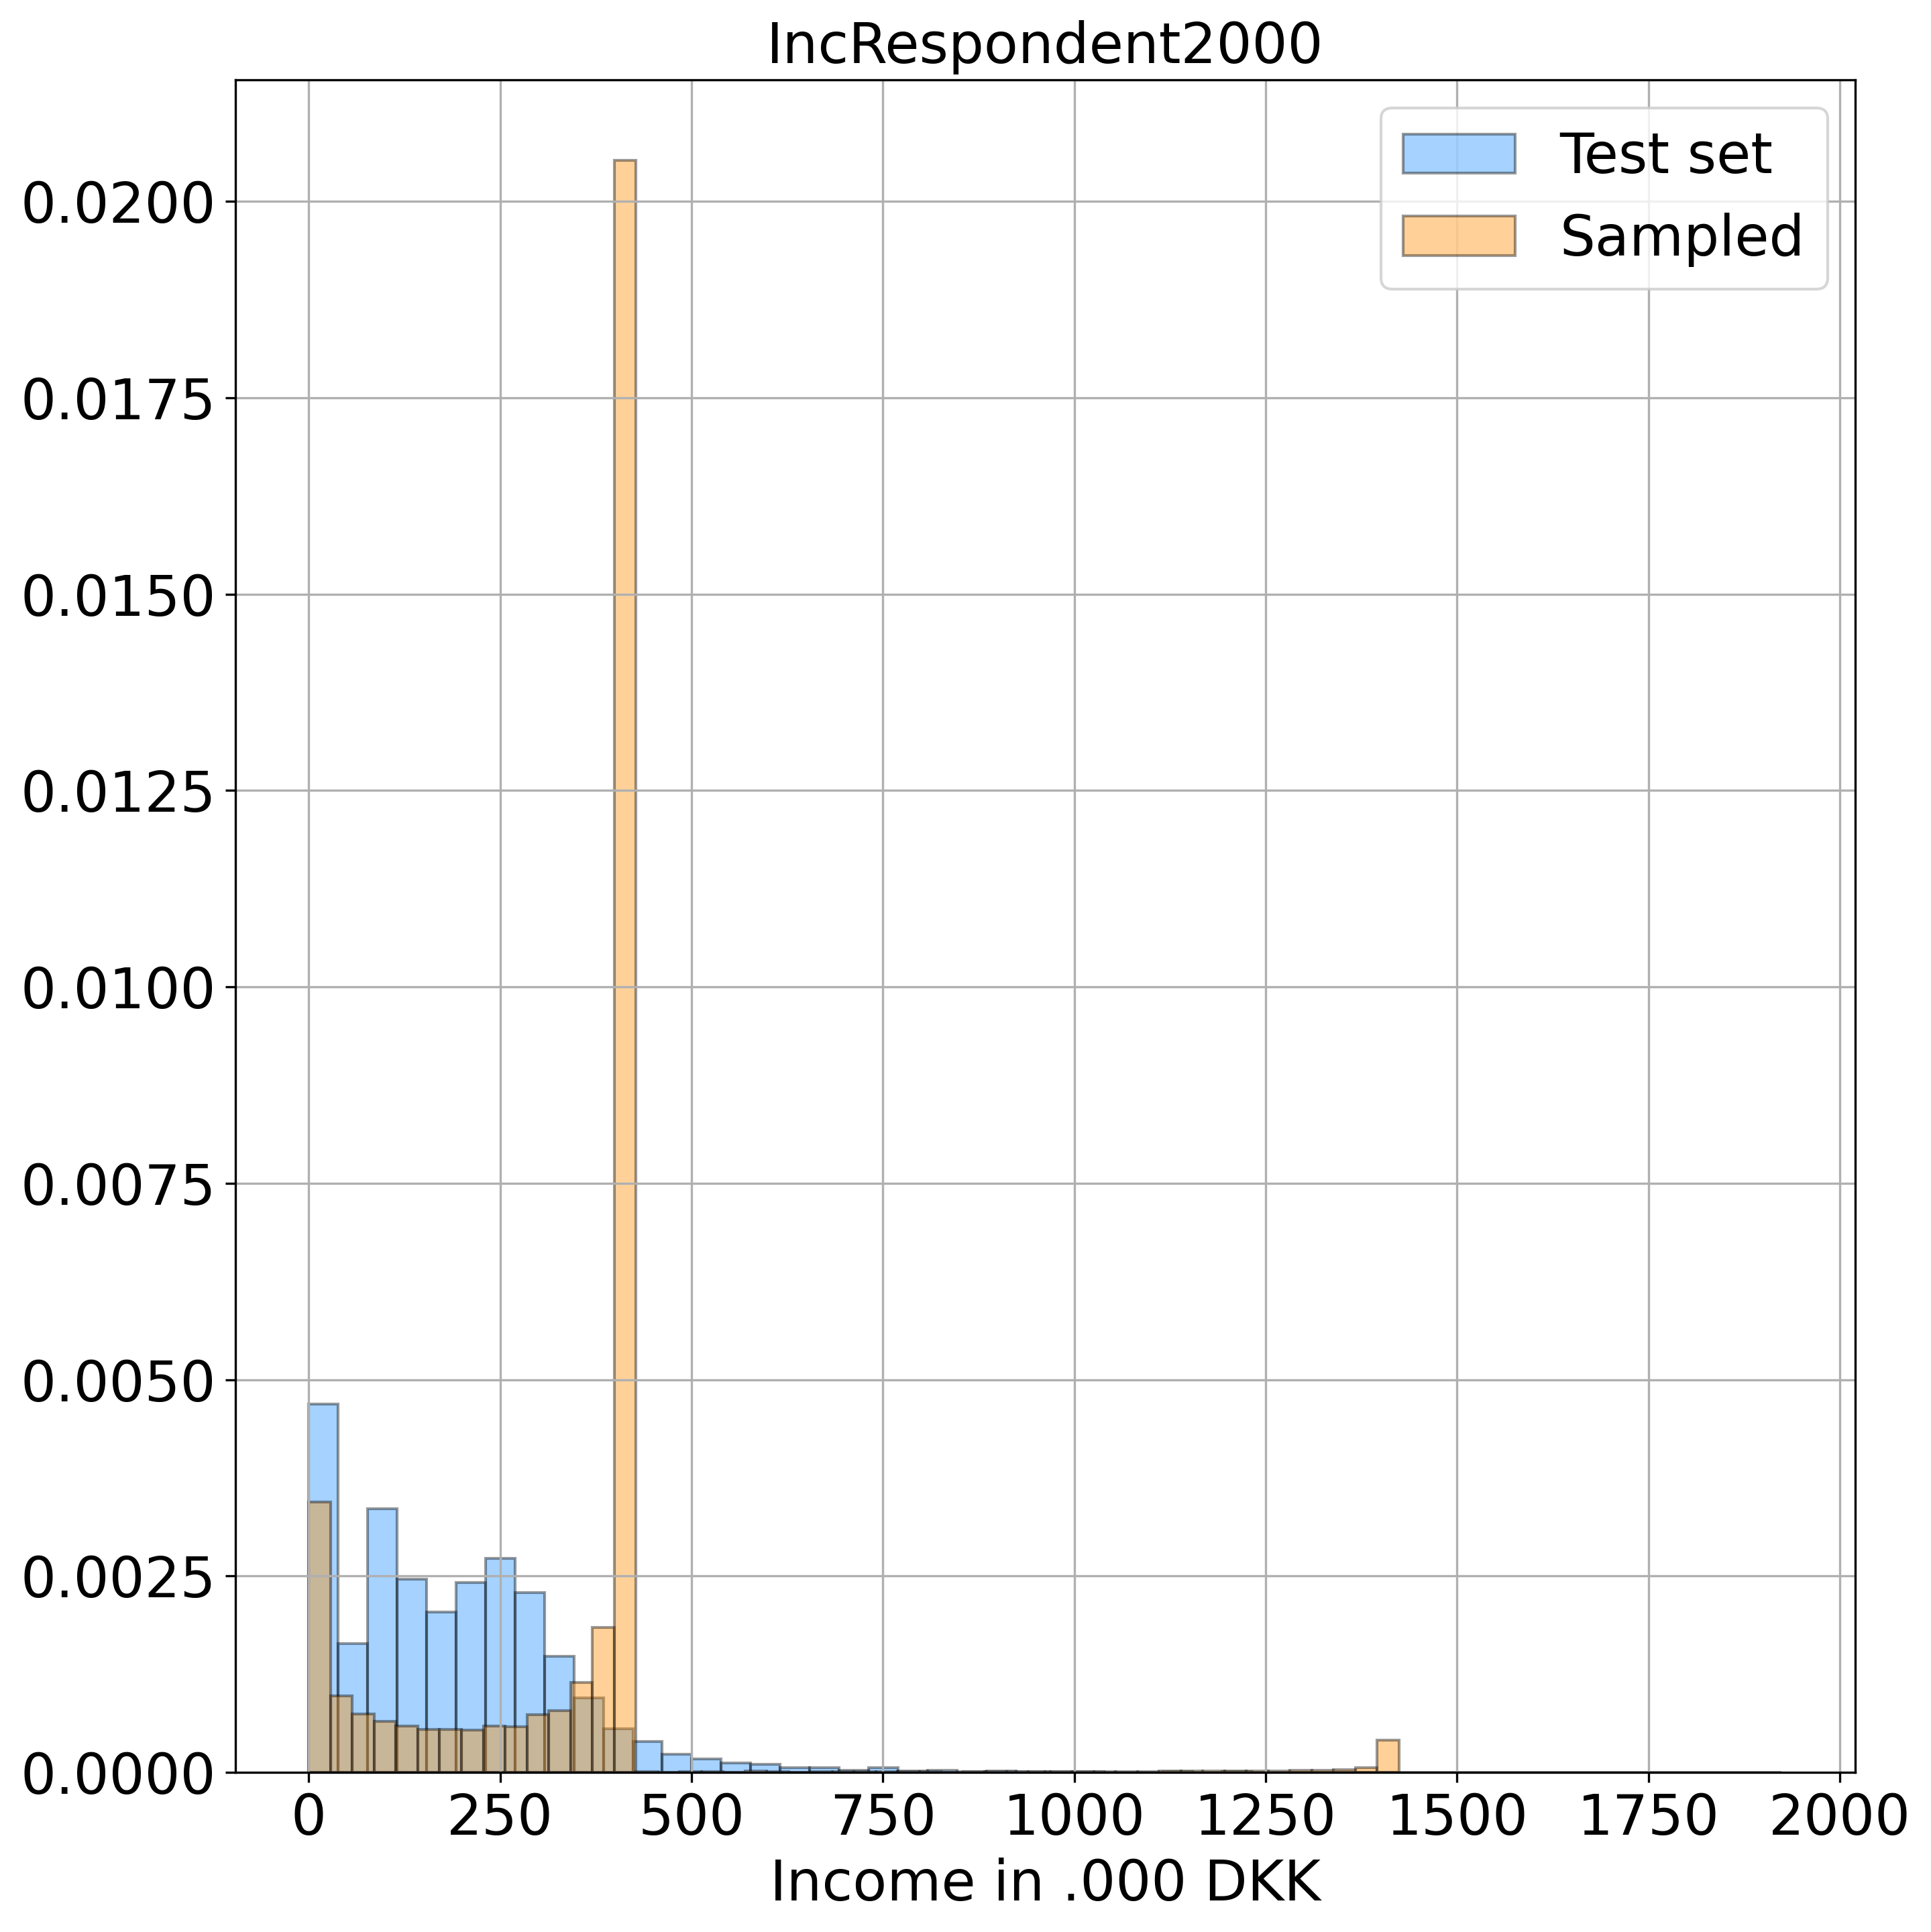

In [100]:
plt.rcParams['font.size'] = '20'

fig, axs = plt.subplots(1, 1, figsize=(10, 10), dpi=300, facecolor='w', edgecolor='k') 


axs.hist(test['IncRespondent2000'].loc[(test['IncRespondent2000'] < 2000) &(test['IncRespondent2000'] > -1)], bins=50 ,color='dodgerblue', alpha = 0.4, edgecolor='black', density=True, label='Test set')
axs.hist(cidatganHome['IncRespondent2000'], bins=50 ,color='darkorange', alpha = 0.4, edgecolor='black', density=True, label='Sampled')
axs.set_title('IncRespondent2000', fontsize=20)
axs.set_xlabel('Income in .000 DKK', fontsize=20)
axs.set_ylabel('', fontsize=12)
#axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=0, fontsize=12)
#axs[0,2].set_yticklabels(axs[0,2].get_yticklabels(),  fontsize=12) 
axs.grid(True)
axs.legend()

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

fig.savefig('Results/income_cidatganHome.png')

In [173]:
cidatganHome2.head()

HousehCarOwnership  IncFamily2000  FamNumAdults  FamNumPers  \
0                1.0          917.0           2.0         4.0   
1                1.0          874.0           2.0         2.0   
2                2.0          882.0           2.0         4.0   
3                2.0          295.0           2.0         3.0   
4                1.0          540.0           2.0         5.0   

   HousehNumAdults  HousehNumPers  IncRespondent2000  WorkHoursPw  \
0              2.0            3.0             1386.0          0.0   
1              2.0            2.0              423.0          0.0   
2              2.0            4.0                4.0          0.0   
3              2.0            3.0               99.0          0.0   
4              1.0            1.0              424.0         37.0   

   HousehNumcars  Year Gender  RespAgeCorrect Education Handicap PopSocio  \
0            1.0  2009      1            17.0       H60      2.0        0   
1            1.0  2010      2            15.0       H60      2.0        0   
2            1.0  2012      1            20.0       H60      2.0        0   
3            2.0  2016      2            10.0       H10      2.0        0   
4            1.0  2013      2            23.0       H40      2.0        1   

  RespPrimOcc  KidsBetween0and15  KidsBetween0and4 CarModelYear  \
0       107.0                  3               0.0       2005.0   
1       107.0                  0               0.0       2016.0   
2       120.0                  1               1.0       2009.0   
3       107.0                  0               0.0       2003.0   
4       221.0                  0               0.0       2000.0   

  MunicipalityOrigin MunicipalityDest HomeAdrZone PrimOccZone WorkHourType  \
0                760            530.0    461453.0    707011.0  Not working   
1                630            791.0    147151.0       161.0  Not working   
2                746            101.0    860231.0      2434.0          4.0   
3                813            575.0    461444.0    751233.0  Not working   
4                621            147.0      1068.0      1701.0  Not working   

  RespHasBicycle ResphasDrivlic RespHasRejsekort RespIsmemCarshare  \
0            1.0          -18.0              2.0               2.0   
1            2.0          -18.0              2.0               1.0   
2            1.0            1.0              6.0               2.0   
3            1.0          -18.0             40.0               1.0   
4            1.0            1.0             35.0               2.0   

                                 Sector HwDayspW FuelType HomeParkPoss  \
0                             Education      5.0      2.0          4.0   
1                             Education      4.0      1.0          4.0   
2            Wholesale and retail trade      5.0      1.0          5.0   
3                             Education      5.0      1.0          5.0   
4  Manufacture of electronic components      5.0      1.0          4.0   

  RespHasSeasonticket HousehAccomodation HousehAccOwnorRent PosInFamily  \
0                 2.0                4.0                1.0        10.0   
1                 2.0                4.0                1.0        10.0   
2                 1.0                2.0                1.0        10.0   
3                 2.0                4.0                1.0        11.0   
4                 2.0                1.0                1.0        11.0   

  PrimModeDay ModeChainTypeDay  
0        11.0             29.0  
1         1.0            133.0  
2        11.0            133.0  
3         6.0             11.0  
4        11.0             19.0

In [174]:
test = test[cidatganHome2.columns]

In [175]:
cidatganHome2 = cidatganHome2[test.columns]

In [176]:
stats = validationGAN.validateModel(test, cidatganHome2, numerical)

HousehCarOwnership
IncFamily2000
FamNumAdults
FamNumPers
HousehNumAdults
HousehNumPers
IncRespondent2000


/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:157: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['count'] = 1
/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_df['count'] = 1
/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:157: SettingWithCopyWarning: 
A value is tr

WorkHoursPw
HousehNumcars
Year
Gender
RespAgeCorrect
Education
Handicap


/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_df['count'] = 1
/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:157: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['count'] = 1
/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:161: SettingWithCopyWarning: 
A value is tr

PopSocio
RespPrimOcc
KidsBetween0and15
KidsBetween0and4
CarModelYear
MunicipalityOrigin
MunicipalityDest
HomeAdrZone


/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_df['count'] = 1
/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:157: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['count'] = 1
/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:161: SettingWithCopyWarning: 
A value is tr

PrimOccZone
WorkHourType
RespHasBicycle
ResphasDrivlic
RespHasRejsekort
RespIsmemCarshare
Sector


/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:157: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['count'] = 1
/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_df['count'] = 1
/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:157: SettingWithCopyWarning: 
A value is tr

HwDayspW
FuelType
HomeParkPoss
RespHasSeasonticket
HousehAccomodation
HousehAccOwnorRent
PosInFamily
PrimModeDay
ModeChainTypeDay


/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_df['count'] = 1
/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:157: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['count'] = 1
/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Utils/validationGAN.py:161: SettingWithCopyWarning: 
A value is tr

In [177]:
print(stats.loc[~stats.index.isin(['IncRespondent2000','IncFamily2000'])].to_latex())

\begin{tabular}{lrrrrr}
\toprule
 & mae & rmse & r2 & srmse & corr \\
col &  &  &  &  &  \\
\midrule
HousehCarOwnership & 0.003575 & 0.007654 & 0.997419 & 0.107152 & 0.998784 \\
FamNumAdults & 0.000681 & 0.001038 & 0.999969 & 0.010384 & 0.999985 \\
FamNumPers & 0.001528 & 0.002565 & 0.999450 & 0.033342 & 0.999735 \\
HousehNumAdults & 0.000763 & 0.001202 & 0.999956 & 0.013227 & 0.999991 \\
HousehNumPers & 0.001877 & 0.003579 & 0.998796 & 0.057269 & 0.999439 \\
WorkHoursPw & 0.000976 & 0.004578 & 0.994716 & 0.398314 & 0.997420 \\
HousehNumcars & 0.001157 & 0.002136 & 0.999764 & 0.034183 & 0.999927 \\
Year & 0.001292 & 0.001817 & 0.996066 & 0.023621 & 0.998575 \\
Gender & 0.000046 & 0.000046 & 0.999985 & 0.000092 & 1.000000 \\
RespAgeCorrect & 0.000003 & 0.000006 & 0.999999 & 0.000548 & 0.999999 \\
Education & 0.008547 & 0.013513 & 0.986154 & 0.108106 & 0.993061 \\
Handicap & 0.000609 & 0.000609 & 0.999998 & 0.001218 & 1.000000 \\
PopSocio & 0.000016 & 0.000019 & 1.000000 & 0.000077 & 1.0

In [53]:
stats.loc[~stats.index.isin(['HomeAdrZone', 'PrimOccZone','IncRespondent2000','IncFamily2000', 'RespAgeCorrect'])].mean()

mae      0.009244
rmse     0.011945
r2       0.980576
srmse    0.116229
corr     0.996307
dtype: float64

In [54]:
stats

mae      rmse        r2     srmse      corr
col                                                                  
HousehCarOwnership   0.003575  0.007654  0.997419  0.107152  0.998784
IncFamily2000        0.063240  0.071385 -3.528912  1.356306 -0.927849
FamNumAdults         0.000681  0.001038  0.999969  0.010384  0.999985
FamNumPers           0.001528  0.002565  0.999450  0.033342  0.999735
HousehNumAdults      0.000763  0.001202  0.999956  0.013227  0.999991
HousehNumPers        0.001877  0.003579  0.998796  0.057269  0.999439
IncRespondent2000    0.065027  0.079670 -3.712264  1.354397 -0.666936
WorkHoursPw          0.000976  0.004578  0.994716  0.398314  0.997420
HousehNumcars        0.001157  0.002136  0.999764  0.034183  0.999927
Year                 0.001292  0.001817  0.996066  0.023621  0.998575
Gender               0.000046  0.000046  0.999985  0.000092  1.000000
RespAgeCorrect       0.000003  0.000006  0.999999  0.000548  0.999999
Education            0.008547  0.013513  0.986154  0.108106  0.993061
Handicap             0.000609  0.000609  0.999998  0.001218  1.000000
PopSocio             0.000016  0.000019  1.000000  0.000077  1.000000
RespPrimOcc          0.003572  0.005610  0.996848  0.100988  0.999249
KidsBetween0and15    0.001528  0.002709  0.999833  0.024384  0.999947
KidsBetween0and4     0.000762  0.001060  0.999992  0.004241  0.999998
CarModelYear         0.001861  0.004546  0.959867  0.336433  0.979744
MunicipalityOrigin   0.000003  0.000007  1.000000  0.000666  1.000000
MunicipalityDest     0.001524  0.003180  0.989547  0.318000  0.994762
HomeAdrZone          0.000065  0.000084  0.677891  0.572925  0.823344
PrimOccZone          0.000082  0.000975  0.941570  5.763233  0.999631
WorkHourType         0.006747  0.009349  0.997196  0.056092  0.998860
RespHasBicycle       0.049023  0.049023  0.932674  0.098046  1.000000
ResphasDrivlic       0.030159  0.035331  0.984238  0.141323  0.999429
RespHasRejsekort     0.008710  0.012549  0.975886  0.125489  0.999155
RespIsmemCarshare    0.026953  0.026953  0.995513  0.053905  1.000000
Sector               0.002259  0.004552  0.994759  0.168423  0.998514
HwDayspW             0.010699  0.016645  0.992127  0.133163  0.998470
FuelType             0.007086  0.011788  0.996410  0.082517  0.998224
HomeParkPoss         0.001456  0.002165  0.998676  0.041140  0.999496
RespHasSeasonticket  0.049622  0.049622  0.980235  0.099243  1.000000
HousehAccomodation   0.004921  0.006833  0.998181  0.040999  0.999548
HousehAccOwnorRent   0.036097  0.040778  0.968541  0.122334  0.995745
PosInFamily          0.014775  0.017651  0.744456  0.070606  0.949250
PrimModeDay          0.010628  0.028601  0.938248  0.686413  0.991647
ModeChainTypeDay     0.015592  0.026474  0.943518  0.344156  0.989178

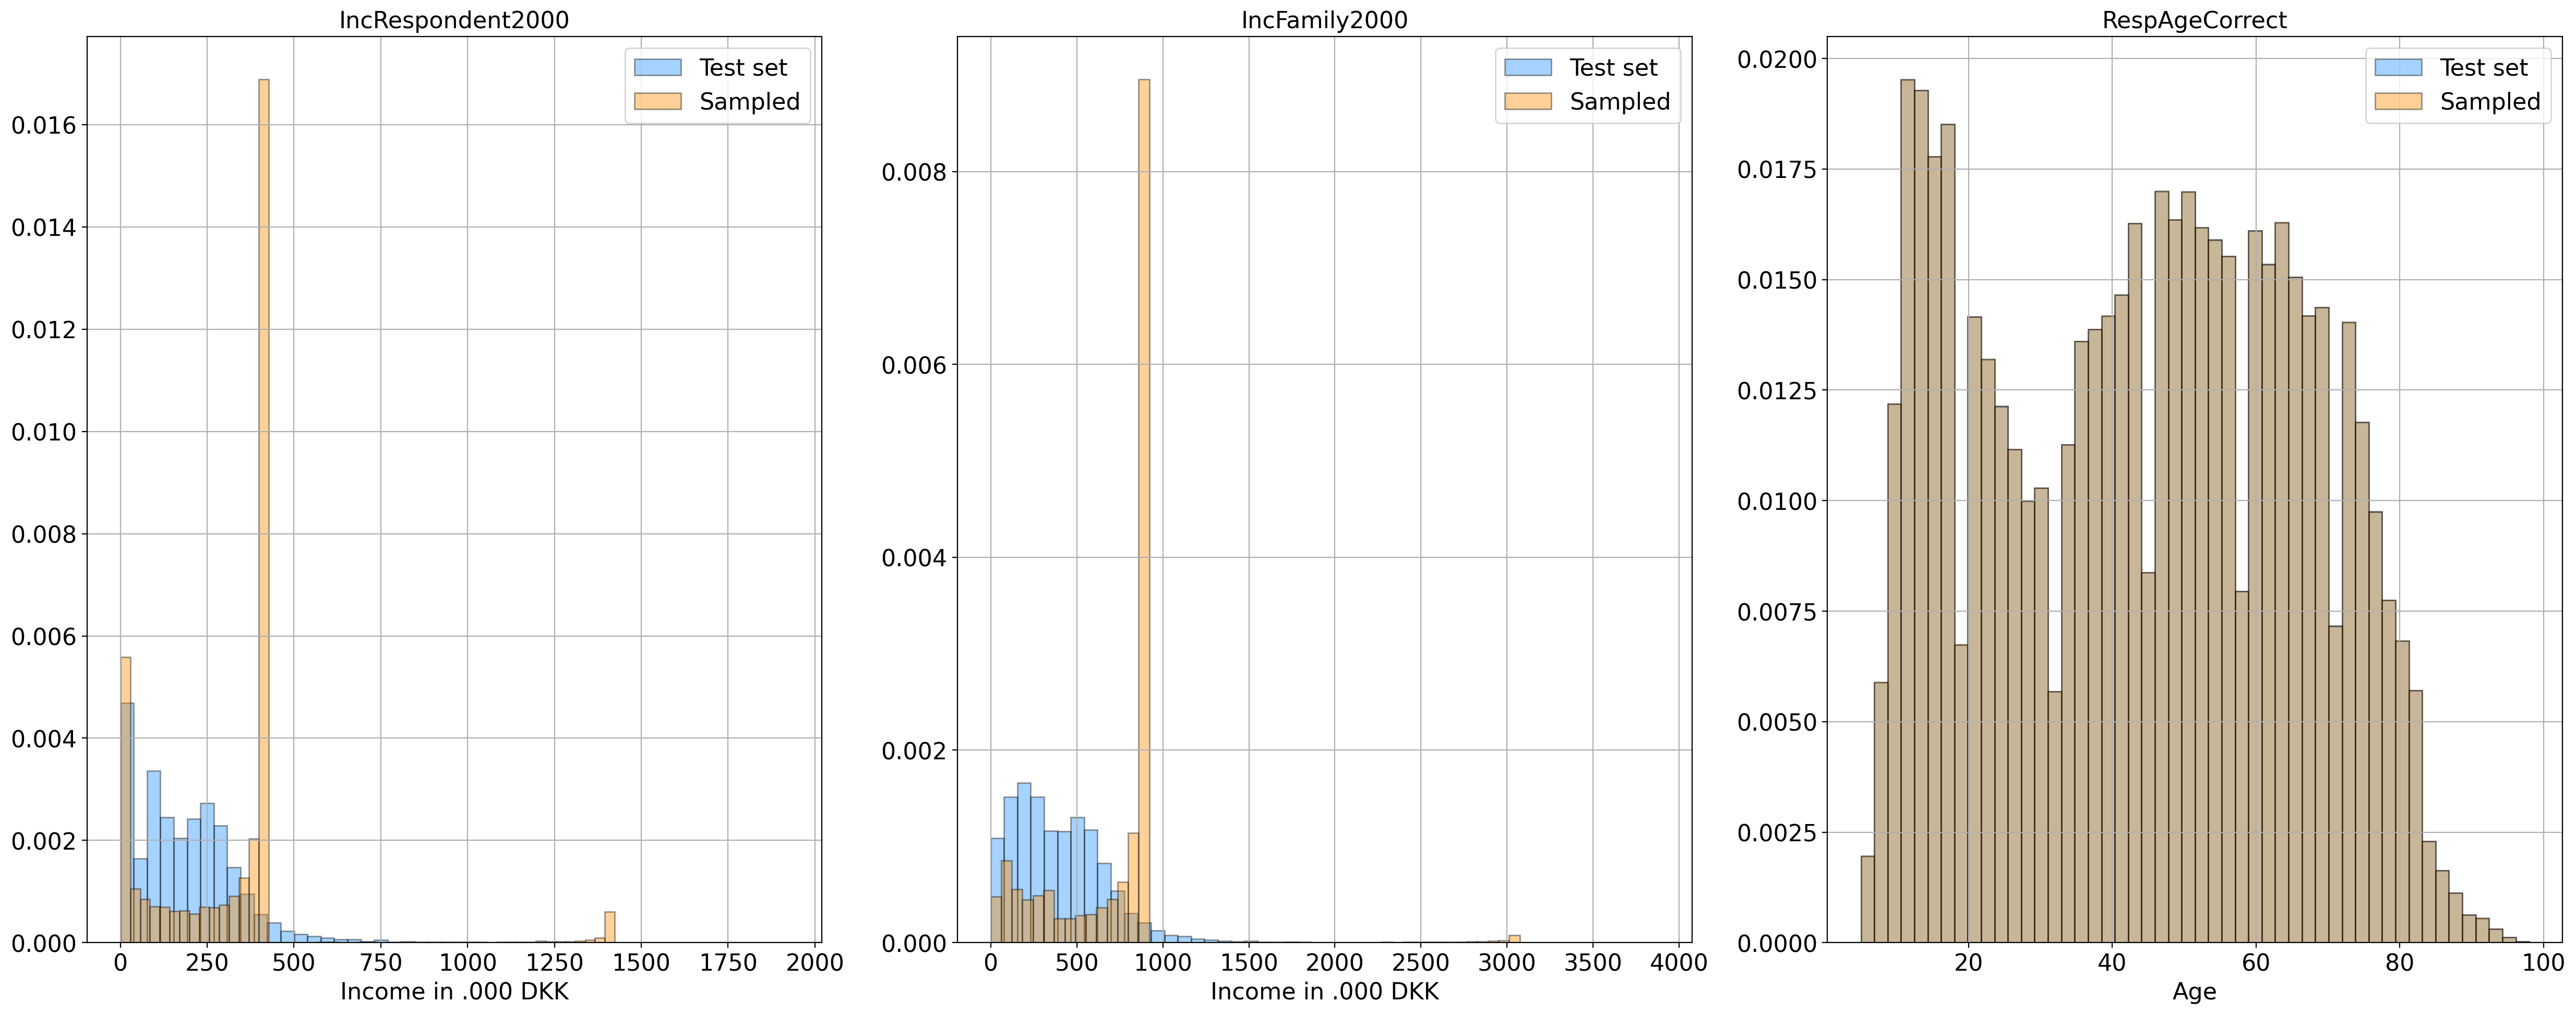

In [55]:
plotNum(test, cidatganHome2, 'Results/num_cidatganPop.png')

In [ ]:
plotjoint(test, cidatganHome2, 'Results/cidatgan_joint_pop.png')

Aggregated variables: 
MunicipalityOrigin
Gender
RespAgeCorrect
PopSocio
Number of combinations: 73696


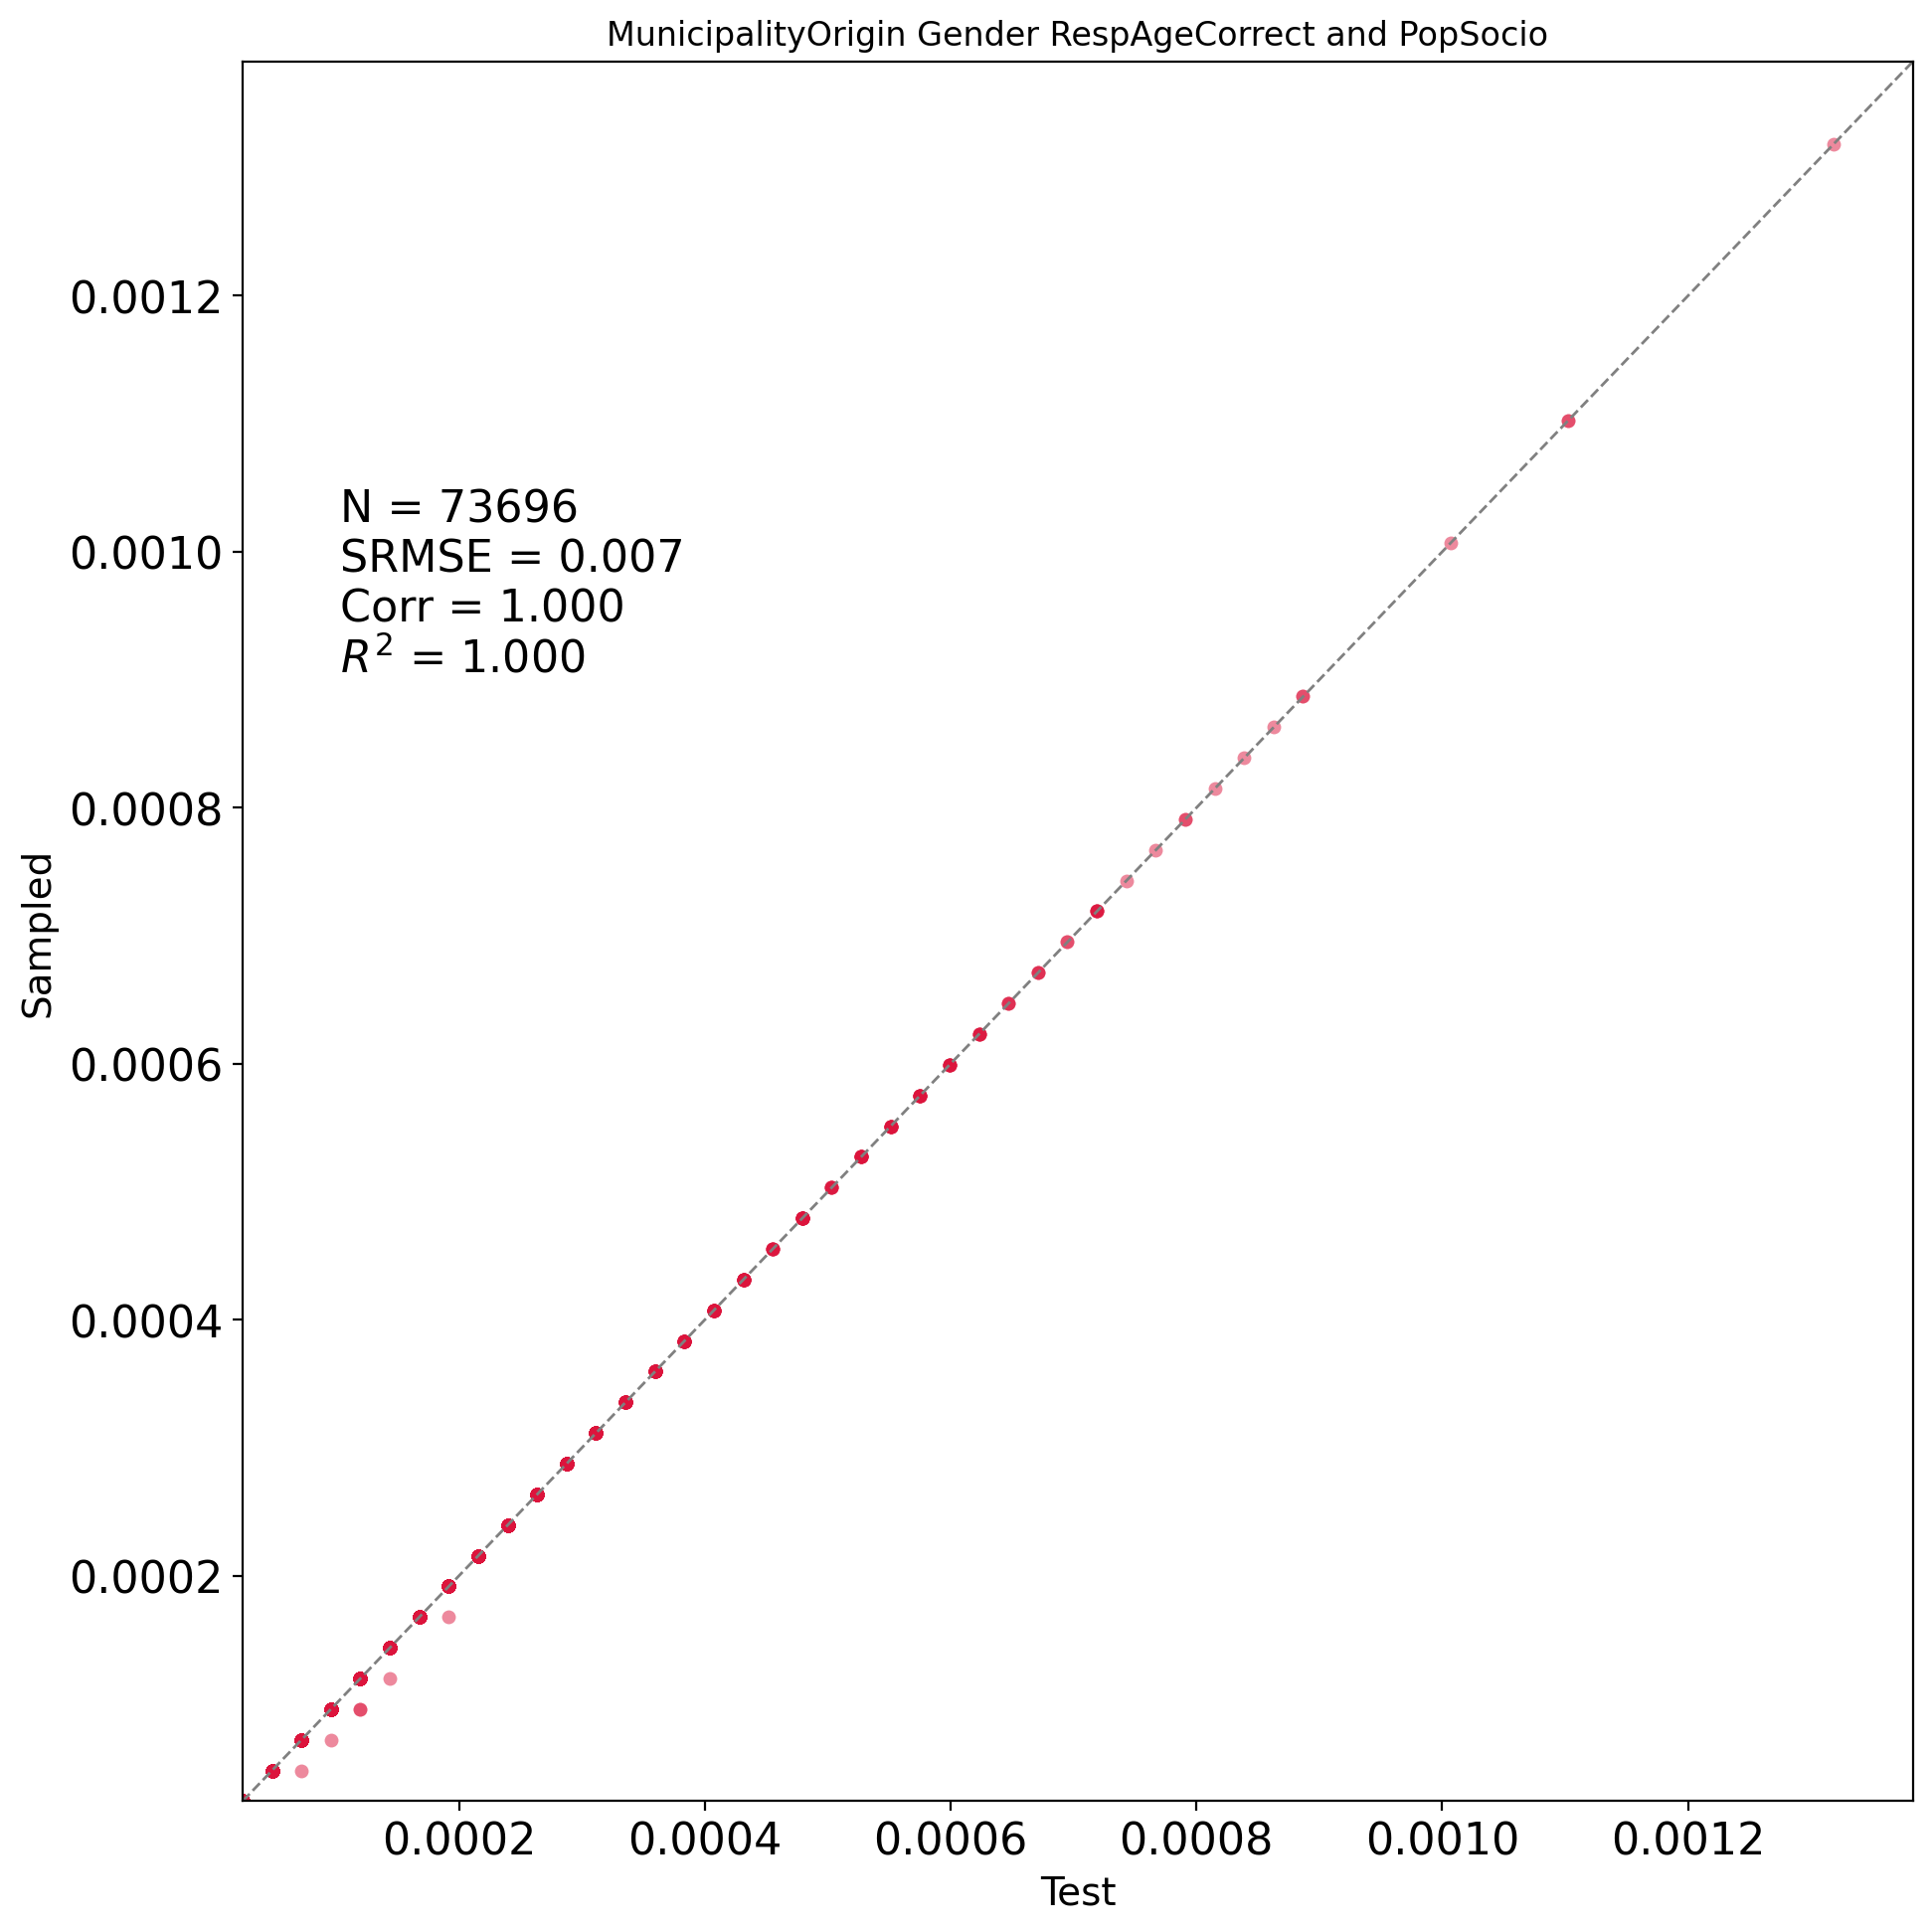

In [90]:
test_df = test.copy()
sampled_df = cidatganHome2.copy()
fig, axs = plt.subplots(1, 1, figsize=(10, 10), dpi=200, facecolor='w', edgecolor='k') 

categorical = ['MunicipalityOrigin', 'Gender','RespAgeCorrect','PopSocio']
df, stat = validationGAN.evaluate2(test_df, sampled_df, categorical, test_df)
Y_test = df['count_real']
Y_pred = df['count_sampled']

min_Y = min([min(Y_test),min(Y_pred)])
max_Y = max([max(Y_test),max(Y_pred)])
w = max_Y - min_Y
max_Y += w * 0.05

N=1


for var in categorical:
    N *= test_df[var].nunique() 


text = ['N = ' + str(N),
    'SRMSE = {:.3f}'.format(stat['srmse']),
		    'Corr = {:.3f}'.format(stat['corr']),
		    '$R^2$ = {:.3f}'.format(stat['r2'])]
text = '\n'.join(text)

axs.plot(Y_test, Y_pred, '.', alpha=0.5, ms=10, color='crimson', markeredgewidth=0)
axs.plot([min_Y, max_Y], [min_Y, max_Y], ls='--', color='gray', linewidth=1.0)
axs.text(w * 0.08, w * 0.7, text)
axs.set_title('MunicipalityOrigin Gender RespAgeCorrect and PopSocio', fontsize=12)
axs.set_xlabel('Test', fontsize=14)
axs.set_ylabel('Sampled', fontsize=14)
axs.axis([min_Y, max_Y, min_Y, max_Y])

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

fig.savefig('Results/pop_cidatgan_test.png')

Aggregated variables: 
RespPrimOcc
ResphasDrivlic
Sector
Number of combinations: 2516
Aggregated variables: 
MunicipalityDest
ResphasDrivlic
PrimModeDay
Number of combinations: 9504
Aggregated variables: 
PosInFamily
RespPrimOcc
Sector
Number of combinations: 2516
Aggregated variables: 
RespPrimOcc
Sector
Education
Number of combinations: 5032


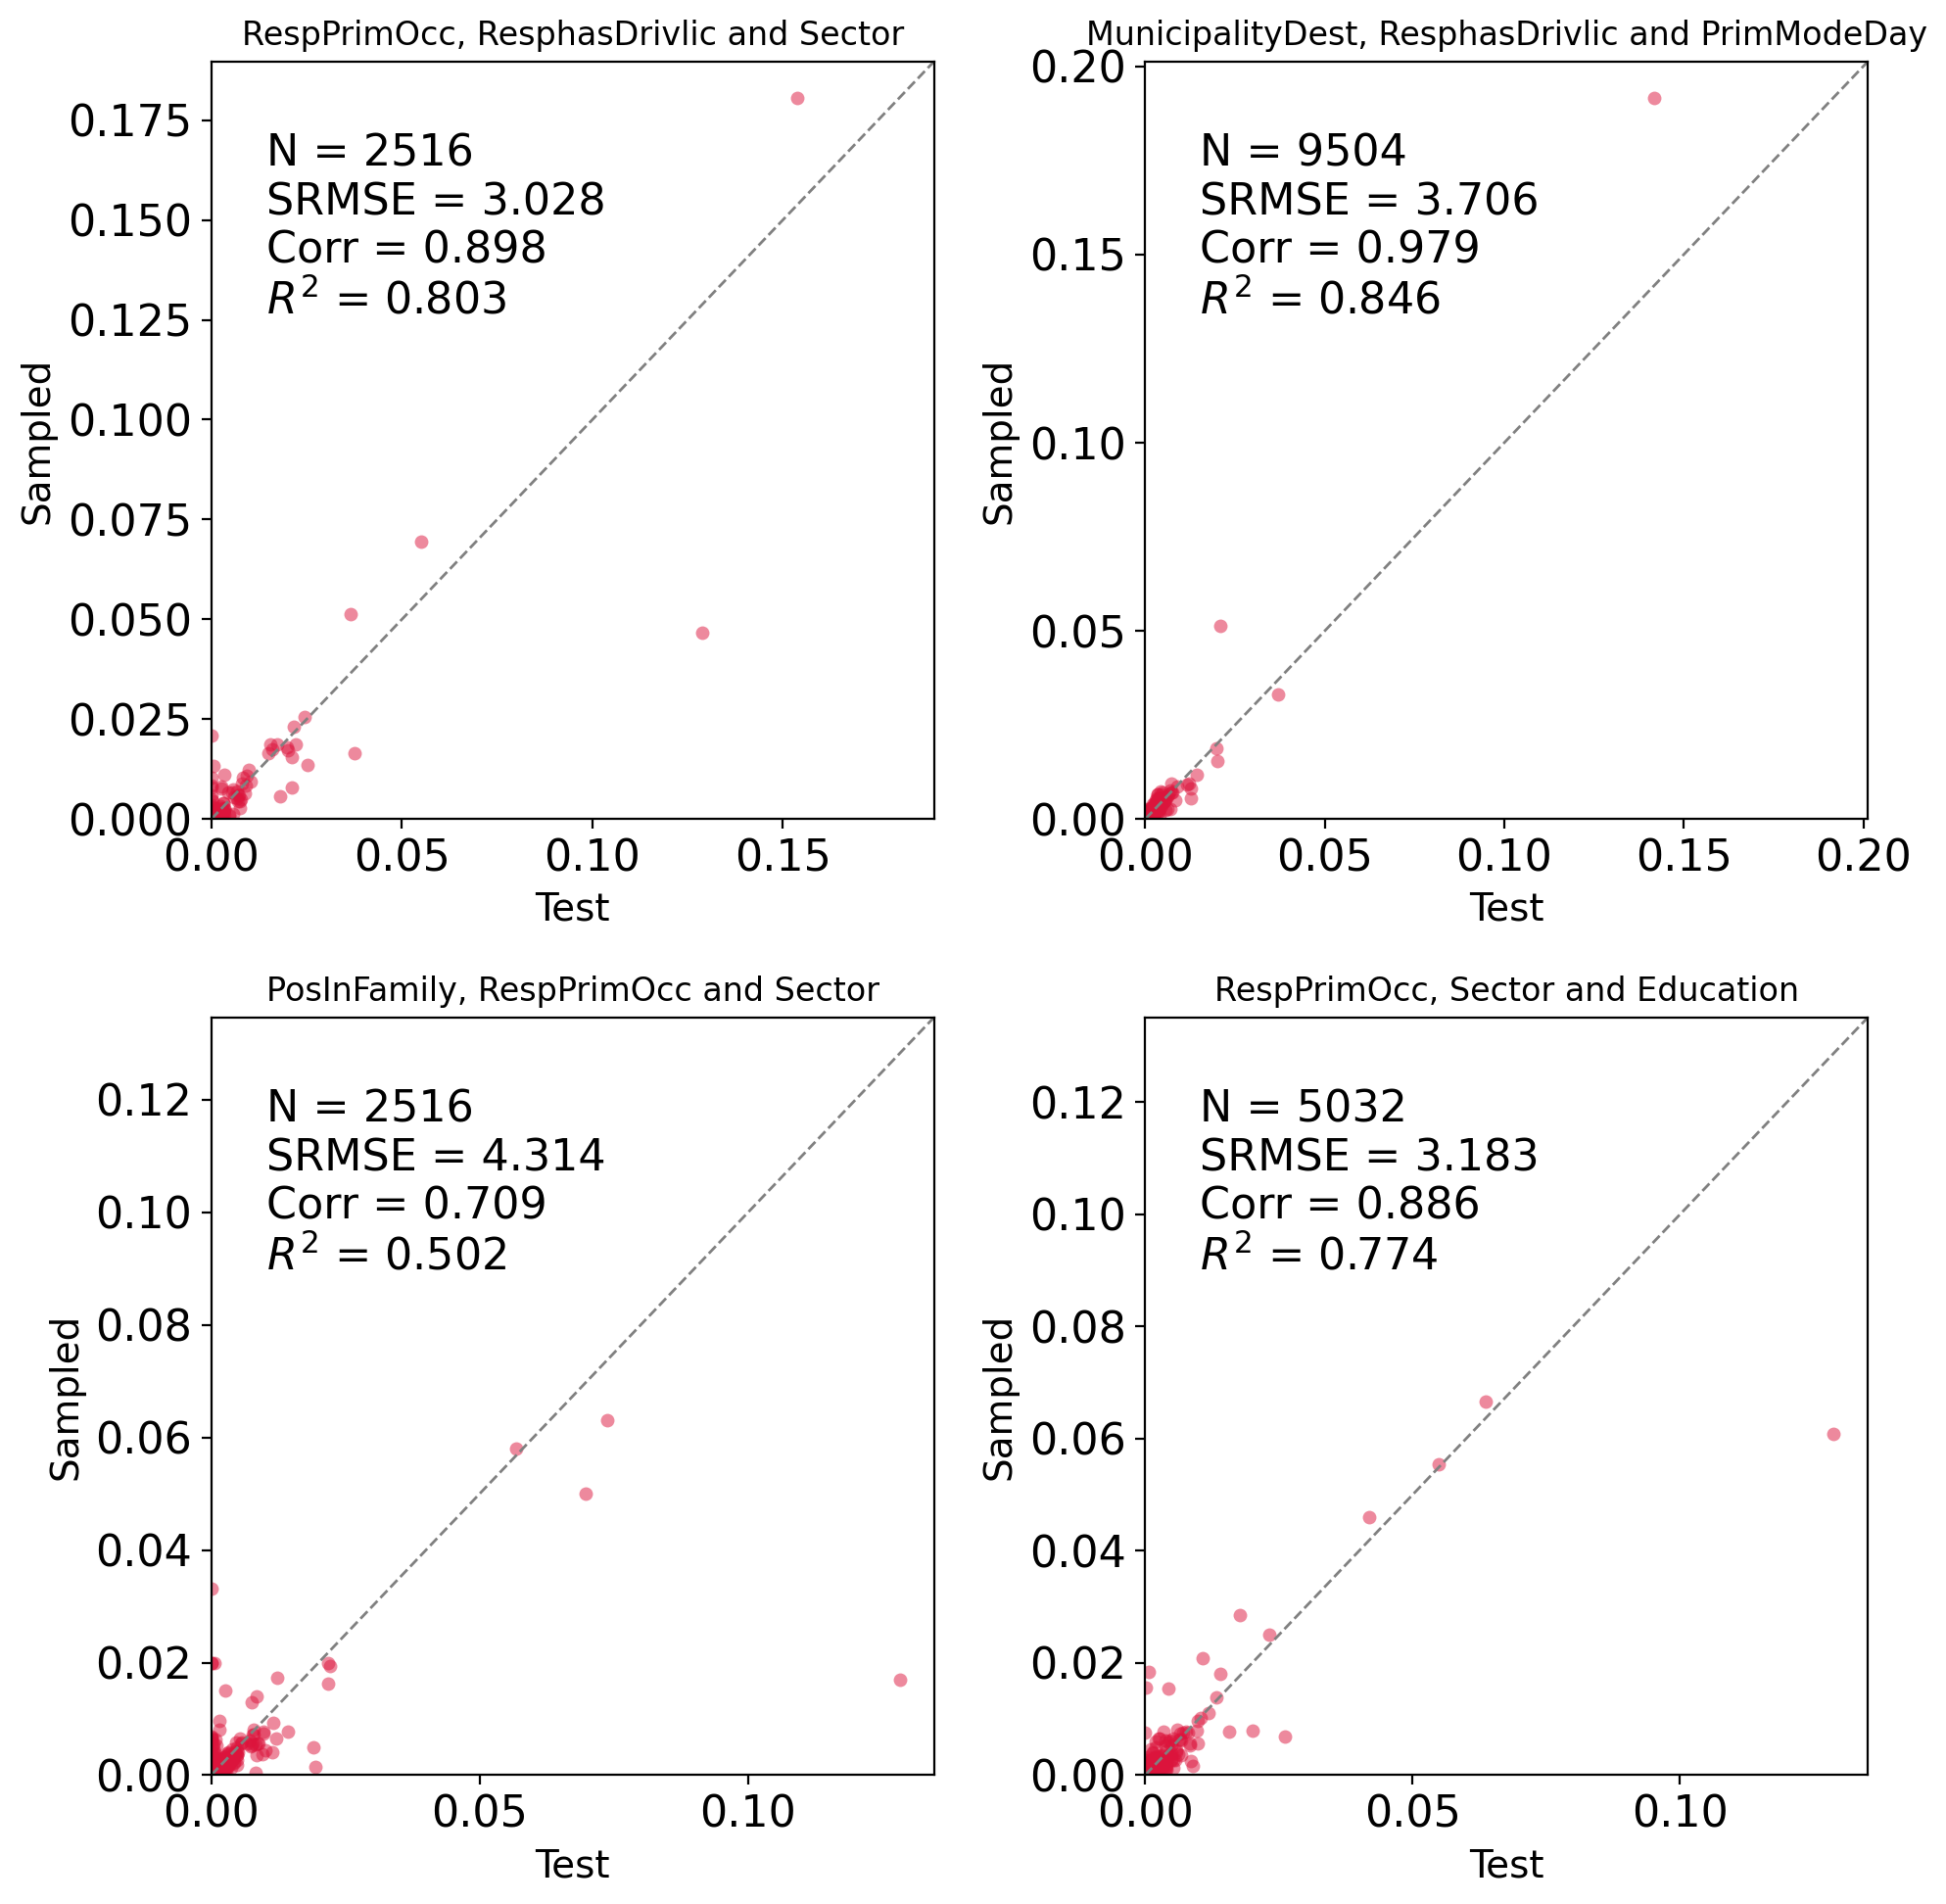

In [92]:
plotjoint2(test, cidatganHome2, 'Results/cidatgan_joint_pop2.png')

In [127]:
datGan_8v2.MunicipalityOrigin.nunique()

99